In [1]:
import pandas as pd, numpy as np

In [2]:
df = pd.read_csv('../Jyun/Downloads/winequalityN.csv')
df

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36            20.7   
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
4     white            7.2             0.230         0.32             8.5   
...     ...            ...               ...          ...             ...   
6492    red            6.2             0.600         0.08             2.0   
6493    red            5.9             0.550         0.10             2.2   
6494    red            6.3             0.510         0.13             2.3   
6495    red            5.9             0.645         0.12             2.0   
6496    red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.045                 45.0                 170.0  1.00100  3.00   
1         0.049                 14.0                 132.0  0.99400  3.30   
2         0.050                 30.0                  97.0  0.99510  3.26   
3         0.058                 47.0                 186.0  0.99560  3.19   
4         0.058                 47.0                 186.0  0.99560  3.19   
...         ...                  ...                   ...      ...   ...   
6492      0.090                 32.0                  44.0  0.99490  3.45   
6493      0.062                 39.0                  51.0  0.99512  3.52   
6494      0.076                 29.0                  40.0  0.99574  3.42   
6495      0.075                 32.0                  44.0  0.99547  3.57   
6496      0.067                 18.0                  42.0  0.99549  3.39   

      sulphates  alcohol  quality  
0          0.45      8.8        6  
1          0.49      9.5        6  
2          0.44     10.1        6  
3          0.40      9.9        6  
4          0.40      9.9        6  
...         ...      ...      ...  
6492       0.58     10.5        5  
6493        NaN     11.2        6  
6494       0.75     11.0        6  
6495       0.71     10.2        5  
6496       0.66     11.0        6  

[6497 rows x 13 columns]

In [3]:
df.type.value_counts(1)

white    0.753886
red      0.246114
Name: type, dtype: float64

In [4]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [5]:
#fixed acidity: 와인에 있는 고정된 산성 성분(와인의 맛과 특성에 영향)
#volatile acidity: 산성 성분(와인의 맛과 향을 형성하는 데 기여)
#citric acid: 유기산 중 하나(신만, 산미, 산도에 영향)
#residual sugar: 와인의 당도를 나타내는 중요한 지표 중 하나(와인의 맛, 스타일 결정)
#chlorides: 와인의 특성 및 품징 파악
#free sulfur dioxide(자유이산화황): 와인을 안정화하고 산화 및 미생물의 성장을 억제하기 위해 사용하는 첨가물
#total sulfur dioxide(총이산화황): 와인을 안정화하고 산화 및 미생물의 성장을 억제하기 위해 사용하는 첨가물
#density: 알콜함량
#pH: 와인의 산성 및 염기성 측정
#sulphates: 와인의 안정성을 유지하고 산화 및 미생물의 성장을 억제
# alcohol: 알콜함량

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [7]:
#결측치
#fixed acidity: 10개
#volatile acidity: 8개
#citric acid: 3개
#residual sugar: 2개
#chlorides: 2개
#pH: 9개
#sulphates: 4개

In [9]:
df[df['fixed acidity'].isna()]

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
17    white            NaN             0.660         0.48             1.2   
174   white            NaN             0.270         0.31            17.7   
249   white            NaN             0.410         0.14            10.4   
267   white            NaN             0.580         0.07             6.9   
368   white            NaN             0.290         0.48             2.3   
518   white            NaN             0.130         0.28             1.9   
1079  white            NaN               NaN         0.29             6.2   
2902  white            NaN             0.360         0.14             8.9   
6428    red            NaN             0.440         0.09             2.2   
6429    red            NaN             0.705         0.10             2.8   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
17        0.029                 29.0                  75.0  0.98920  3.33   
174       0.051                 33.0                 173.0  0.99900  3.09   
249       0.037                 18.0                 119.0  0.99600  3.38   
267       0.043                 34.0                 149.0  0.99440  3.34   
368       0.049                 36.0                 178.0  0.99310  3.17   
518       0.050                 20.0                  78.0  0.99180  3.43   
1079      0.046                 29.0                 227.0  0.99520  3.29   
2902      0.036                 38.0                 155.0  0.99622  3.27   
6428      0.063                  9.0                  18.0  0.99444   NaN   
6429      0.081                 13.0                  28.0  0.99631   NaN   

      sulphates  alcohol  quality  
17         0.39     12.8        8  
174        0.64     10.2        5  
249        0.45     10.0        5  
267        0.57      9.7        5  
368        0.64     10.6        6  
518        0.64     10.8        6  
1079       0.53     10.1        6  
2902        NaN      9.4        5  
6428       0.69     11.3        6  
6429       0.66     10.2        5

In [10]:
print(df['fixed acidity'].mean())
print(df[df.quality==8]['fixed acidity'].mean())

7.2165793124710955
6.838541666666667


## 결측치 존재
 #### 결측치 처리 방법 1) 행 삭제, 2) 평균, 중앙, 최빈값 등으로 대체
 #### 와인 quality 마다 값이 다를 수 있음 =>
 ### quality에 따른 평균으로 대체

In [11]:
dfc = df.copy()

In [12]:
df.loc[368,'quality']

6

In [13]:
int(df.loc[368,'quality'])

6

In [14]:
ind = df[df['fixed acidity'].isna()].index
for i in ind:
    df.loc[i,'fixed acidity'] = df[df.quality==df.loc[i,'quality']]['fixed acidity'].mean()

In [15]:
df[df['fixed acidity'].isna()]

Empty DataFrame
Columns: [type, fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality]
Index: []

In [16]:
ind = df[df['volatile acidity'].isna()].index
for i in ind:
    df.loc[i,'volatile acidity'] = df[df.quality==df.loc[i,'quality']]['volatile acidity'].mean()

ind = df[df['citric acid'].isna()].index
for i in ind:
    df.loc[i,'citric acid'] = df[df.quality==df.loc[i,'quality']]['citric acid'].mean()

ind = df[df['residual sugar'].isna()].index
for i in ind:
    df.loc[i,'residual sugar'] = df[df.quality==df.loc[i,'quality']]['residual sugar'].mean()

ind = df[df['chlorides'].isna()].index
for i in ind:
    df.loc[i,'chlorides'] = df[df.quality==df.loc[i,'quality']]['chlorides'].mean()
    
ind = df[df['pH'].isna()].index
for i in ind:
    df.loc[i,'pH'] = df[df.quality==df.loc[i,'quality']]['pH'].mean()
    
ind = df[df['sulphates'].isna()].index
for i in ind:
    df.loc[i,'sulphates'] = df[df.quality==df.loc[i,'quality']]['sulphates'].mean()

In [17]:
df.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [18]:
df.type.value_counts()

white    4898
red      1599
Name: type, dtype: int64

In [19]:
df.type = np.where(df.type=='red', 1, 0)

In [20]:
df.type.value_counts()

0    4898
1    1599
Name: type, dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   int32  
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int32(1), int64(1)
memory usage: 634.6 KB


In [22]:
df.describe()

type  fixed acidity  volatile acidity  citric acid  \
count  6497.000000    6497.000000       6497.000000  6497.000000   
mean      0.246114       7.216584          0.339675     0.318722   
std       0.430779       1.295764          0.164554     0.145231   
min       0.000000       3.800000          0.080000     0.000000   
25%       0.000000       6.400000          0.230000     0.250000   
50%       0.000000       7.000000          0.290000     0.310000   
75%       0.000000       7.700000          0.400000     0.390000   
max       1.000000      15.900000          1.580000     1.660000   

       residual sugar    chlorides  free sulfur dioxide  total sulfur dioxide  \
count     6497.000000  6497.000000          6497.000000           6497.000000   
mean         5.444234     0.056042            30.525319            115.744574   
std          4.757401     0.035031            17.749400             56.521855   
min          0.600000     0.009000             1.000000              6.000000   
25%          1.800000     0.038000            17.000000             77.000000   
50%          3.000000     0.047000            29.000000            118.000000   
75%          8.100000     0.065000            41.000000            156.000000   
max         65.800000     0.611000           289.000000            440.000000   

           density           pH    sulphates      alcohol      quality  
count  6497.000000  6497.000000  6497.000000  6497.000000  6497.000000  
mean      0.994697     3.218395     0.531211    10.491801     5.818378  
std       0.002999     0.160637     0.148769     1.192712     0.873255  
min       0.987110     2.720000     0.220000     8.000000     3.000000  
25%       0.992340     3.110000     0.430000     9.500000     5.000000  
50%       0.994890     3.210000     0.510000    10.300000     6.000000  
75%       0.996990     3.320000     0.600000    11.300000     6.000000  
max       1.038980     4.010000     2.000000    14.900000     9.000000

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

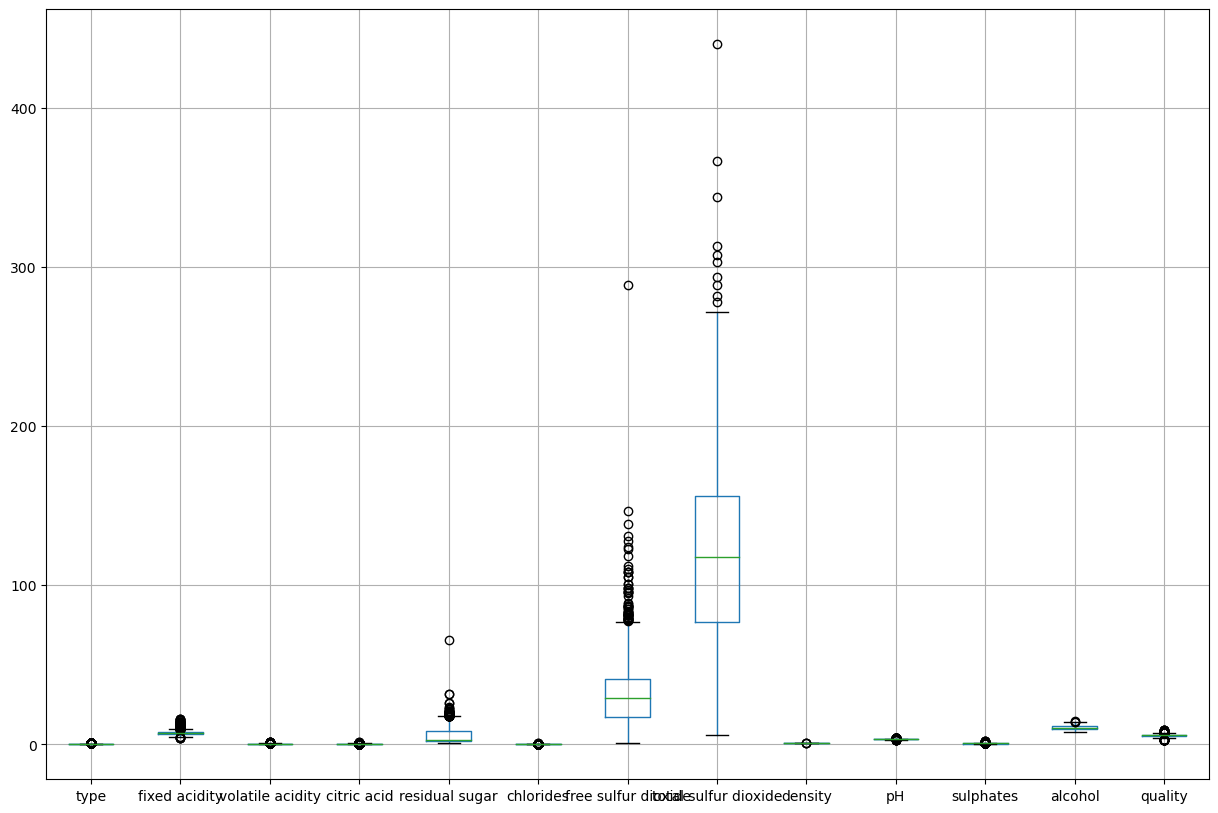

In [24]:
#이상치 값이 너무 많음 -> quality에 따라 이상치가 달라질 수 있음
#EDA를 통해 확인 필요
df.boxplot(figsize=(15,10))
plt.show()

In [25]:
df.type.value_counts()

0    4898
1    1599
Name: type, dtype: int64

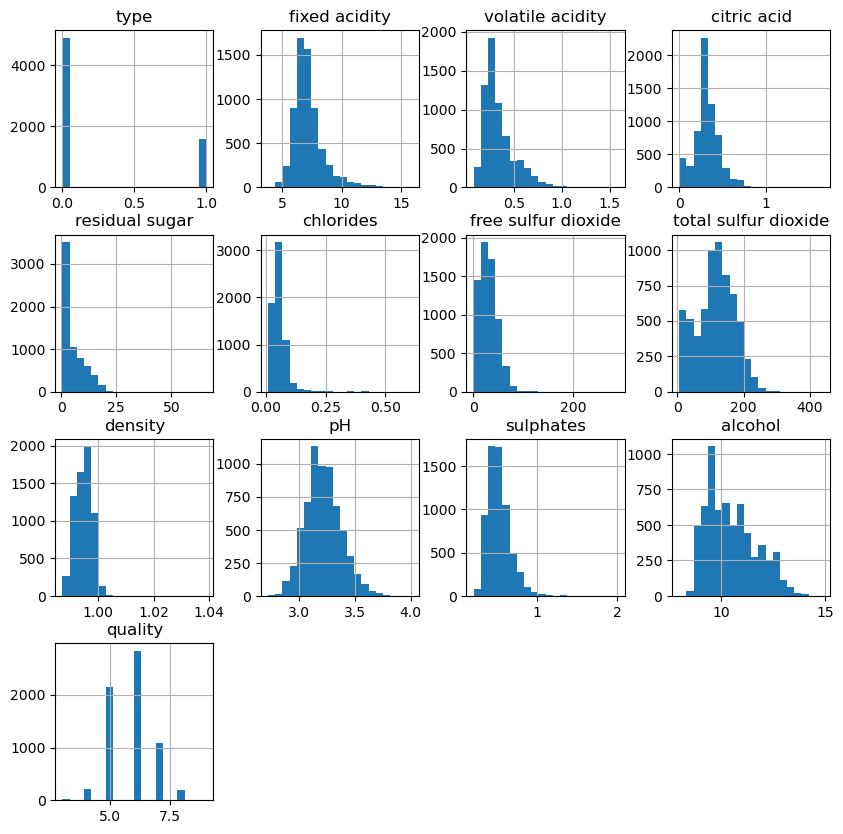

In [26]:
# 대략적인 그래표 모형 확인
df.hist(bins = 20, figsize=(10,10))
plt.show()

In [27]:
df.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

# EDA

### 범주형 변수 확인

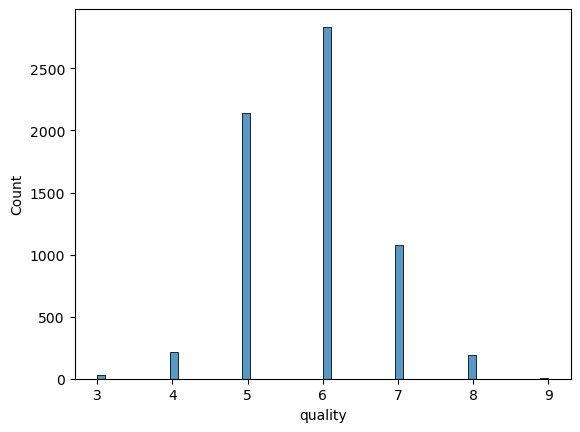

In [28]:
#quality 당 와인수 확인
#6등급이 가장 많이 있음
sns.histplot(data=df, x=df.quality)
plt.show()

In [29]:
#wine 별 quality 확인
#red = 1, white = 0
#그룹화 필요
df_type_grouped = pd.DataFrame(df.groupby('quality')['type'].value_counts().unstack(fill_value=0))
df_type_grouped

type        0    1
quality           
3          20   10
4         163   53
5        1457  681
6        2198  638
7         880  199
8         175   18
9           5    0

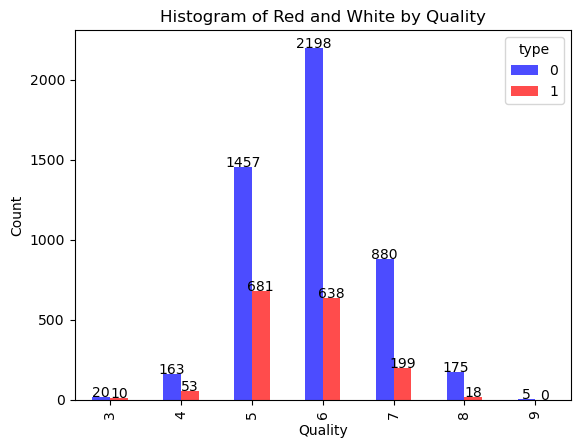

In [30]:
#와인별 quality 확인 결과
#정규분포 형태로 구성(red: 5등급이, white은 6등급이 제일 많음)
ax = df_type_grouped.plot(kind='bar', color=['blue', 'red'], alpha=0.7)
plt.xlabel('Quality')
plt.ylabel('Count')
plt.title('Histogram of Red and White by Quality')

# 각 막대 위에 숫자 표시
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height), ha='center')

plt.show()

In [31]:
#와인별 quality 카이제곱검정을 위한 사전 작업
x_2_df = pd.crosstab(df.type, df.quality)
x_2_df

quality   3    4     5     6    7    8  9
type                                     
0        20  163  1457  2198  880  175  5
1        10   53   681   638  199   18  0

In [32]:
#귀무가설: 두 변수는 상관관계가 없다.
#대립가설: 두 변수는 상관관계가 있다.
#카이제곱 검정을 통해 와인 type와 quality가 상관관계가 있음을 파악
from scipy.stats import chi2_contingency

# 카이제곱 검정 수행
chi2_stat, p_value, dof, expected = chi2_contingency(x_2_df)

# 결과 출력
print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

# 결과 해석
alpha = 0.05
if p_value < alpha:
    print("변수들 간에는 유의미한 관련성이 있습니다.")
else:
    print("변수들 간에는 유의미한 관련성이 없습니다.")

Chi-Square Statistic: 116.54327959374594
P-value: 8.66434779598271e-23
Degrees of Freedom: 6
Expected Frequencies Table:
[[2.26165923e+01 1.62839464e+02 1.61180914e+03 2.13802186e+03
  8.13443435e+02 1.45500077e+02 3.76943205e+00]
 [7.38340773e+00 5.31605356e+01 5.26190857e+02 6.97978144e+02
  2.65556565e+02 4.74999230e+01 1.23056795e+00]]
변수들 간에는 유의미한 관련성이 있습니다.


### 연속형 변수 확인

In [33]:
df.type.value_counts()

0    4898
1    1599
Name: type, dtype: int64

C:\Users\Jyun\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 74.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Jyun\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 42.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Jyun\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 84.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Jyun\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 64.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


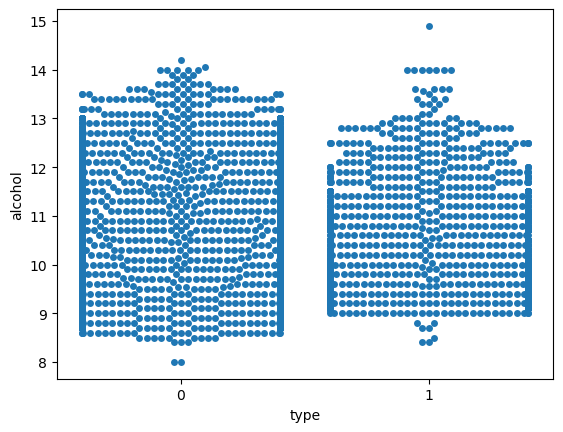

In [34]:
#sns.swarmplot
#데이터 포인트 수와 분포도 제공
sns.swarmplot(y=df.alcohol, x= df['type'])
plt.show()

C:\Users\Jyun\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 31.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Jyun\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 90.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Jyun\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 91.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Jyun\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 77.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Jyun\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 28.0% of the points cann

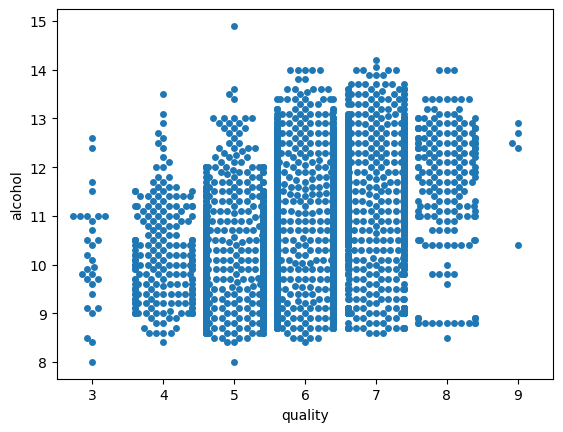

In [35]:
sns.swarmplot(y=df.alcohol, x= df['quality'])
plt.show()

In [36]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

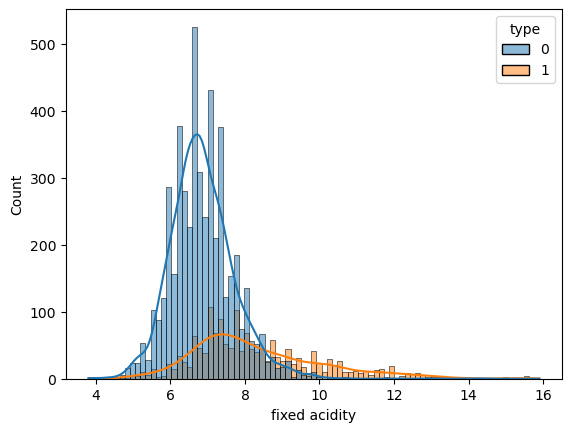

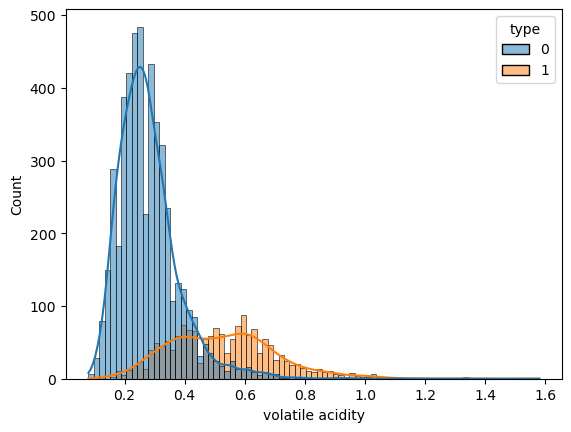

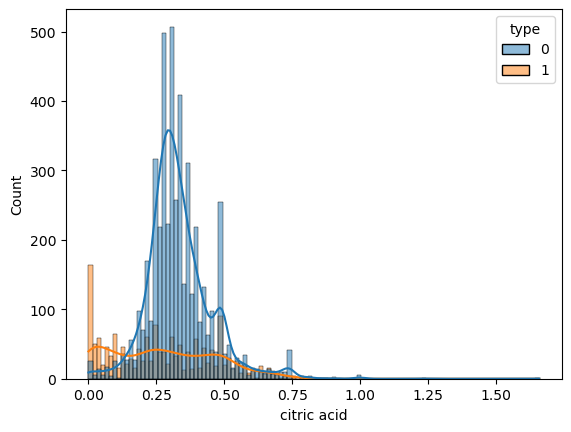

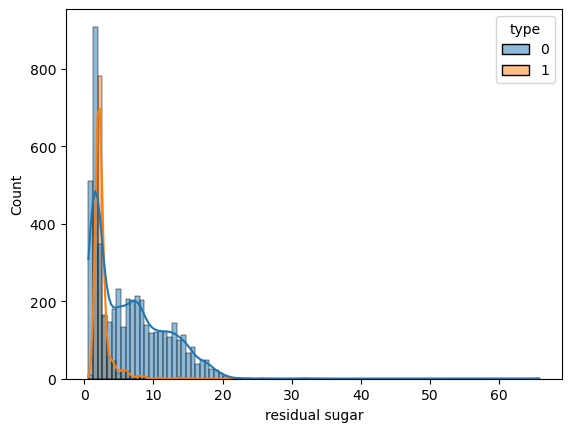

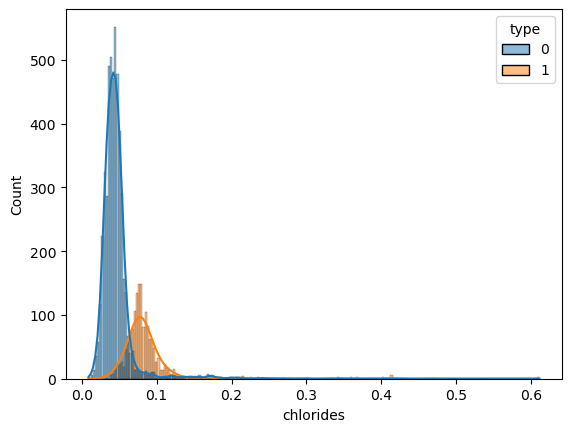

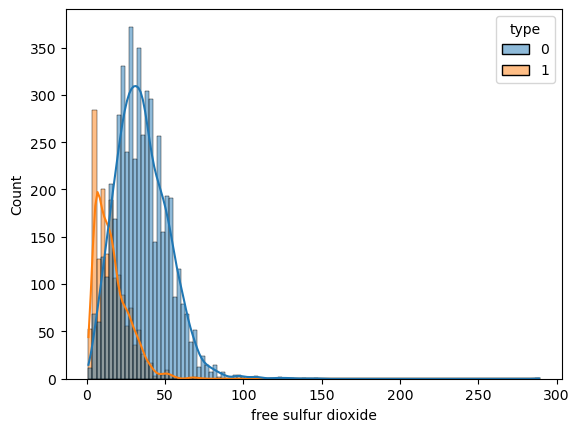

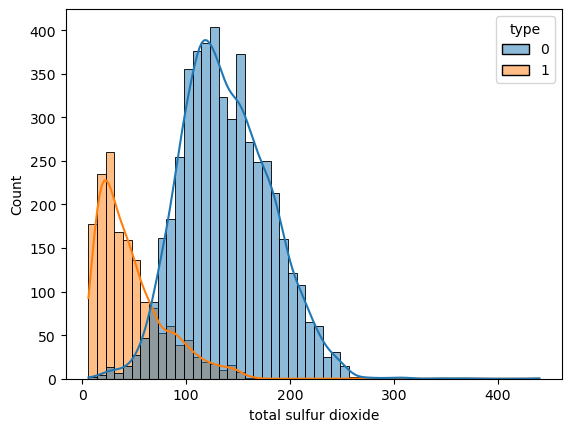

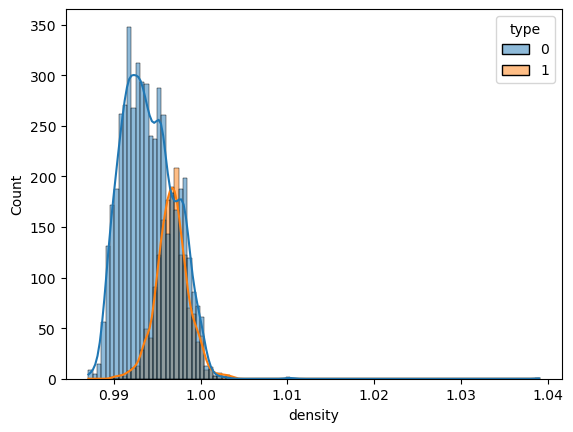

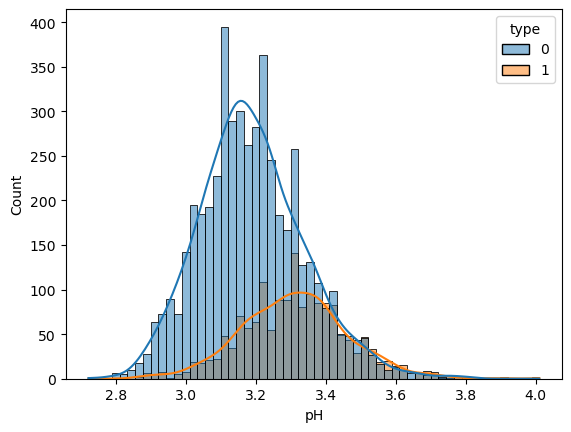

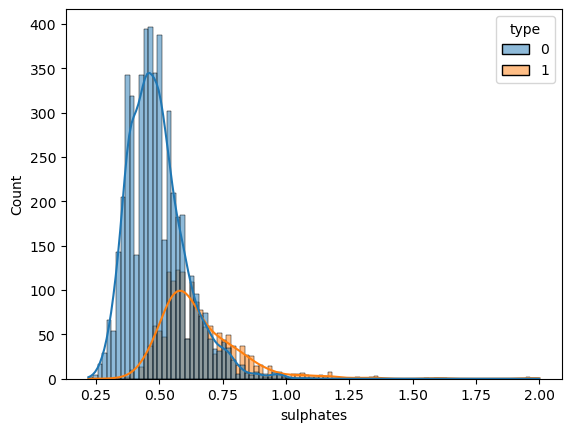

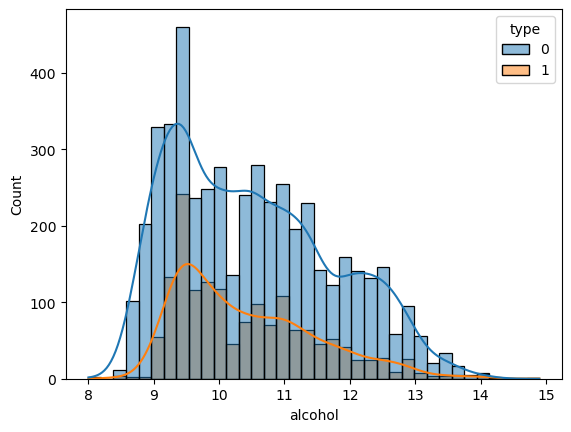

In [37]:
# type 비교1
for i in df.columns:
    if i == 'type':
        continue
    elif i == 'quality':
        break
    sns.histplot(data=df, x=i, hue = df.type, kde=True)
    plt.show()

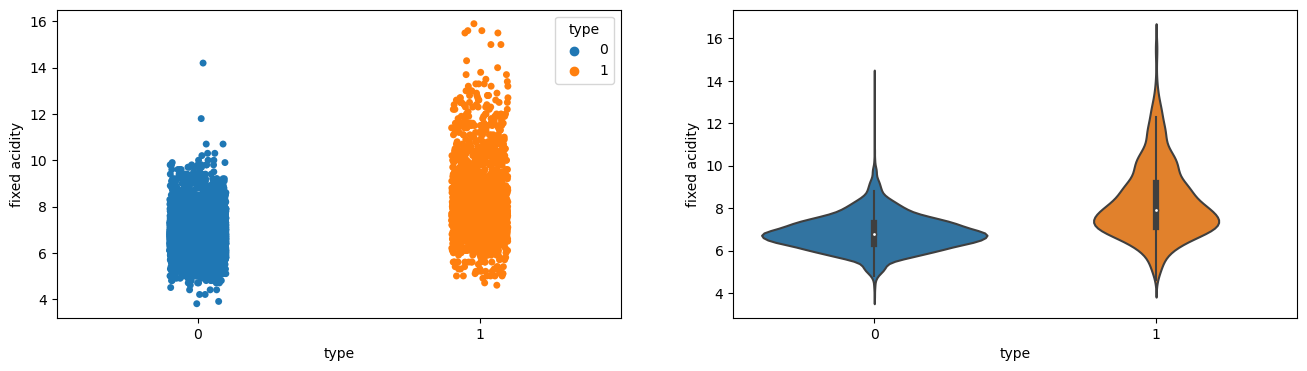

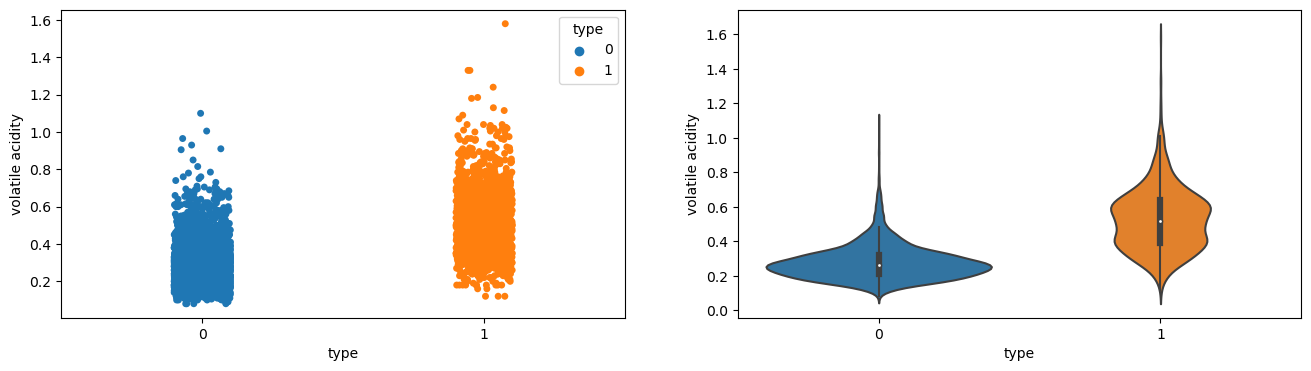

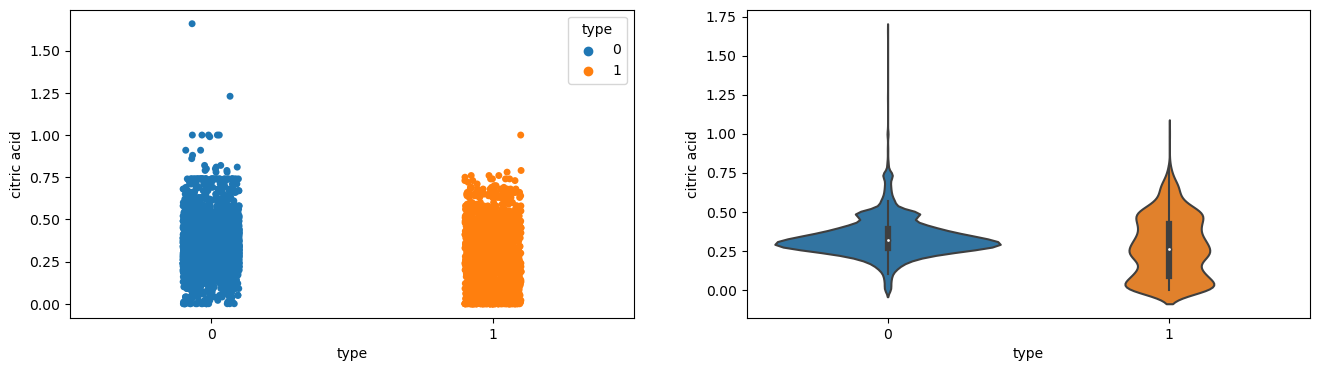

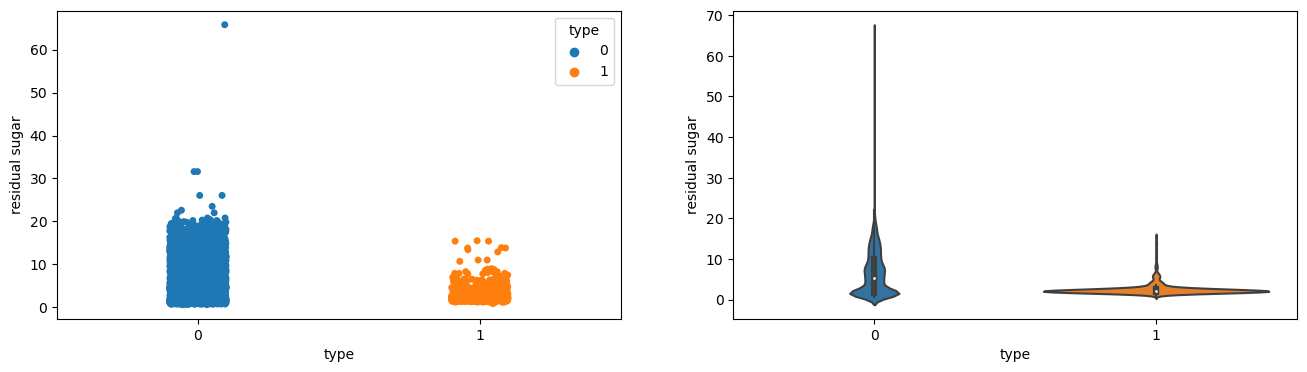

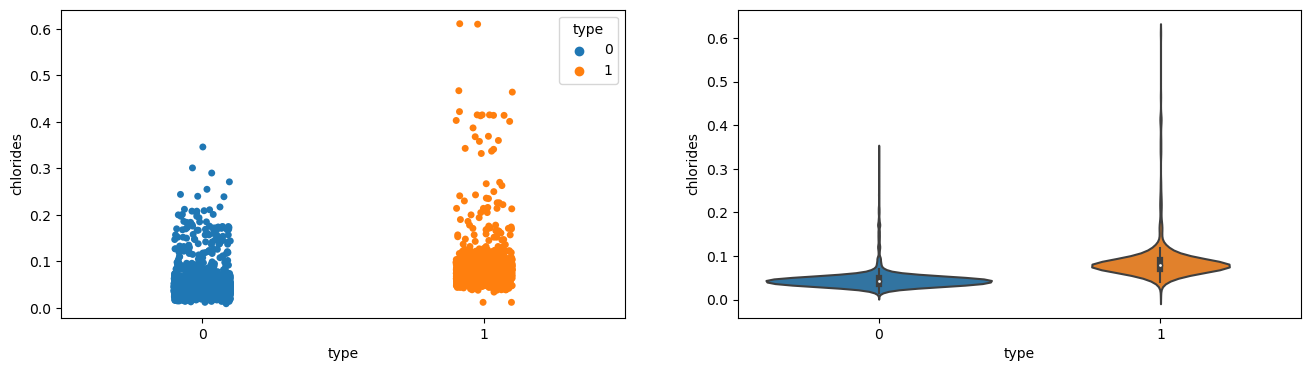

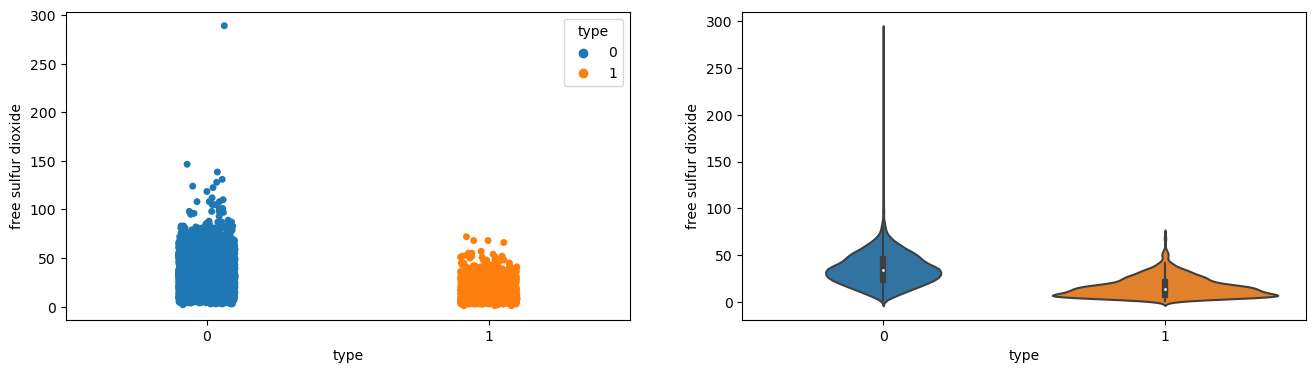

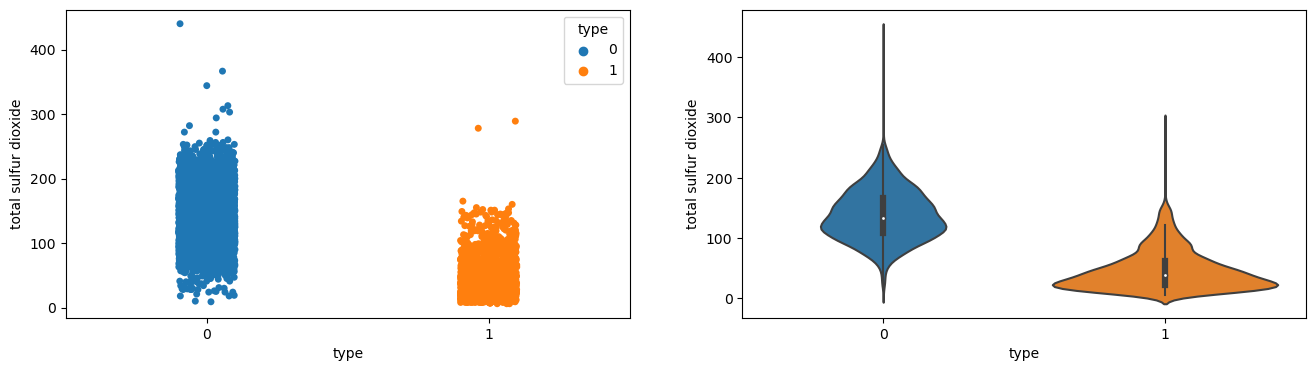

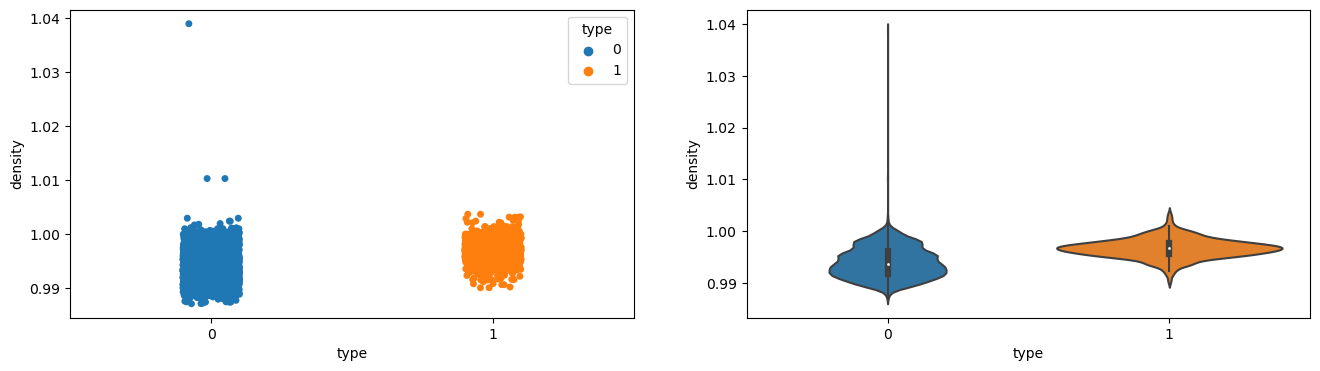

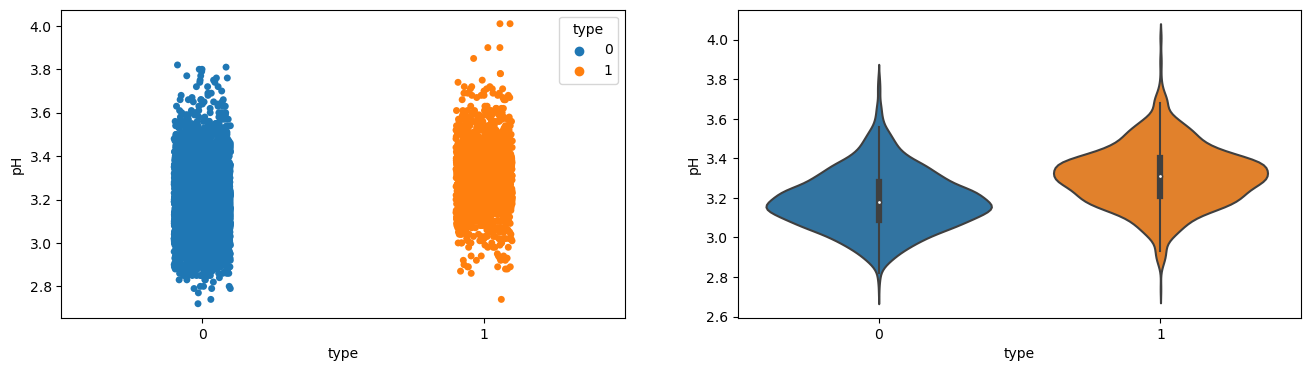

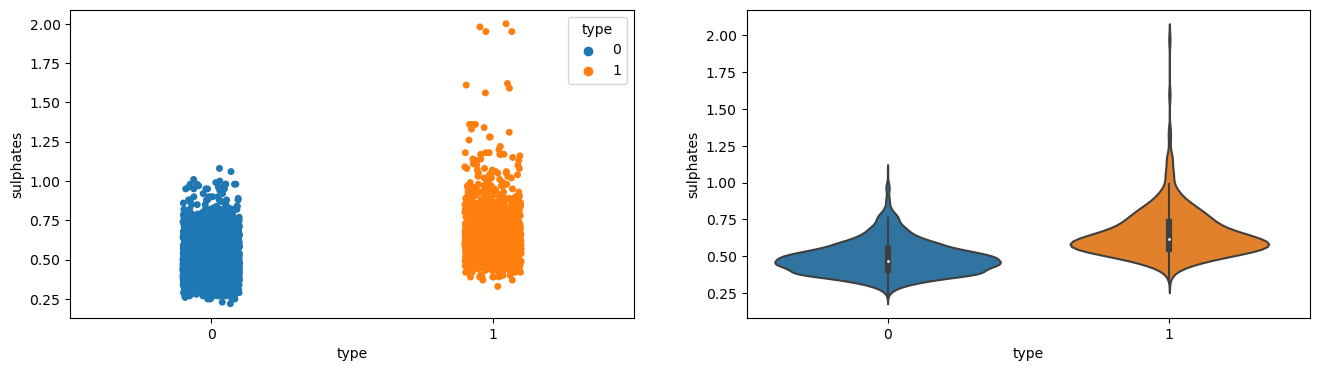

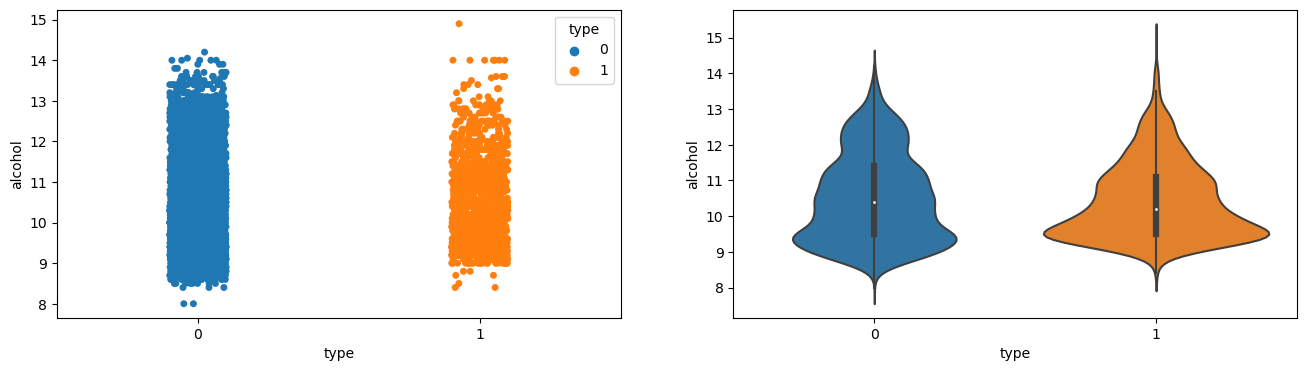

In [38]:
#type 비교2
for i in df.columns:
    if i =='type':
        continue
    elif i == 'quality':
        break
    f, ax = plt.subplots(1,2,figsize=(16,4))
    sns.stripplot(x=df['type'],y=df[i], ax=ax[0],hue=df['type'])
    sns.violinplot(data=df, x='type', y=i, ax=ax[1])
    plt.show()

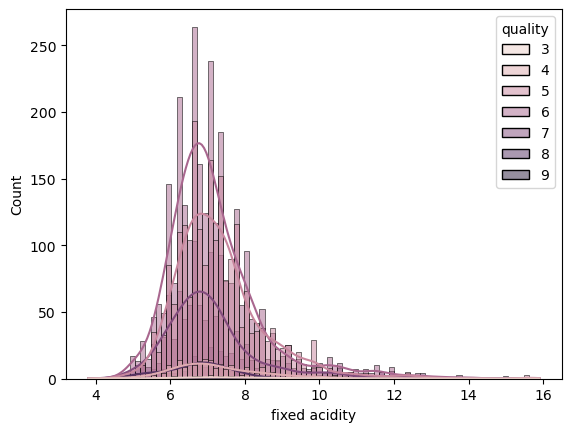

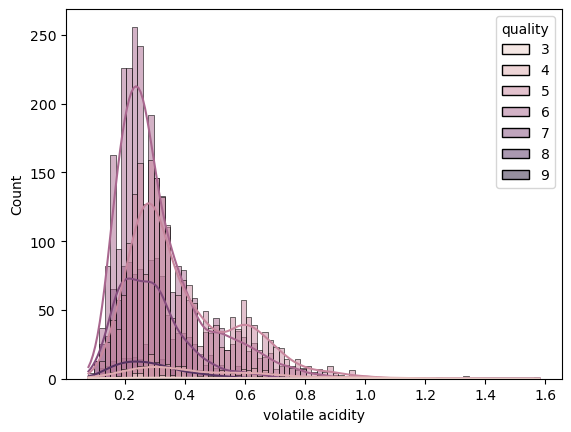

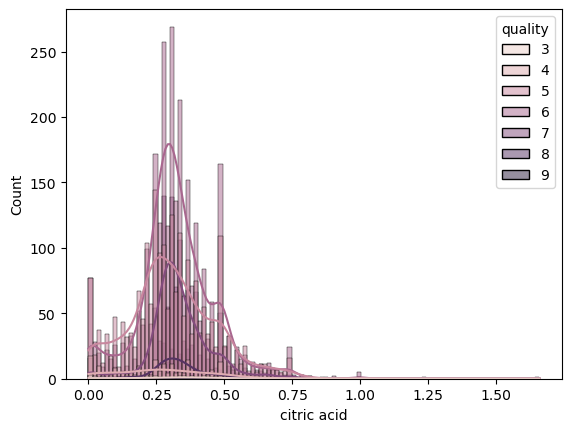

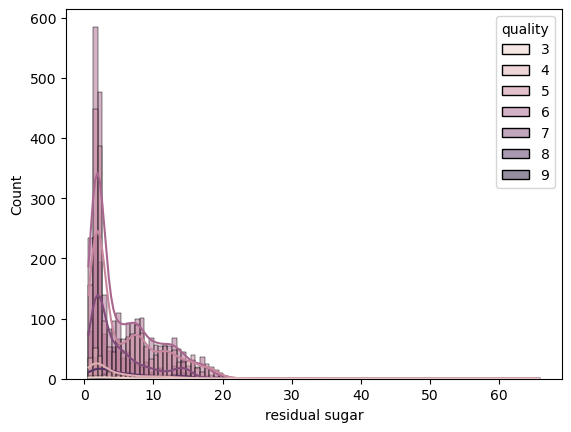

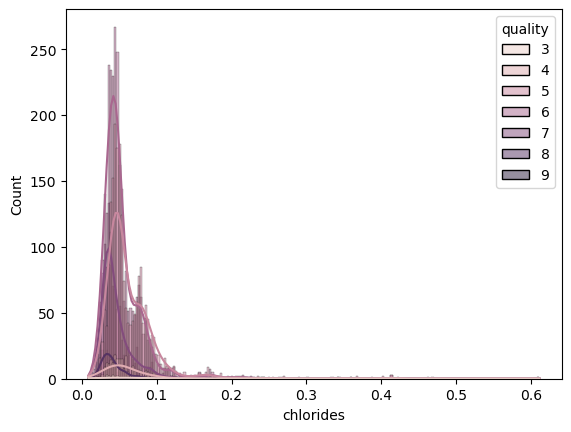

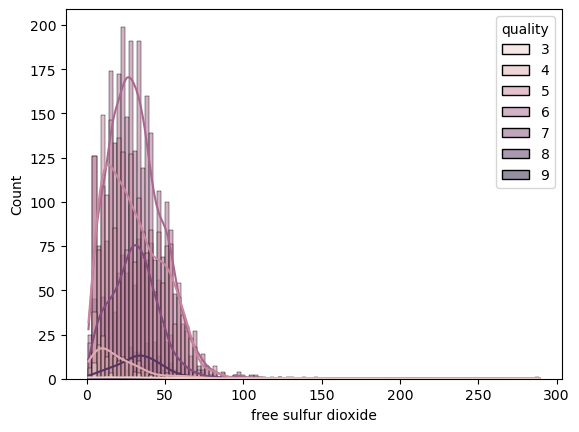

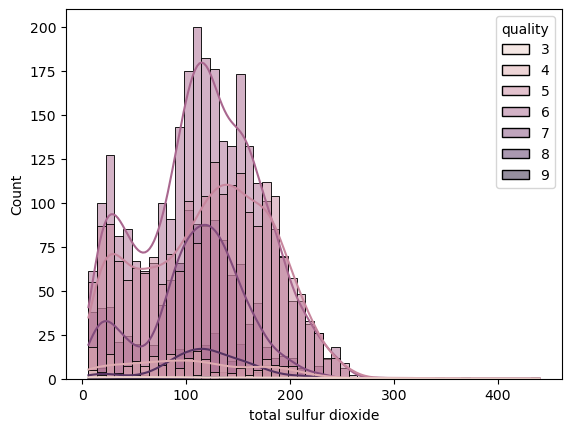

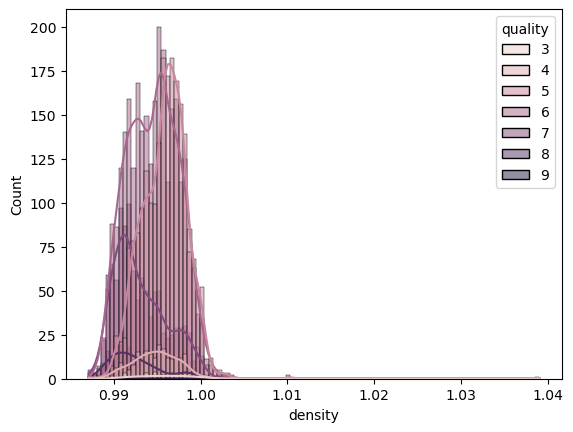

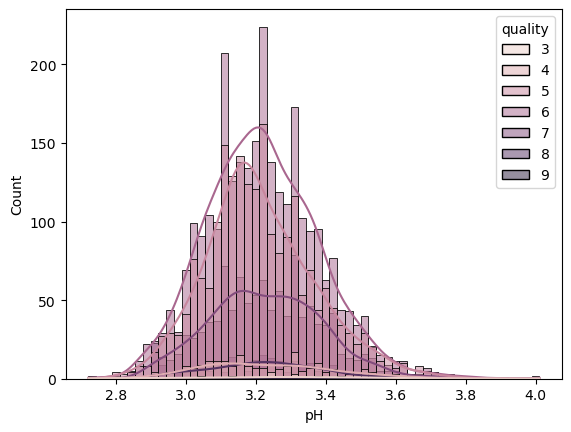

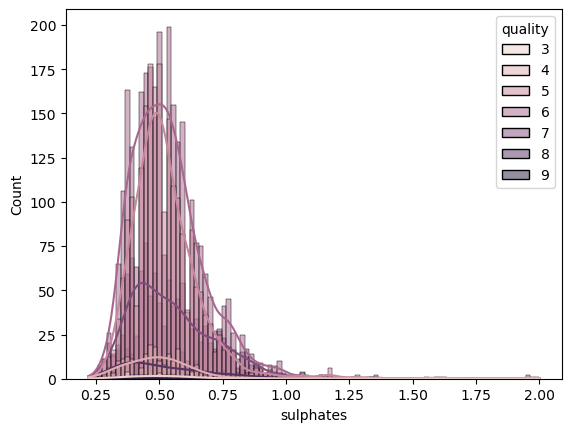

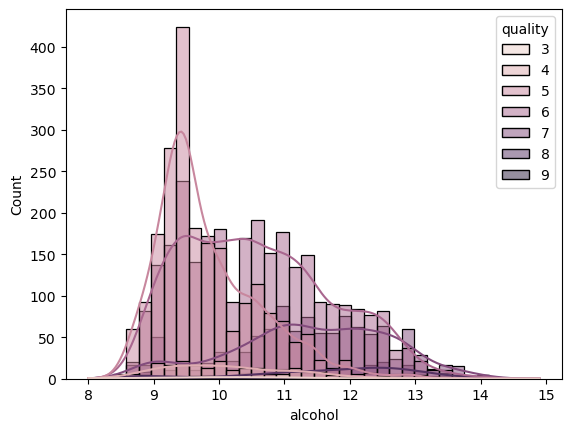

In [39]:
for i in df.columns:
    if i == 'type':
        continue
    elif i == 'quality':
        break
    sns.histplot(data=df, x=i, hue = df.quality, kde=True)
    plt.show()

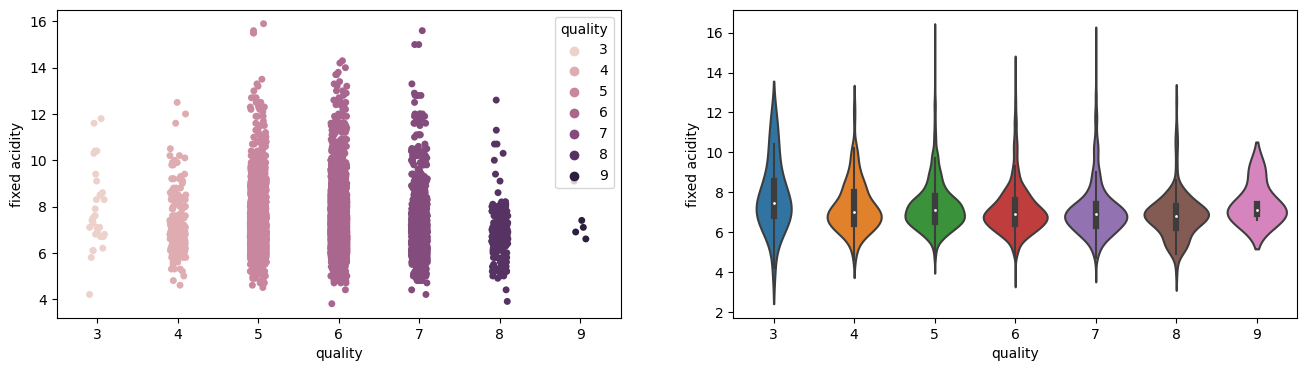

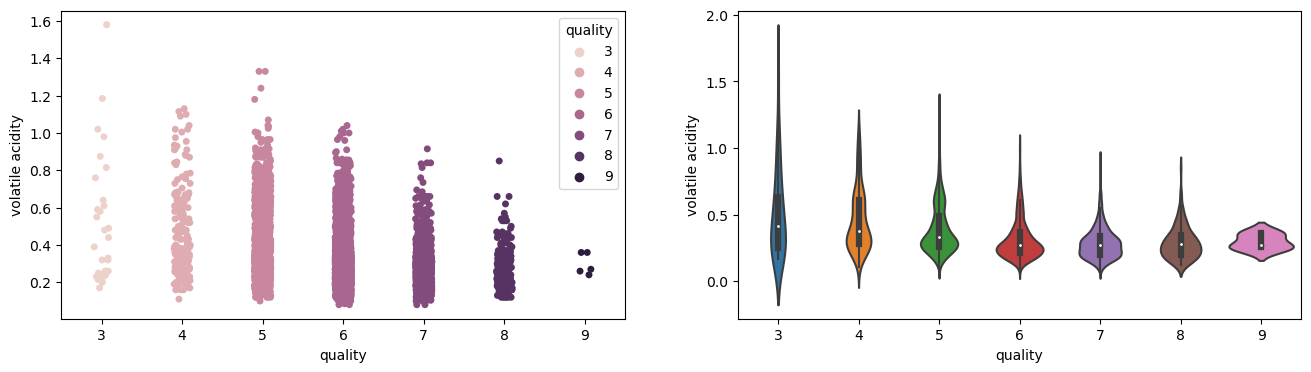

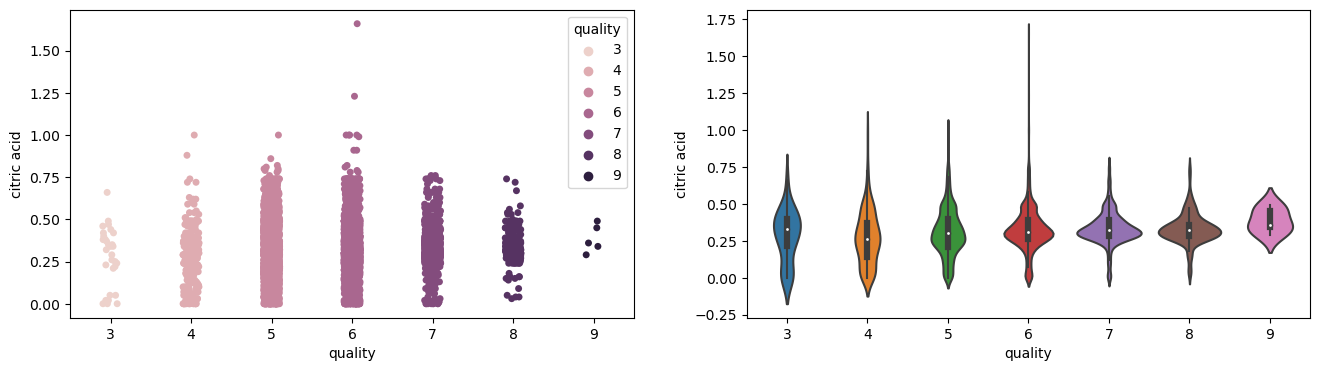

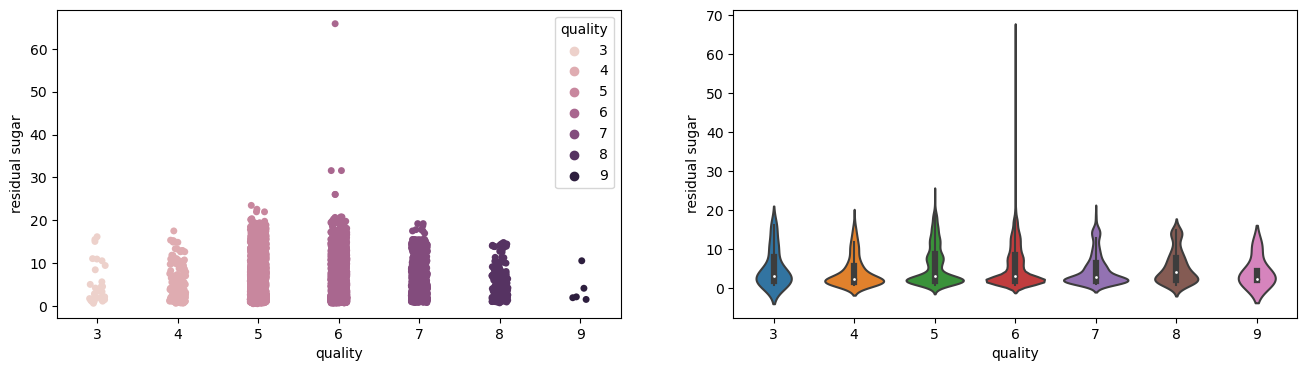

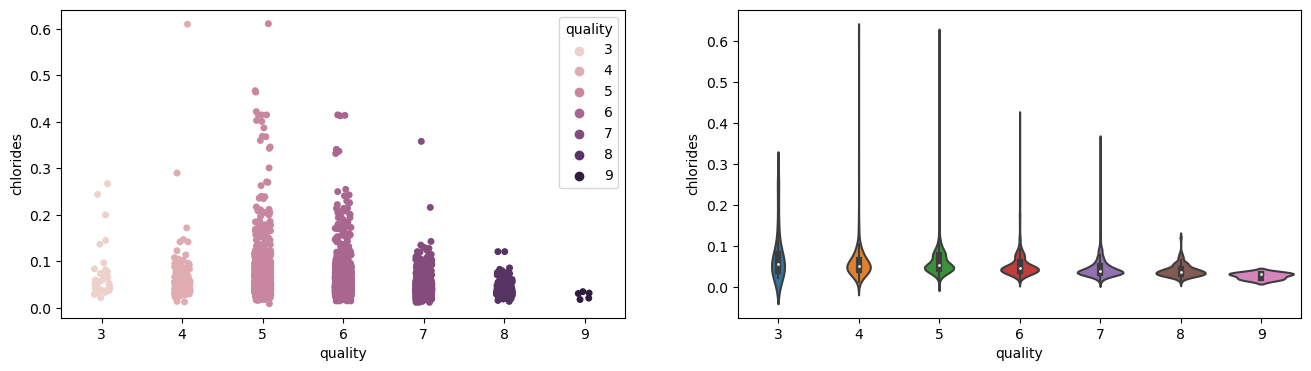

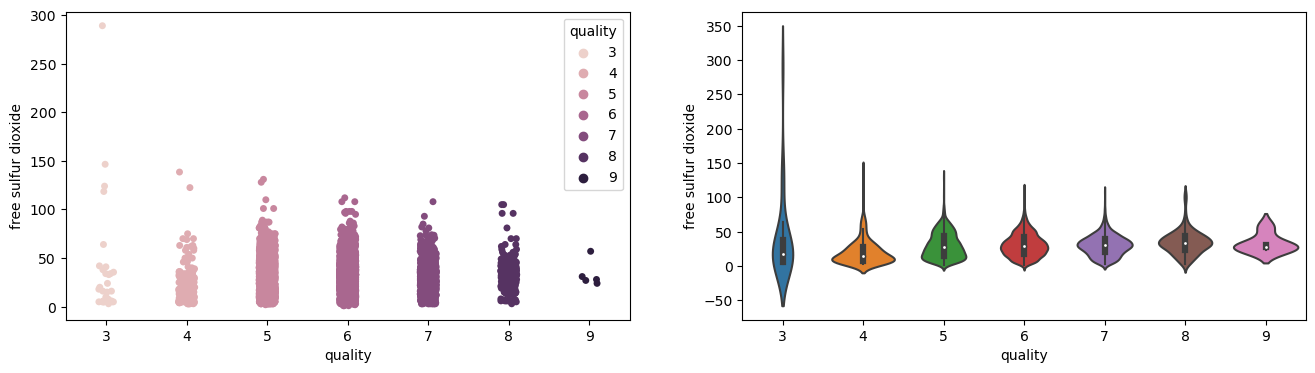

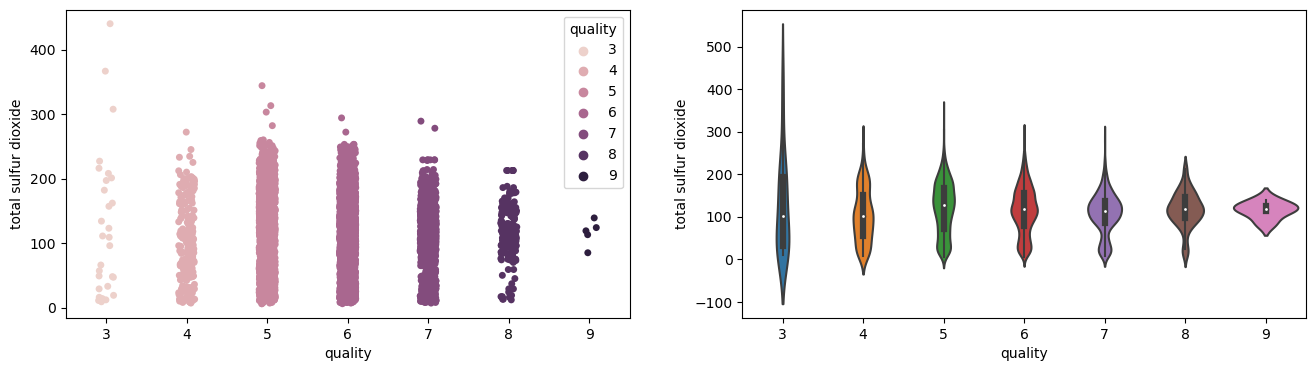

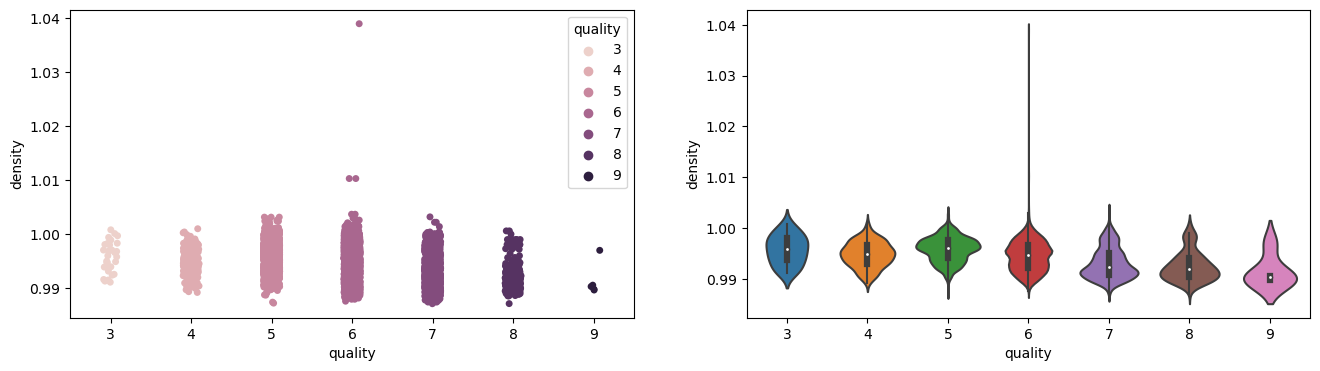

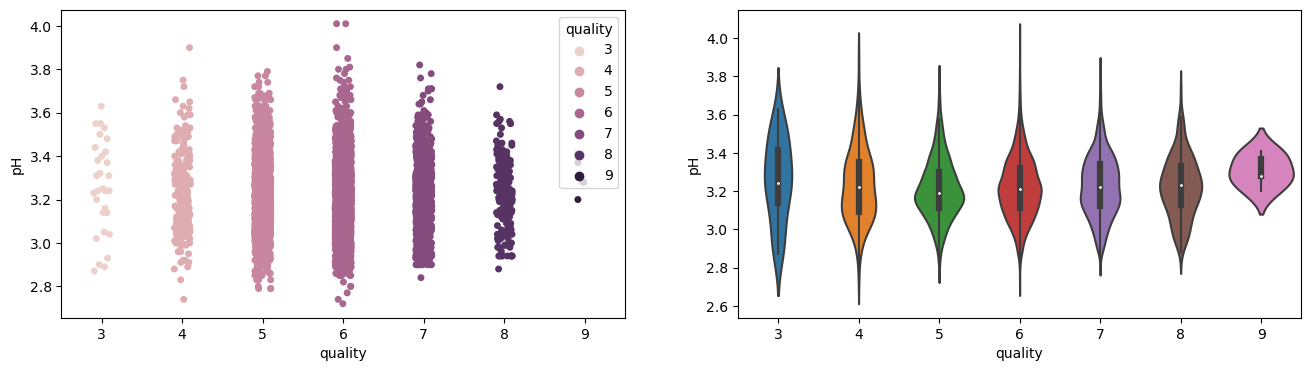

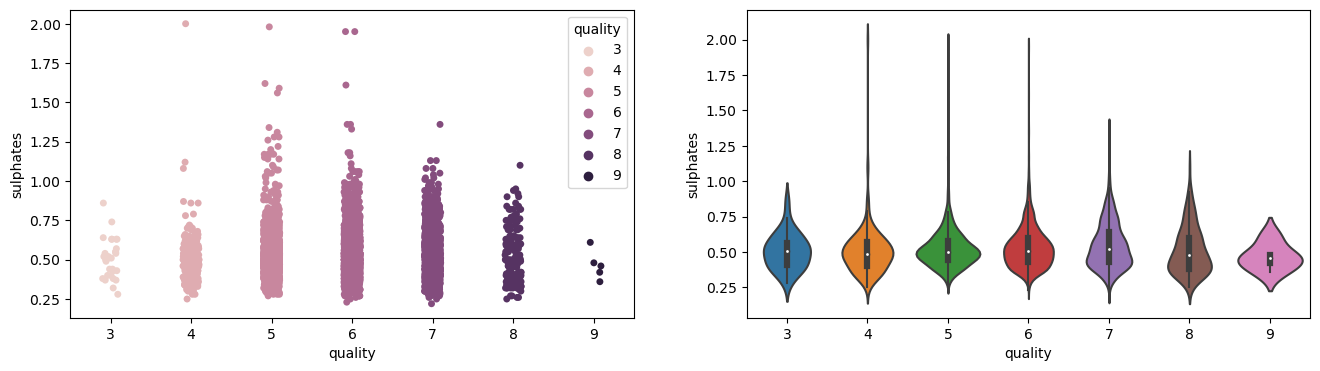

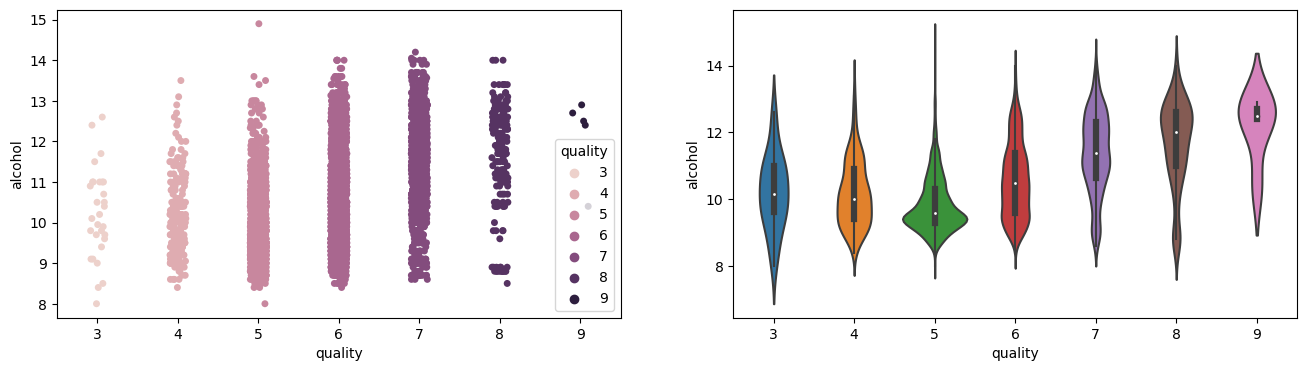

In [40]:
for i in df.columns:
    if i =='type':
        continue
    elif i == 'quality':
        break
    f, ax = plt.subplots(1,2,figsize=(16,4))
    sns.stripplot(x=df['quality'],y=df[i], ax=ax[0],hue=df['quality'])
    sns.violinplot(data=df, x='quality', y=i, ax=ax[1])
    plt.show()

In [41]:
df['new_quality1'] = 0
df.new_quality1 = [1 if x > 5 else 0 for x in df.quality]
df.new_quality1.value_counts(1)

1    0.633061
0    0.366939
Name: new_quality1, dtype: float64

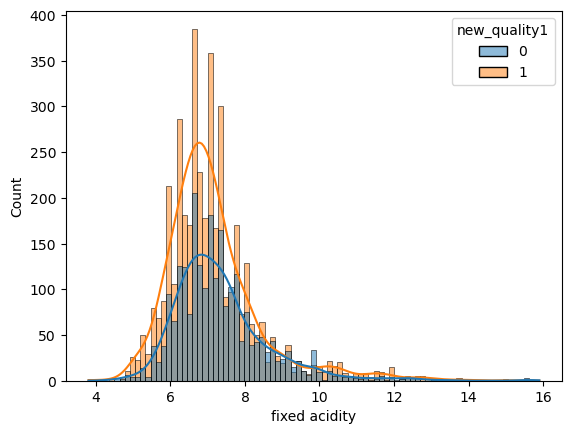

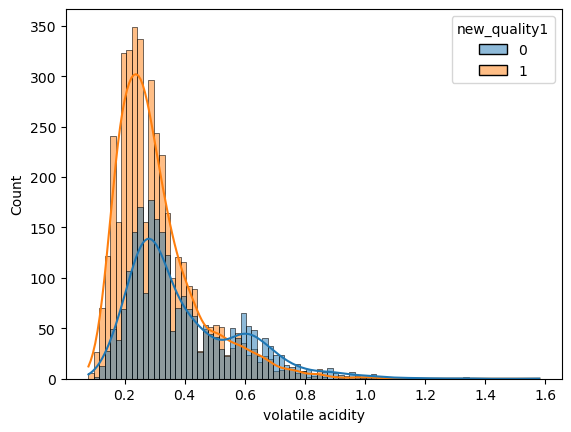

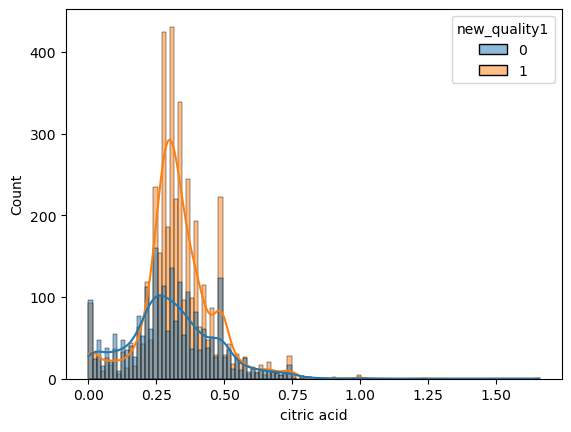

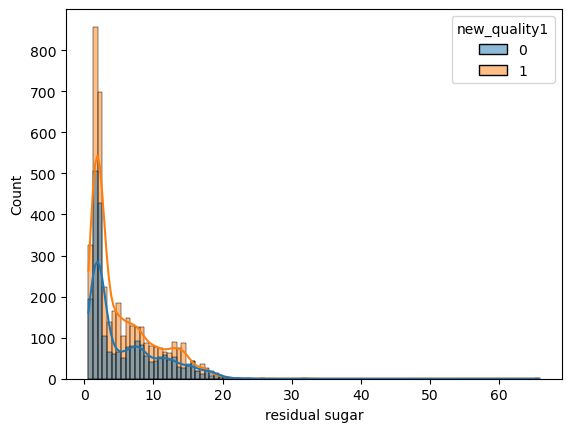

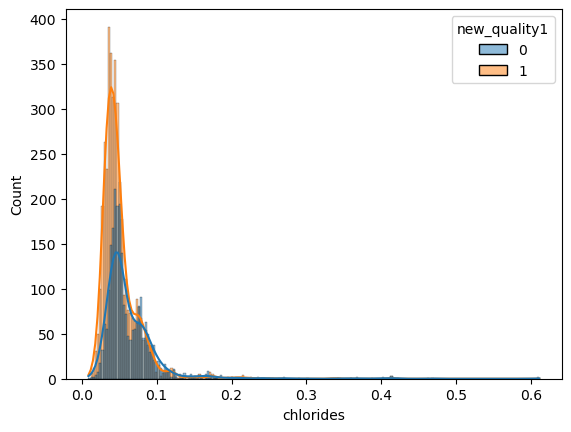

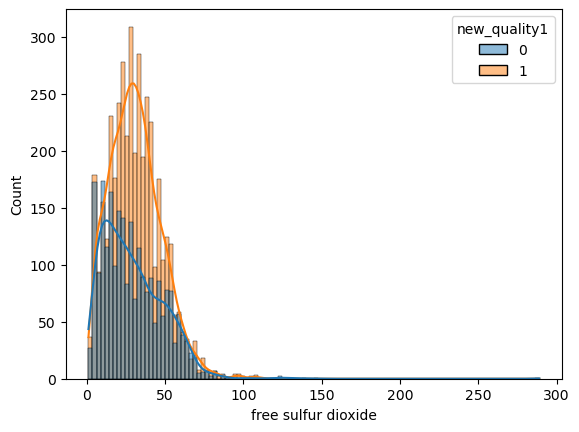

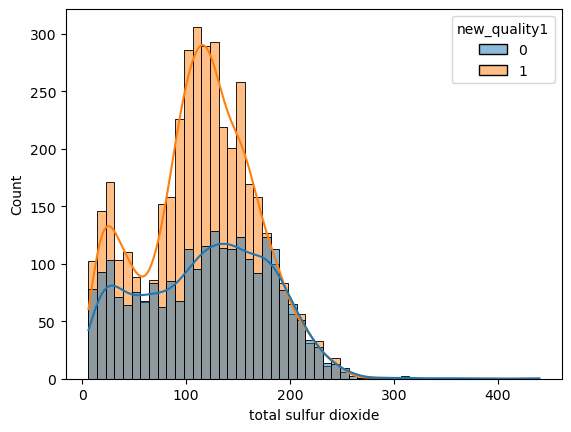

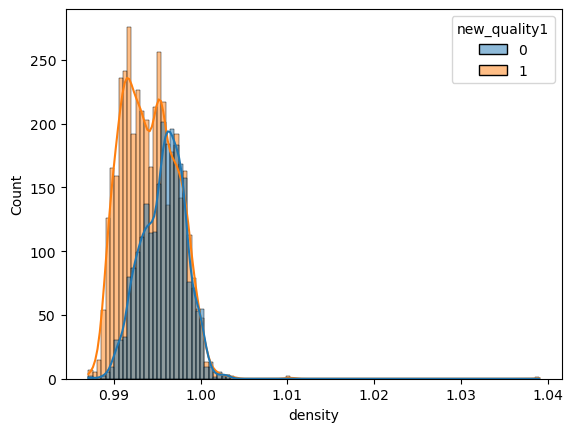

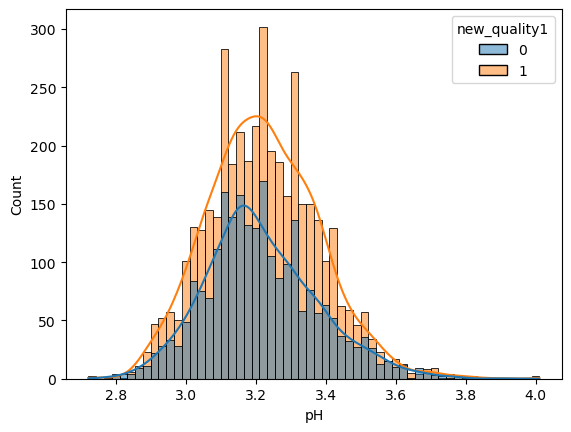

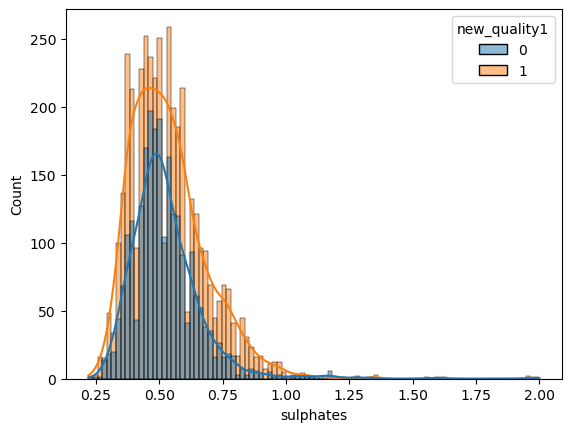

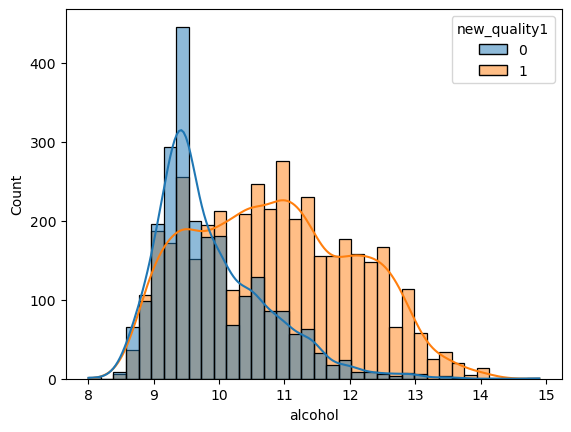

In [42]:
#quality 5이상과 이하일 경우 비교
#alcohol을 제외하고 모두 포함
for i in df.columns:
    if i == 'type':
        continue
    elif i == 'quality':
        break
    sns.histplot(data=df, x=i, hue = df.new_quality1, kde=True)
    plt.show()

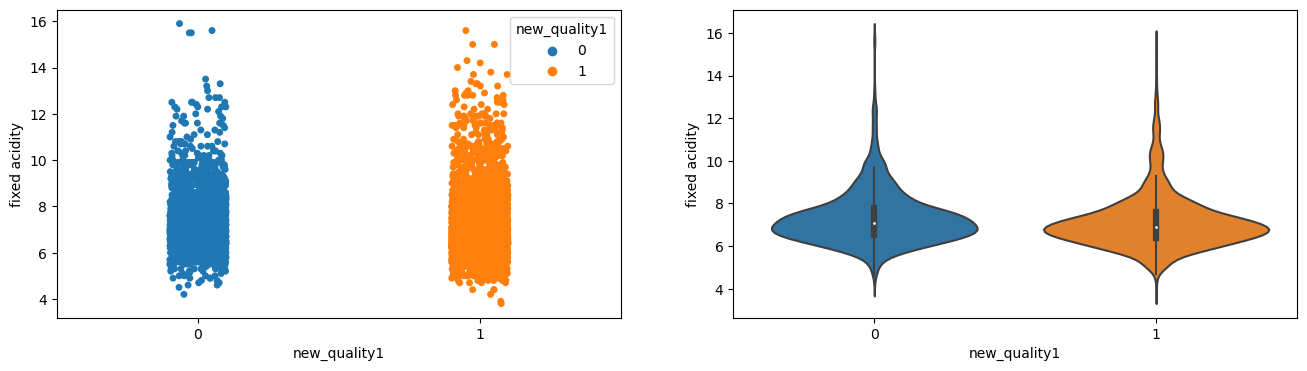

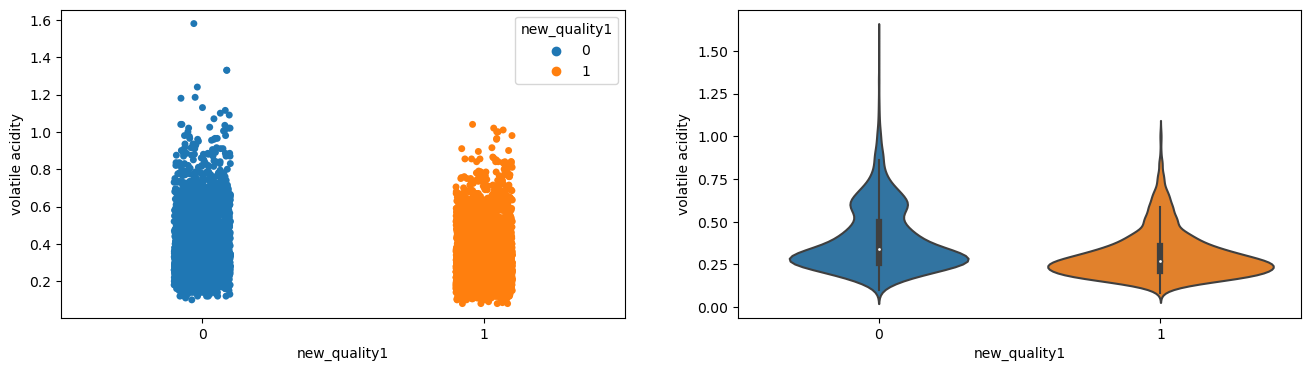

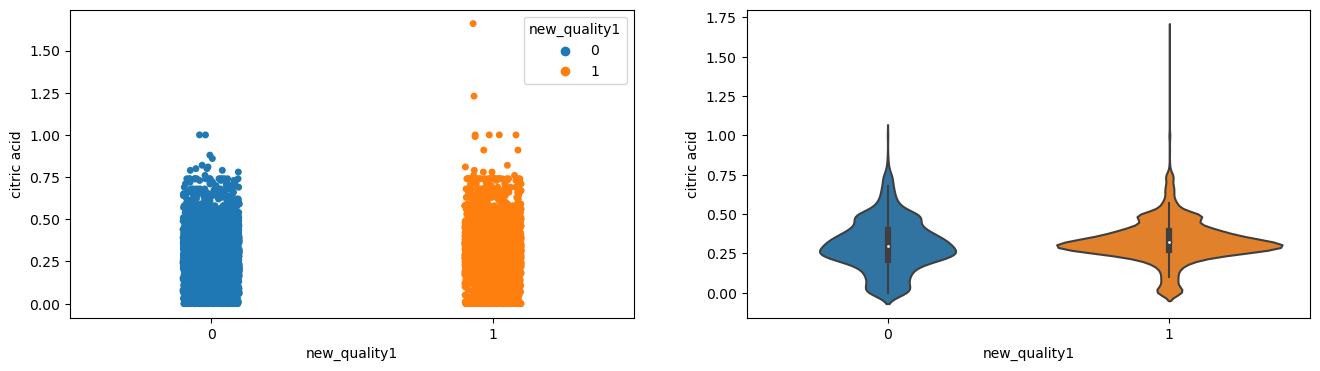

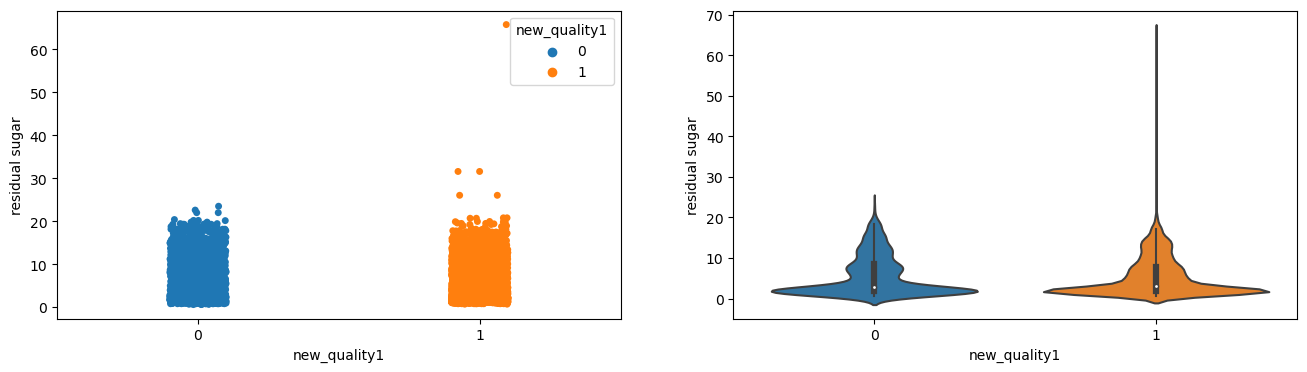

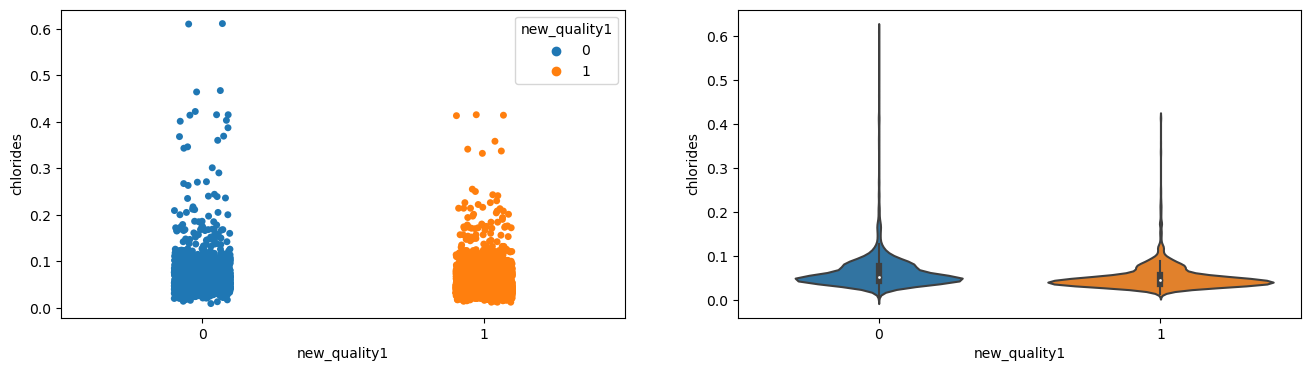

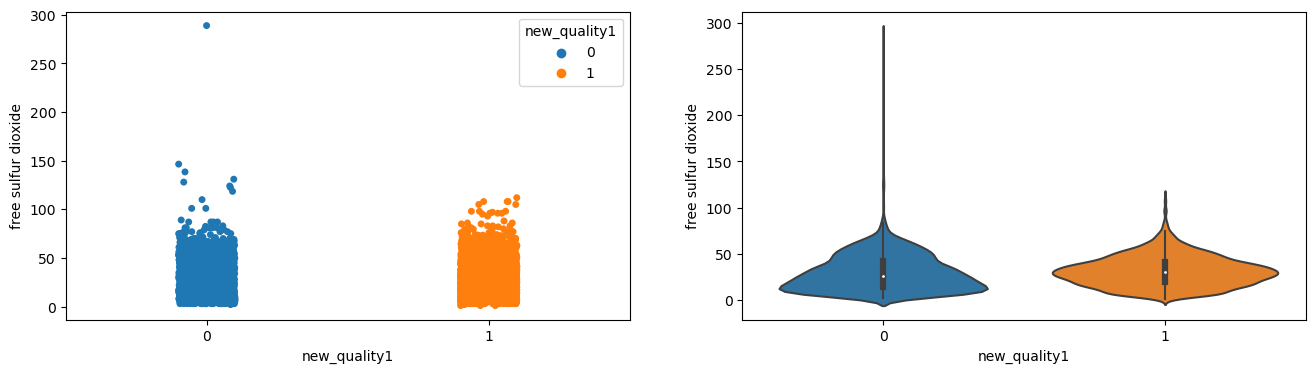

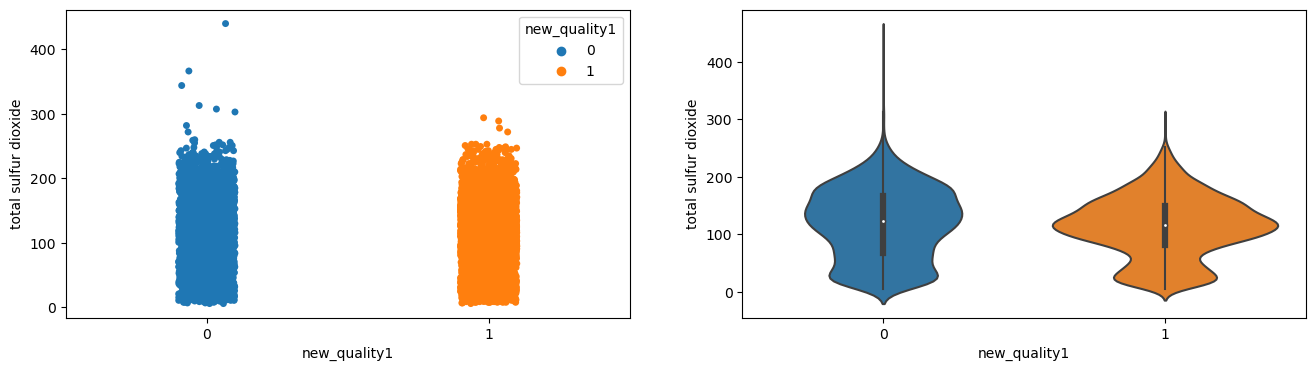

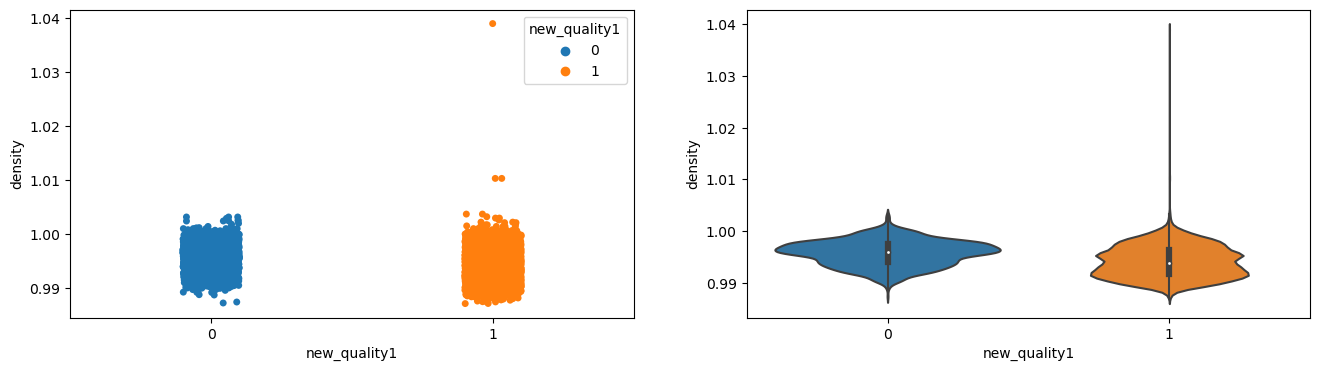

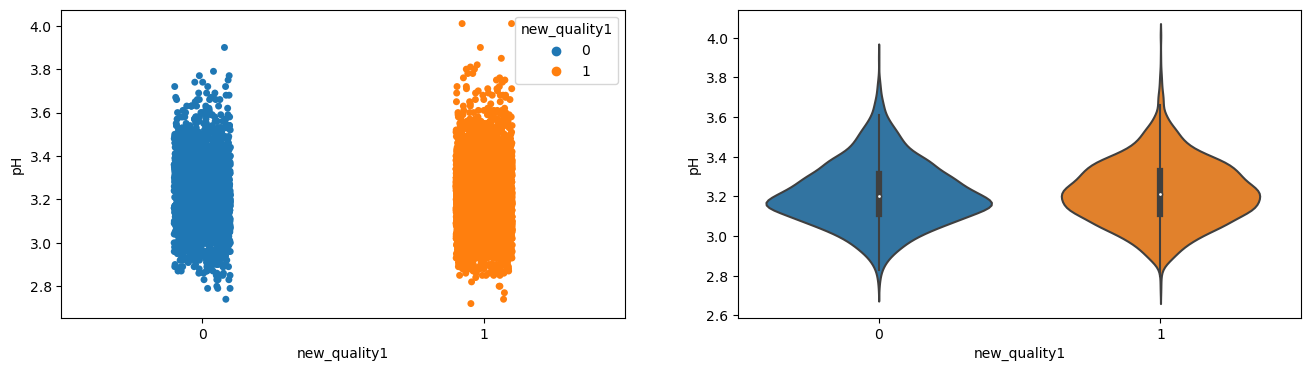

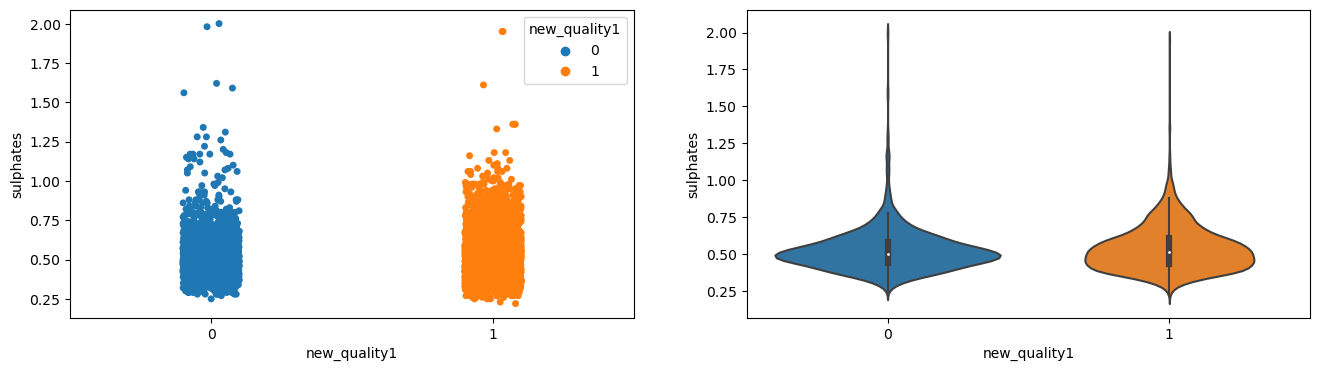

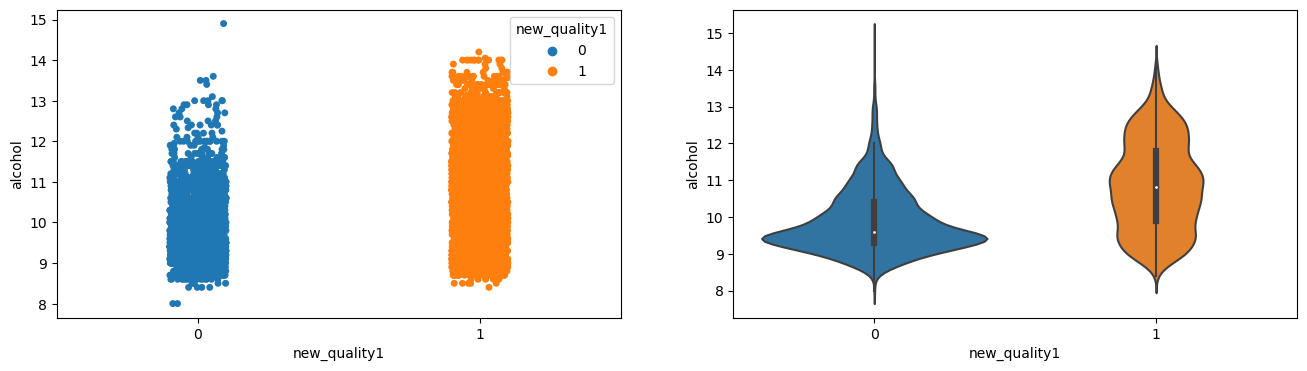

In [43]:
for i in df.columns:
    if i =='type':
        continue
    elif i == 'quality':
        break
    f, ax = plt.subplots(1,2,figsize=(16,4))
    sns.stripplot(x=df['new_quality1'],y=df[i], ax=ax[0],hue=df['new_quality1'])
    sns.violinplot(data=df, x='new_quality1', y=i, ax=ax[1])
    plt.show()

In [44]:
df.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [45]:
df['new_quality2'] = 0
for i in range(len(df)):
    if df.loc[i,'quality'] < 5:
        df.loc[i,'new_quality2'] = 0
    elif df.loc[i,'quality'] == 5:
        df.loc[i,'new_quality2'] = 1
    else:
        df.loc[i,'new_quality2'] = 2
df.new_quality2.value_counts(1)

2    0.633061
1    0.329075
0    0.037864
Name: new_quality2, dtype: float64

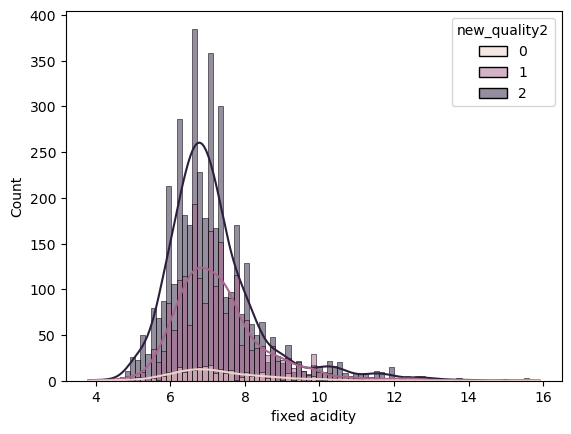

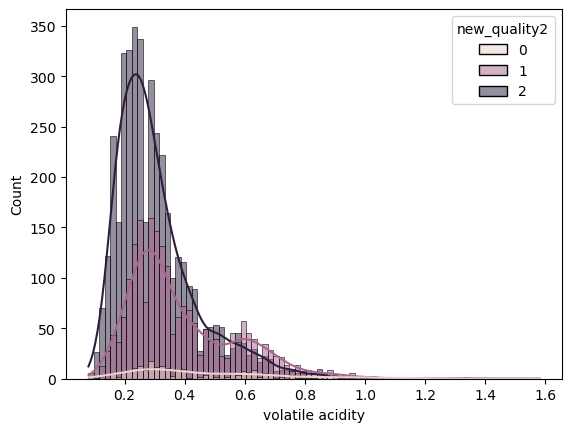

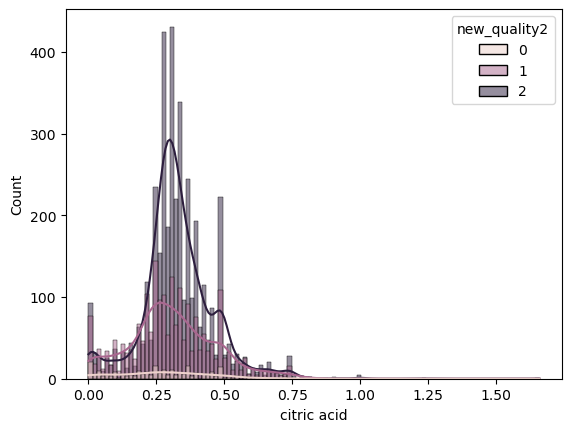

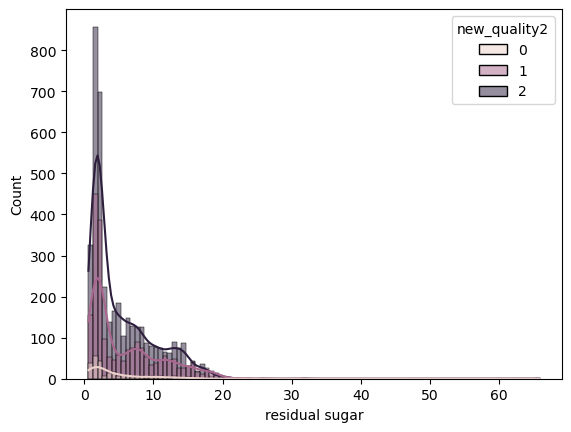

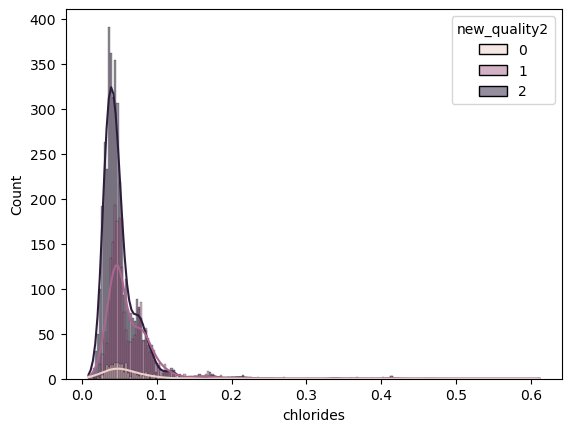

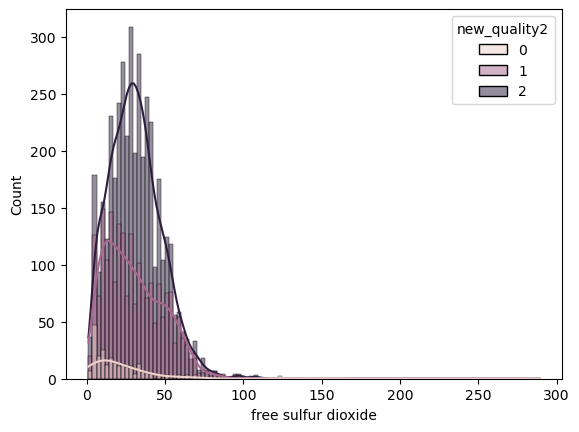

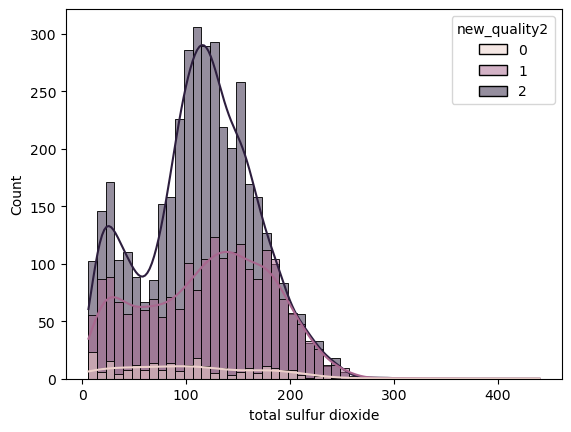

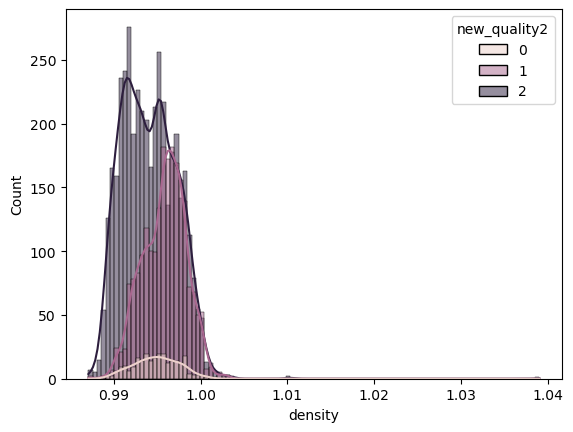

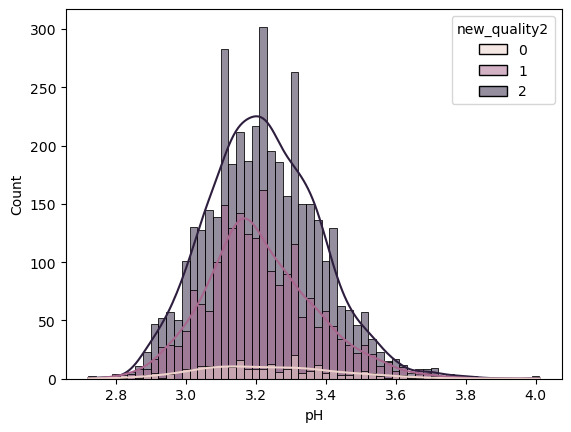

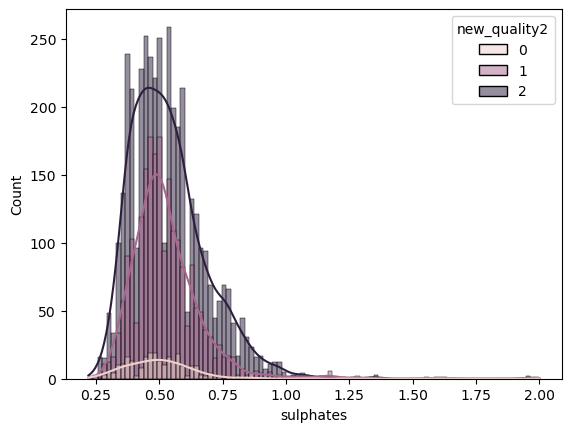

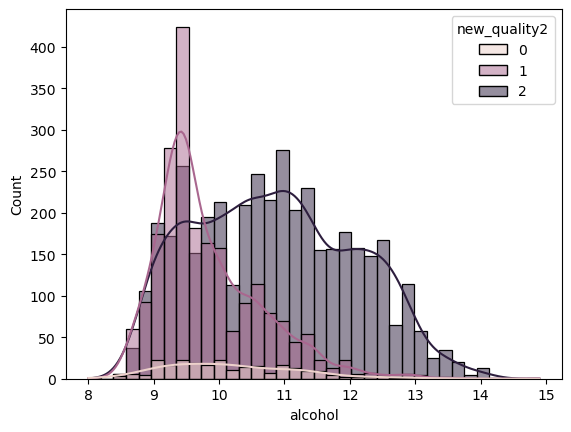

In [46]:
#quality2 비교
#alcohol을 제외하고 모두 포함
for i in df.columns:
    if i == 'type':
        continue
    elif i == 'quality':
        break
    sns.histplot(data=df, x=i, hue = df.new_quality2, kde=True)
    plt.show()

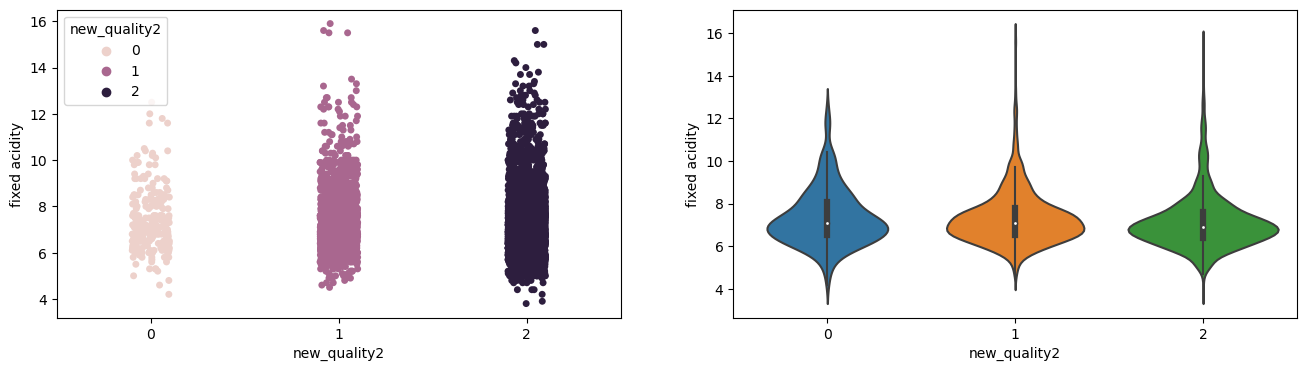

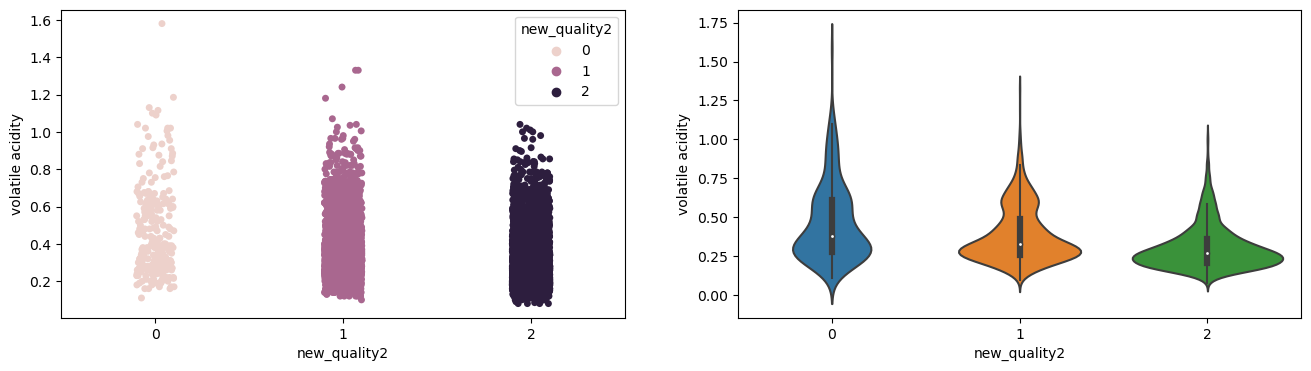

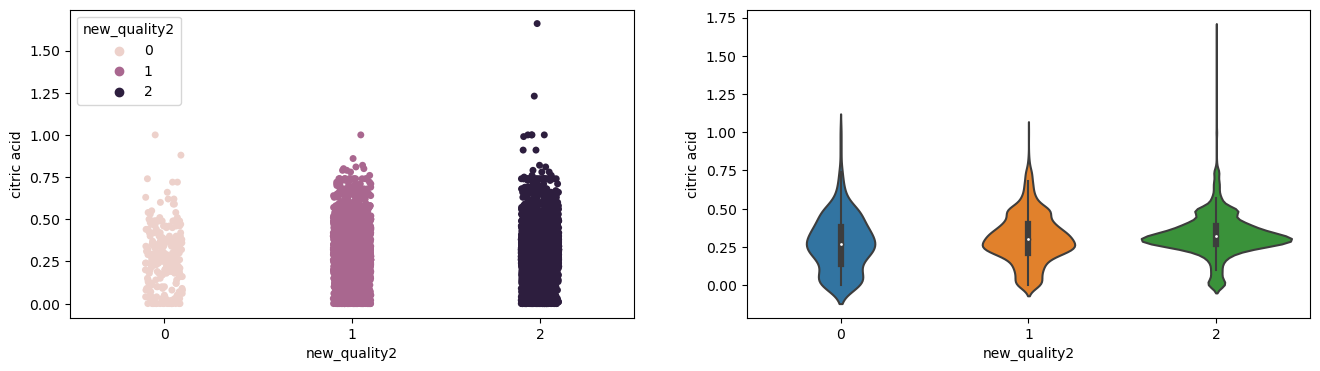

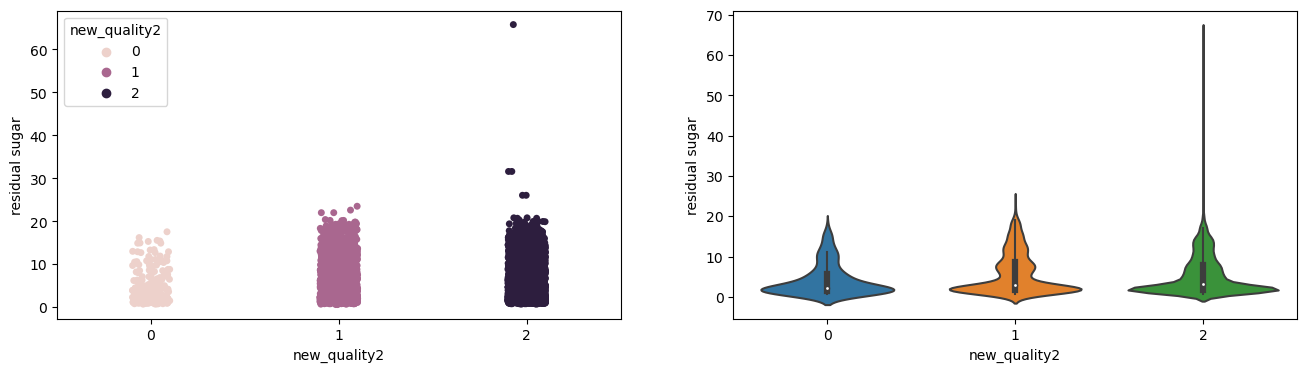

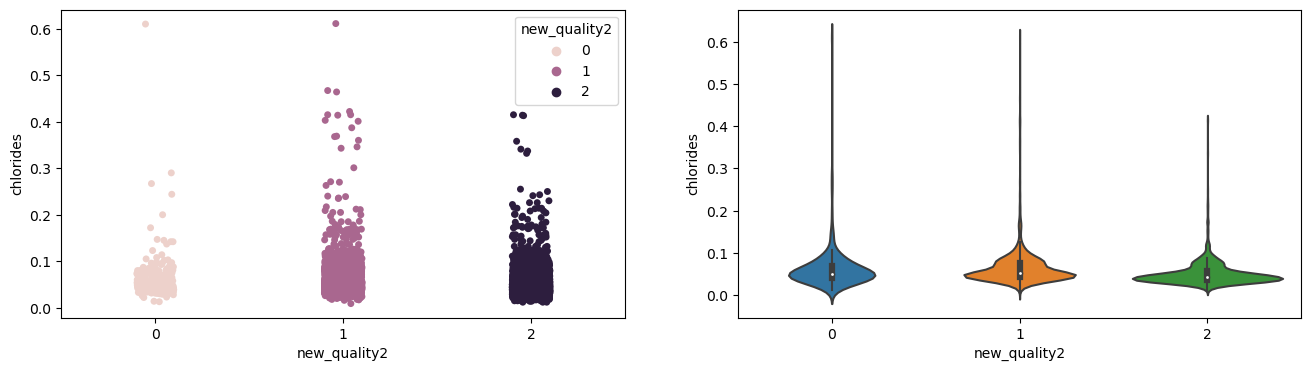

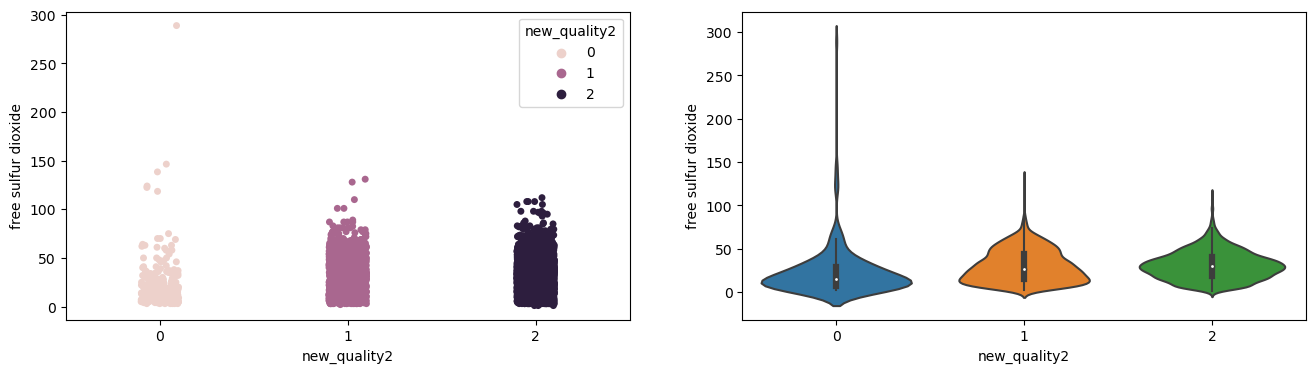

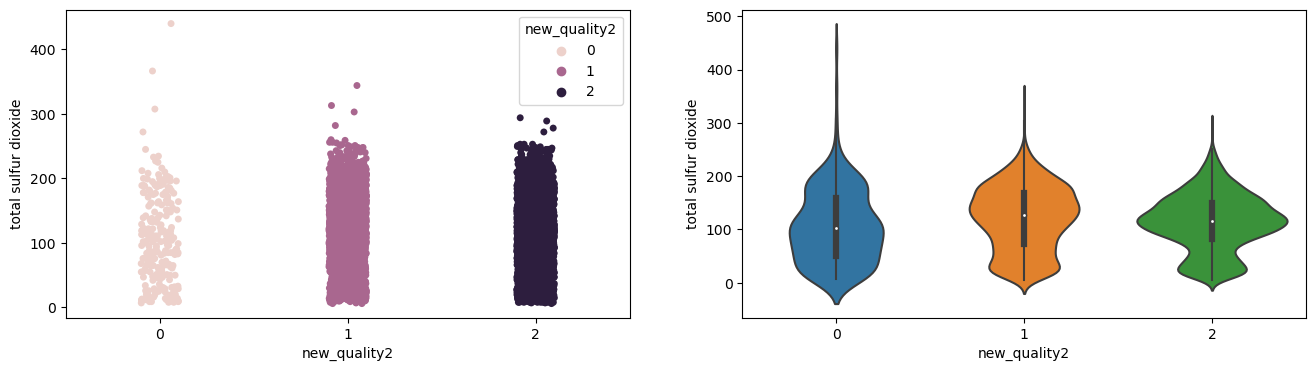

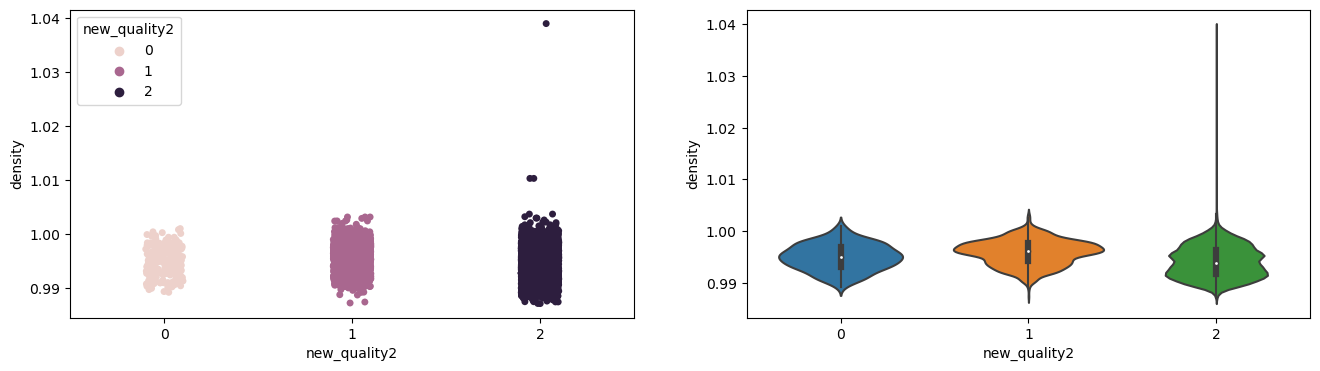

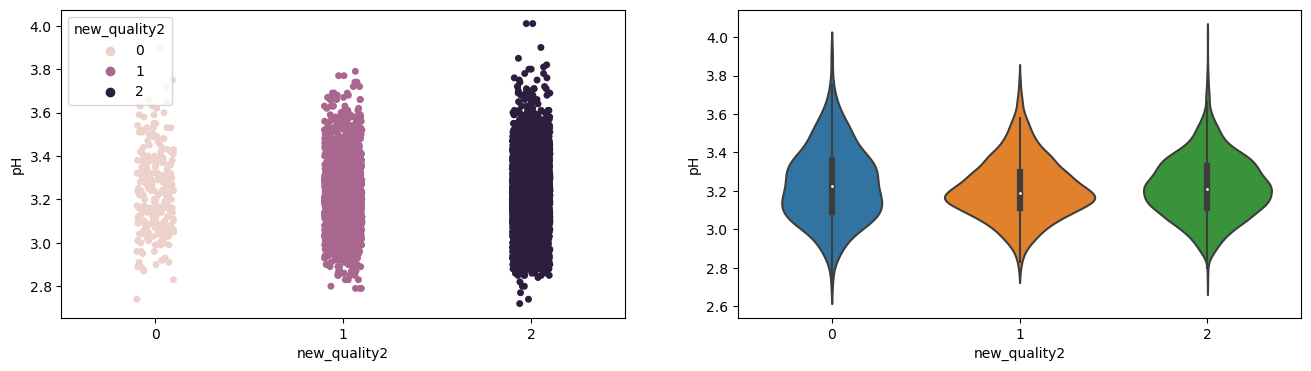

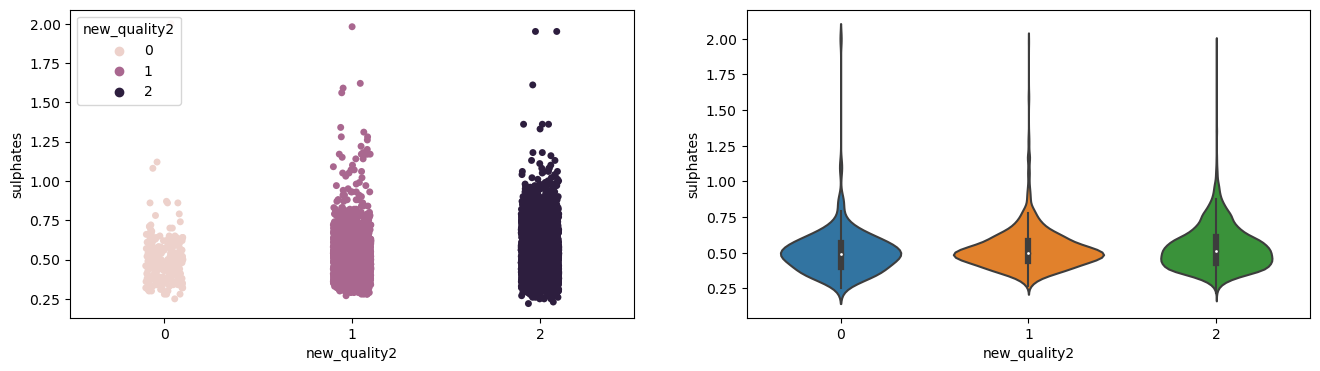

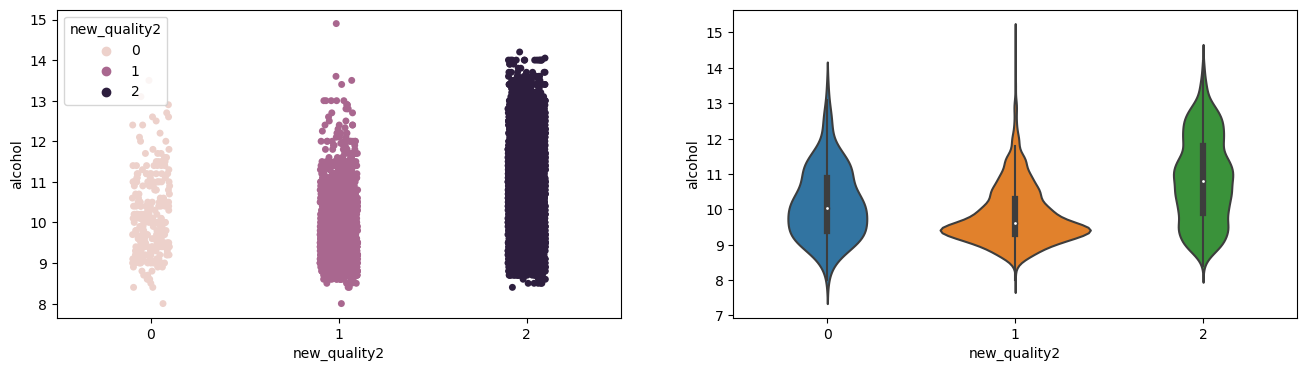

In [47]:
for i in df.columns:
    if i =='type':
        continue
    elif i == 'quality':
        break
    f, ax = plt.subplots(1,2,figsize=(16,4))
    sns.stripplot(x=df['new_quality2'],y=df[i], ax=ax[0],hue=df['new_quality2'])
    sns.violinplot(data=df, x='new_quality2', y=i, ax=ax[1])
    plt.show()

In [48]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'new_quality1', 'new_quality2'],
      dtype='object')

## 쉬운것 type 분류
 ### 이유
 - fixed acidity, volatile acidity, chlorides, sulphates : 값이 클 수록 red
 - citric acid, free sulfur dioxide, total sulfur dioxide : 값이 작을 수록 red


## 어려운 것 quality 분류
### 이유
 - 그래프 상 값이 포함되어 있어 확인하기 어려움
 - but 대부분 실생활 문제에는 quality 확인이 안되어 있음 

In [49]:
df['std_quality'] = df.quality
df.std_quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: std_quality, dtype: int64

In [50]:
df.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [51]:
df_con = df.copy()

In [52]:
df_con.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'new_quality1', 'new_quality2', 'std_quality'],
      dtype='object')

In [53]:
df_con = df_con.drop(columns=['type', 'quality', 'std_quality', 'new_quality1', 'new_quality2'])
df_con

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0             0.270         0.36            20.7      0.045   
1               6.3             0.300         0.34             1.6      0.049   
2               8.1             0.280         0.40             6.9      0.050   
3               7.2             0.230         0.32             8.5      0.058   
4               7.2             0.230         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
6492            6.2             0.600         0.08             2.0      0.090   
6493            5.9             0.550         0.10             2.2      0.062   
6494            6.3             0.510         0.13             2.3      0.076   
6495            5.9             0.645         0.12             2.0      0.075   
6496            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00   0.450000   
1                    14.0                 132.0  0.99400  3.30   0.490000   
2                    30.0                  97.0  0.99510  3.26   0.440000   
3                    47.0                 186.0  0.99560  3.19   0.400000   
4                    47.0                 186.0  0.99560  3.19   0.400000   
...                   ...                   ...      ...   ...        ...   
6492                 32.0                  44.0  0.99490  3.45   0.580000   
6493                 39.0                  51.0  0.99512  3.52   0.532466   
6494                 29.0                  40.0  0.99574  3.42   0.750000   
6495                 32.0                  44.0  0.99547  3.57   0.710000   
6496                 18.0                  42.0  0.99549  3.39   0.660000   

      alcohol  
0         8.8  
1         9.5  
2        10.1  
3         9.9  
4         9.9  
...       ...  
6492     10.5  
6493     11.2  
6494     11.0  
6495     10.2  
6496     11.0  

[6497 rows x 11 columns]

In [54]:
#정규화 확인에 필요한 라이브러리 선언
from scipy.stats import shapiro

In [55]:
Y_li = []
N_li = []
for i in df_con.columns:
    stat, p = shapiro(df_con[i])
    print(i,"의 p값: ", p)
    if p>0.05:
        print('정규분포')
        Y_li.append(i)
    else:
        print('정규분포가 아님')
        N_li.append(i)
    print('---------------------')

fixed acidity 의 p값:  0.0
정규분포가 아님
---------------------
volatile acidity 의 p값:  0.0
정규분포가 아님
---------------------
citric acid 의 p값:  5.0061031147674766e-37
정규분포가 아님
---------------------
residual sugar 의 p값:  0.0
정규분포가 아님
---------------------
chlorides 의 p값:  0.0
정규분포가 아님
---------------------
free sulfur dioxide 의 p값:  5.605193857299268e-45
정규분포가 아님
---------------------
total sulfur dioxide 의 p값:  1.5920966626574383e-27
정규분포가 아님
---------------------
density 의 p값:  1.330269304272158e-35
정규분포가 아님
---------------------
pH 의 p값:  2.169038947597202e-19
정규분포가 아님
---------------------
sulphates 의 p값:  0.0
정규분포가 아님
---------------------
alcohol 의 p값:  2.9630456028148257e-41
정규분포가 아님
---------------------


C:\Users\Jyun\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [56]:
#log1p
#로그변환 이유: 스케일 축소, 비선형적 효과 완화, 안정성 제고, 정규화
log1p_transformed_df_ch = np.log1p(df_con)
log1p_transformed_df_ch

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          2.079442          0.239017     0.307485        3.077312   0.044017   
1          1.987874          0.262364     0.292670        0.955511   0.047837   
2          2.208274          0.246860     0.336472        2.066863   0.048790   
3          2.104134          0.207014     0.277632        2.251292   0.056380   
4          2.104134          0.207014     0.277632        2.251292   0.056380   
...             ...               ...          ...             ...        ...   
6492       1.974081          0.470004     0.076961        1.098612   0.086178   
6493       1.931521          0.438255     0.095310        1.163151   0.060154   
6494       1.987874          0.412110     0.122218        1.193922   0.073250   
6495       1.931521          0.497740     0.113329        1.098612   0.072321   
6496       1.945910          0.270027     0.385262        1.526056   0.064851   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0                3.828641              5.141664  0.693647  1.386294   
1                2.708050              4.890349  0.690143  1.458615   
2                3.433987              4.584967  0.690694  1.449269   
3                3.871201              5.231109  0.690945  1.432701   
4                3.871201              5.231109  0.690945  1.432701   
...                   ...                   ...       ...       ...   
6492             3.496508              3.806662  0.690594  1.492904   
6493             3.688879              3.951244  0.690704  1.508512   
6494             3.401197              3.713572  0.691015  1.486140   
6495             3.496508              3.806662  0.690880  1.519513   
6496             2.944439              3.761200  0.690890  1.479329   

      sulphates   alcohol  
0      0.371564  2.282382  
1      0.398776  2.351375  
2      0.364643  2.406945  
3      0.336472  2.388763  
4      0.336472  2.388763  
...         ...       ...  
6492   0.457425  2.442347  
6493   0.426879  2.501436  
6494   0.559616  2.484907  
6495   0.536493  2.415914  
6496   0.506818  2.484907  

[6497 rows x 11 columns]

In [57]:
Y_li = []
N_li = []
for i in log1p_transformed_df_ch.columns:
    stat, p = shapiro(log1p_transformed_df_ch[i])
    print(i,"의 p값: ", p)
    if p>0.05:
        print('정규분포')
        Y_li.append(i)
    else:
        print('정규분포가 아님')
        N_li.append(i)
    print('---------------------')

fixed acidity 의 p값:  5.268882225861312e-43
정규분포가 아님
---------------------
volatile acidity 의 p값:  0.0
정규분포가 아님
---------------------
citric acid 의 p값:  4.43252425154443e-34
정규분포가 아님
---------------------
residual sugar 의 p값:  0.0
정규분포가 아님
---------------------
chlorides 의 p값:  0.0
정규분포가 아님
---------------------
free sulfur dioxide 의 p값:  8.748264273825903e-40
정규분포가 아님
---------------------
total sulfur dioxide 의 p값:  0.0
정규분포가 아님
---------------------
density 의 p값:  2.2797190473863522e-35
정규분포가 아님
---------------------
pH 의 p값:  4.0178231293201694e-13
정규분포가 아님
---------------------
sulphates 의 p값:  8.04345318522445e-43
정규분포가 아님
---------------------
alcohol 의 p값:  5.862627855530783e-37
정규분포가 아님
---------------------


C:\Users\Jyun\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [58]:
#box-cox 수행 불가 - data에 0 존재

In [59]:
log1p_transformed_df_ch

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          2.079442          0.239017     0.307485        3.077312   0.044017   
1          1.987874          0.262364     0.292670        0.955511   0.047837   
2          2.208274          0.246860     0.336472        2.066863   0.048790   
3          2.104134          0.207014     0.277632        2.251292   0.056380   
4          2.104134          0.207014     0.277632        2.251292   0.056380   
...             ...               ...          ...             ...        ...   
6492       1.974081          0.470004     0.076961        1.098612   0.086178   
6493       1.931521          0.438255     0.095310        1.163151   0.060154   
6494       1.987874          0.412110     0.122218        1.193922   0.073250   
6495       1.931521          0.497740     0.113329        1.098612   0.072321   
6496       1.945910          0.270027     0.385262        1.526056   0.064851   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0                3.828641              5.141664  0.693647  1.386294   
1                2.708050              4.890349  0.690143  1.458615   
2                3.433987              4.584967  0.690694  1.449269   
3                3.871201              5.231109  0.690945  1.432701   
4                3.871201              5.231109  0.690945  1.432701   
...                   ...                   ...       ...       ...   
6492             3.496508              3.806662  0.690594  1.492904   
6493             3.688879              3.951244  0.690704  1.508512   
6494             3.401197              3.713572  0.691015  1.486140   
6495             3.496508              3.806662  0.690880  1.519513   
6496             2.944439              3.761200  0.690890  1.479329   

      sulphates   alcohol  
0      0.371564  2.282382  
1      0.398776  2.351375  
2      0.364643  2.406945  
3      0.336472  2.388763  
4      0.336472  2.388763  
...         ...       ...  
6492   0.457425  2.442347  
6493   0.426879  2.501436  
6494   0.559616  2.484907  
6495   0.536493  2.415914  
6496   0.506818  2.484907  

[6497 rows x 11 columns]

In [60]:
log1p_transformed_df_ch

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          2.079442          0.239017     0.307485        3.077312   0.044017   
1          1.987874          0.262364     0.292670        0.955511   0.047837   
2          2.208274          0.246860     0.336472        2.066863   0.048790   
3          2.104134          0.207014     0.277632        2.251292   0.056380   
4          2.104134          0.207014     0.277632        2.251292   0.056380   
...             ...               ...          ...             ...        ...   
6492       1.974081          0.470004     0.076961        1.098612   0.086178   
6493       1.931521          0.438255     0.095310        1.163151   0.060154   
6494       1.987874          0.412110     0.122218        1.193922   0.073250   
6495       1.931521          0.497740     0.113329        1.098612   0.072321   
6496       1.945910          0.270027     0.385262        1.526056   0.064851   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0                3.828641              5.141664  0.693647  1.386294   
1                2.708050              4.890349  0.690143  1.458615   
2                3.433987              4.584967  0.690694  1.449269   
3                3.871201              5.231109  0.690945  1.432701   
4                3.871201              5.231109  0.690945  1.432701   
...                   ...                   ...       ...       ...   
6492             3.496508              3.806662  0.690594  1.492904   
6493             3.688879              3.951244  0.690704  1.508512   
6494             3.401197              3.713572  0.691015  1.486140   
6495             3.496508              3.806662  0.690880  1.519513   
6496             2.944439              3.761200  0.690890  1.479329   

      sulphates   alcohol  
0      0.371564  2.282382  
1      0.398776  2.351375  
2      0.364643  2.406945  
3      0.336472  2.388763  
4      0.336472  2.388763  
...         ...       ...  
6492   0.457425  2.442347  
6493   0.426879  2.501436  
6494   0.559616  2.484907  
6495   0.536493  2.415914  
6496   0.506818  2.484907  

[6497 rows x 11 columns]

In [61]:
#표준화에 필요한 라이브러리 선언
from sklearn.preprocessing import StandardScaler

In [62]:
for i in log1p_transformed_df_ch.columns:
    origin_data = log1p_transformed_df_ch[i].values.reshape(-1,1)
    scaler_origin = StandardScaler()
    df_con[i] = scaler_origin.fit_transform(origin_data)

In [63]:
df_con

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.108137         -0.405800     0.335397        2.135303  -0.325312   
1         -0.739892         -0.202230     0.200528       -0.975705  -0.201202   
2          0.780727         -0.337414     0.599284        0.653771  -0.170249   
3          0.062226         -0.684837     0.063631        0.924183   0.076324   
4          0.062226         -0.684837     0.063631        0.924183   0.076324   
...             ...               ...          ...             ...        ...   
6492      -0.835057          1.608213    -1.763171       -0.765889   1.044314   
6493      -1.128692          1.331391    -1.596130       -0.671261   0.198912   
6494      -0.739892          1.103426    -1.351179       -0.626144   0.624363   
6495      -1.128692          1.850055    -1.432099       -0.765889   0.594158   
6496      -1.029418         -0.135416     1.043445       -0.139165   0.351499   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0                0.856538              0.805895  2.100425 -1.384714   
1               -0.853151              0.446387 -0.231707  0.524932   
2                0.254413              0.009535  0.135313  0.278152   
3                0.921472              0.933848  0.302073 -0.159342   
4                0.921472              0.933848  0.302073 -0.159342   
...                   ...                   ...       ...       ...   
6492             0.349801             -1.103840  0.068597  1.430343   
6493             0.643303             -0.897015  0.141984  1.842474   
6494             0.204386             -1.237007  0.348758  1.251727   
6495             0.349801             -1.103840  0.258719  2.132963   
6496            -0.492492             -1.168875  0.265389  1.071895   

      sulphates   alcohol  
0     -0.547504 -1.514080  
1     -0.250411 -0.835816  
2     -0.623058 -0.289512  
3     -0.930614 -0.468262  
4     -0.930614 -0.468262  
...         ...       ...  
6492   0.389886  0.058521  
6493   0.056397  0.639420  
6494   1.505556  0.476922  
6495   1.253117 -0.201342  
6496   0.929132  0.476922  

[6497 rows x 11 columns]

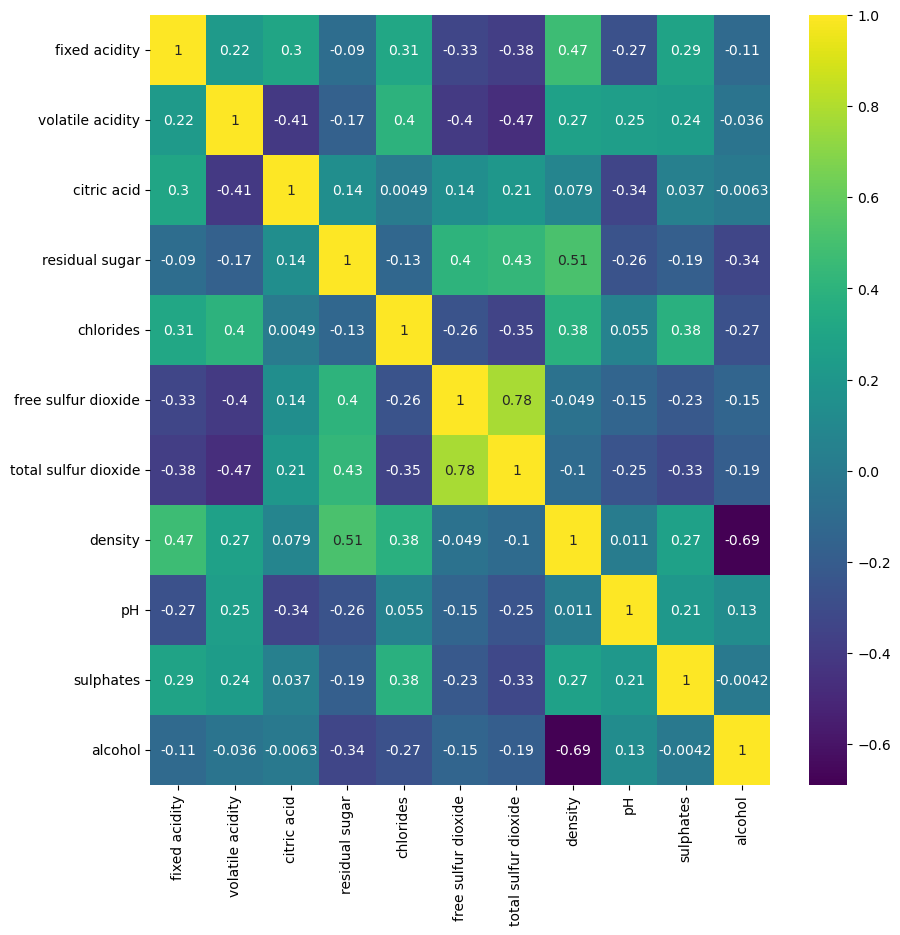

In [64]:
#연속형 범주 자료 상관관계 분석 진행
plt.figure(figsize=(10,10))
sns.heatmap(df_con.corr(), annot=True, cmap='viridis')
plt.show()

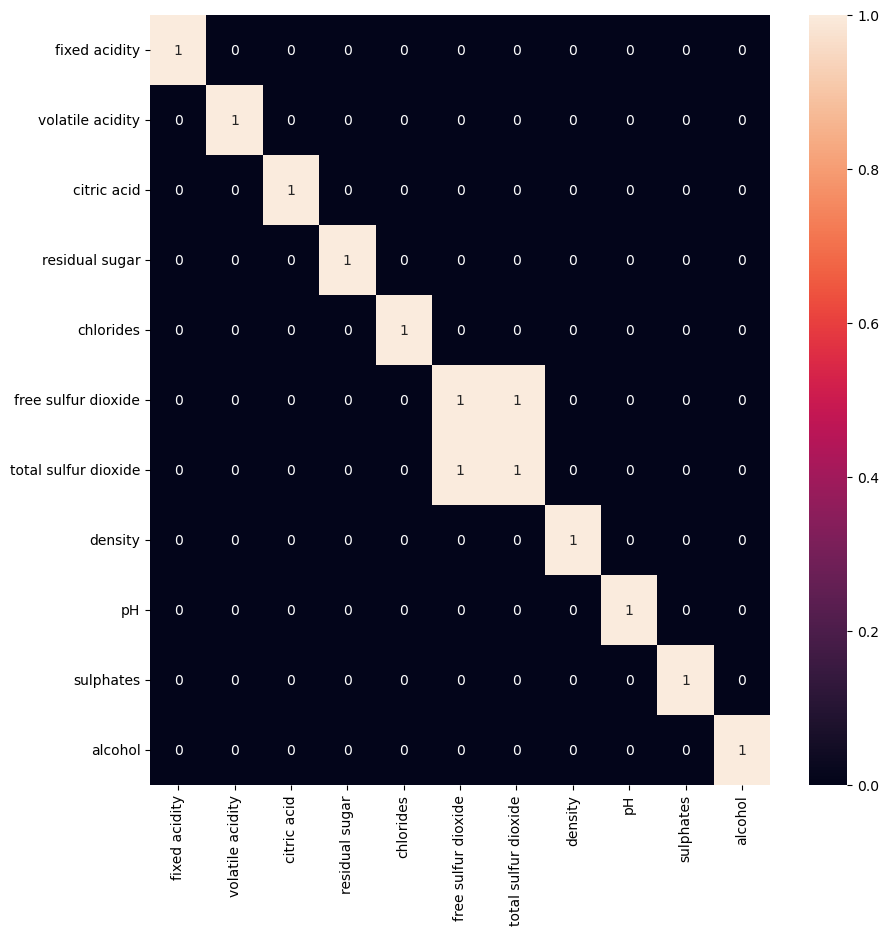

In [65]:
# 0.7 이상이면 다중공선성 문제가 발생할 수 있으므로 연속형 변수 확인
#free sulfur dioxide와 total sulfur dioxide의 상관관계가 0.7이상으로 다중공선성 가능
plt.figure(figsize=(10,10))
sns.heatmap(df_con.corr()>0.7, annot=True)
plt.show()

In [66]:
df_con.values

array([[-0.10813711, -0.40579979,  0.33539669, ..., -1.38471375,
        -0.5475044 , -1.51407976],
       [-0.73989226, -0.20223009,  0.20052782, ...,  0.52493154,
        -0.25041118, -0.8358157 ],
       [ 0.78072742, -0.33741377,  0.59928421, ...,  0.27815168,
        -0.62305836, -0.28951241],
       ...,
       [-0.73989226,  1.10342583, -1.35117873, ...,  1.25172747,
         1.50555629,  0.476922  ],
       [-1.12869153,  1.850055  , -1.43209911, ...,  2.13296338,
         1.25311724, -0.20134205],
       [-1.02941844, -0.13541618,  1.0434446 , ...,  1.07189532,
         0.92913197,  0.476922  ]])

In [67]:
df_con.shape[1]

11

In [68]:
df_con = pd.concat([df_con, df.iloc[:,-1]], axis=1)
df_con

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.108137         -0.405800     0.335397        2.135303  -0.325312   
1         -0.739892         -0.202230     0.200528       -0.975705  -0.201202   
2          0.780727         -0.337414     0.599284        0.653771  -0.170249   
3          0.062226         -0.684837     0.063631        0.924183   0.076324   
4          0.062226         -0.684837     0.063631        0.924183   0.076324   
...             ...               ...          ...             ...        ...   
6492      -0.835057          1.608213    -1.763171       -0.765889   1.044314   
6493      -1.128692          1.331391    -1.596130       -0.671261   0.198912   
6494      -0.739892          1.103426    -1.351179       -0.626144   0.624363   
6495      -1.128692          1.850055    -1.432099       -0.765889   0.594158   
6496      -1.029418         -0.135416     1.043445       -0.139165   0.351499   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0                0.856538              0.805895  2.100425 -1.384714   
1               -0.853151              0.446387 -0.231707  0.524932   
2                0.254413              0.009535  0.135313  0.278152   
3                0.921472              0.933848  0.302073 -0.159342   
4                0.921472              0.933848  0.302073 -0.159342   
...                   ...                   ...       ...       ...   
6492             0.349801             -1.103840  0.068597  1.430343   
6493             0.643303             -0.897015  0.141984  1.842474   
6494             0.204386             -1.237007  0.348758  1.251727   
6495             0.349801             -1.103840  0.258719  2.132963   
6496            -0.492492             -1.168875  0.265389  1.071895   

      sulphates   alcohol  std_quality  
0     -0.547504 -1.514080            6  
1     -0.250411 -0.835816            6  
2     -0.623058 -0.289512            6  
3     -0.930614 -0.468262            6  
4     -0.930614 -0.468262            6  
...         ...       ...          ...  
6492   0.389886  0.058521            5  
6493   0.056397  0.639420            6  
6494   1.505556  0.476922            6  
6495   1.253117 -0.201342            5  
6496   0.929132  0.476922            6  

[6497 rows x 12 columns]

In [69]:
#순서형 정규화 x일 경우
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data_frame):
    variables = data_frame.values
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data_frame.columns
    vif_data["VIF"] = [variance_inflation_factor(variables, i) for i in range(data_frame.shape[1])]
    display(vif_data)
    return vif_data

# VIF 계산
vif_result = calculate_vif(df_con.iloc[:, :-1])
print(vif_result)

Variable        VIF
0          fixed acidity   3.562155
1       volatile acidity   1.891330
2            citric acid   1.646374
3         residual sugar   4.475484
4              chlorides   1.632702
5    free sulfur dioxide   2.674219
6   total sulfur dioxide   3.603595
7                density  10.474618
8                     pH   2.108961
9              sulphates   1.481506
10               alcohol   3.968725

                Variable        VIF
0          fixed acidity   3.562155
1       volatile acidity   1.891330
2            citric acid   1.646374
3         residual sugar   4.475484
4              chlorides   1.632702
5    free sulfur dioxide   2.674219
6   total sulfur dioxide   3.603595
7                density  10.474618
8                     pH   2.108961
9              sulphates   1.481506
10               alcohol   3.968725


In [70]:
df_ch = df_con.copy()

#### 다중공선성 문제로 아래의 컬럼 삭제
 - 정규화, 로그변환 등을 통해 다중공선성 감소 -> density만 삭제

In [71]:
df_con.drop(columns=['density', 'std_quality'], inplace=True)
df_con.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH',
       'sulphates', 'alcohol'],
      dtype='object')

In [72]:
vif_result = calculate_vif(df_con)
print(vif_result)

Variable       VIF
0         fixed acidity  1.851310
1      volatile acidity  1.788304
2           citric acid  1.641879
3        residual sugar  1.427669
4             chlorides  1.599780
5   free sulfur dioxide  2.674200
6  total sulfur dioxide  3.459296
7                    pH  1.461826
8             sulphates  1.344369
9               alcohol  1.368854

               Variable       VIF
0         fixed acidity  1.851310
1      volatile acidity  1.788304
2           citric acid  1.641879
3        residual sugar  1.427669
4             chlorides  1.599780
5   free sulfur dioxide  2.674200
6  total sulfur dioxide  3.459296
7                    pH  1.461826
8             sulphates  1.344369
9               alcohol  1.368854


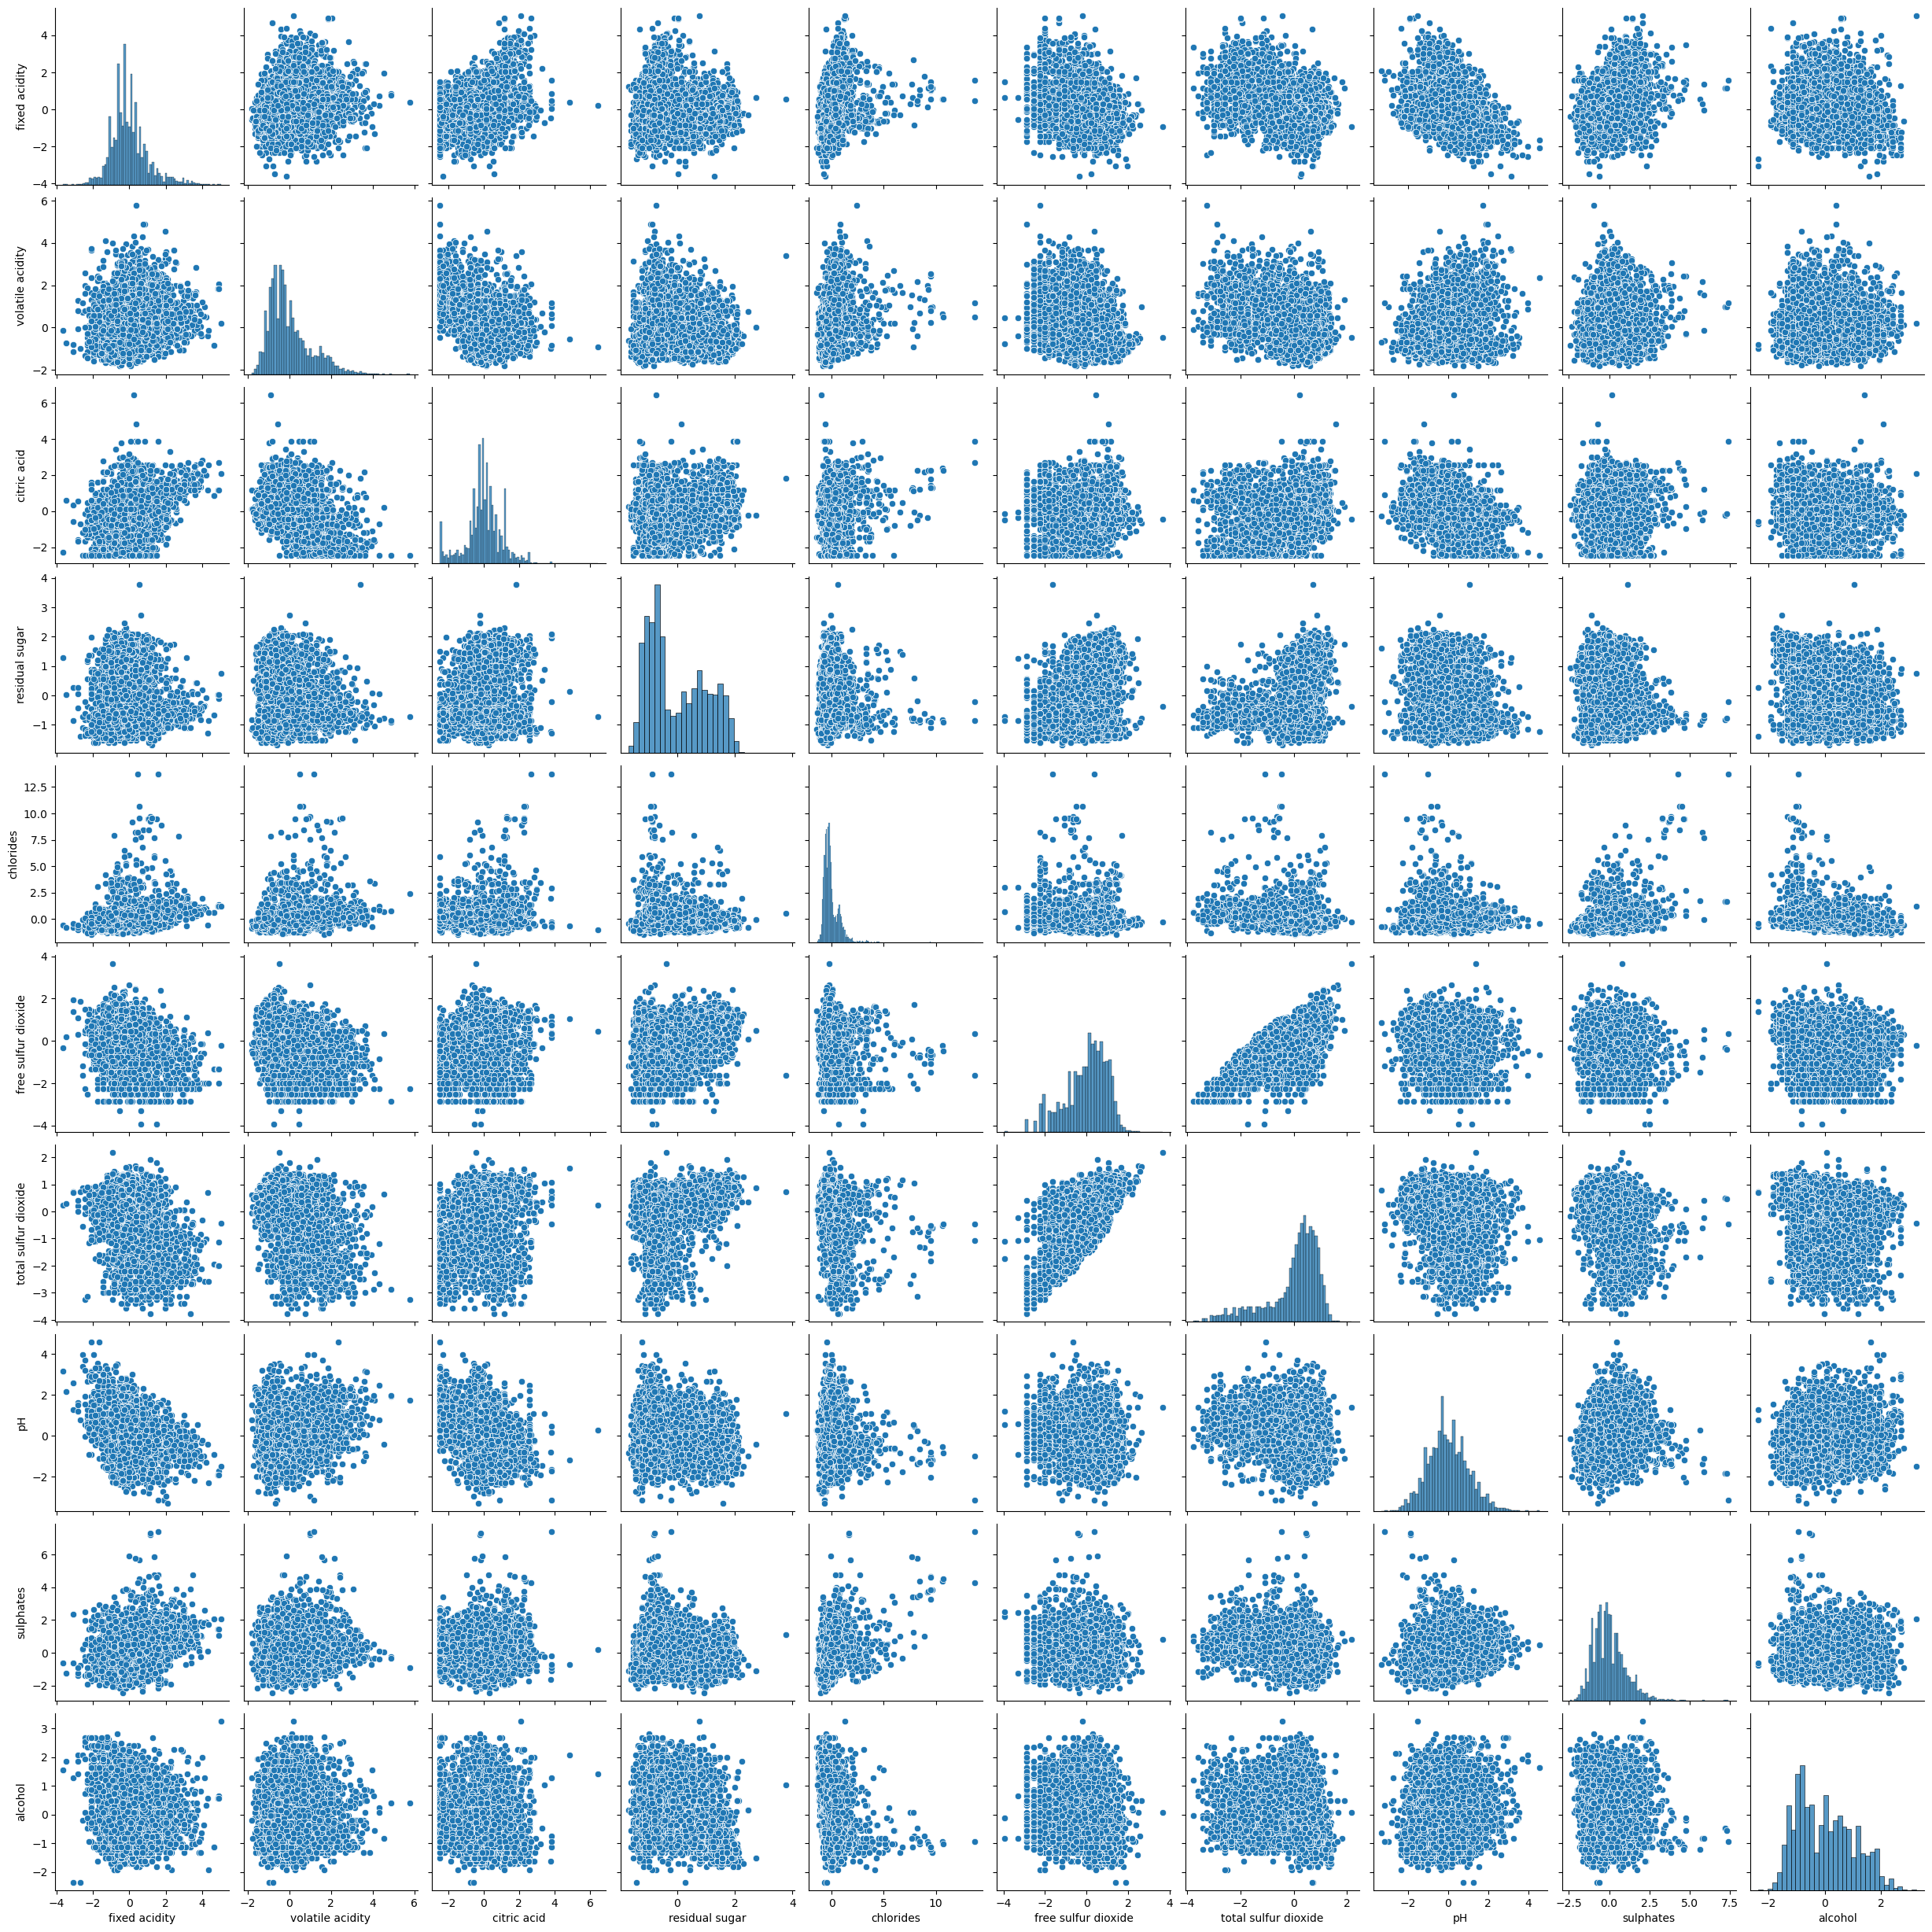

In [73]:
sns.pairplot(df_con)
plt.show()

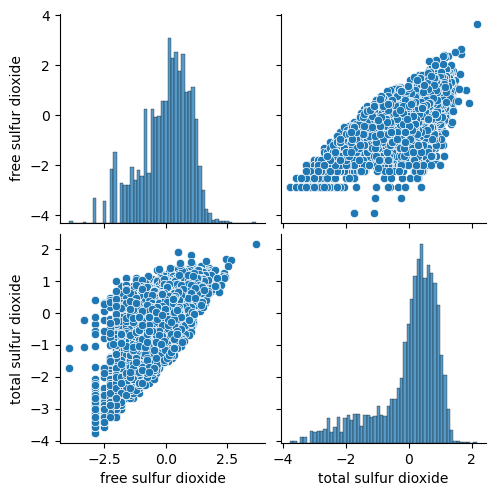

In [74]:
sns.pairplot(df_con[['free sulfur dioxide', 'total sulfur dioxide']])
plt.show()

In [75]:
df_con.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH',
       'sulphates', 'alcohol'],
      dtype='object')

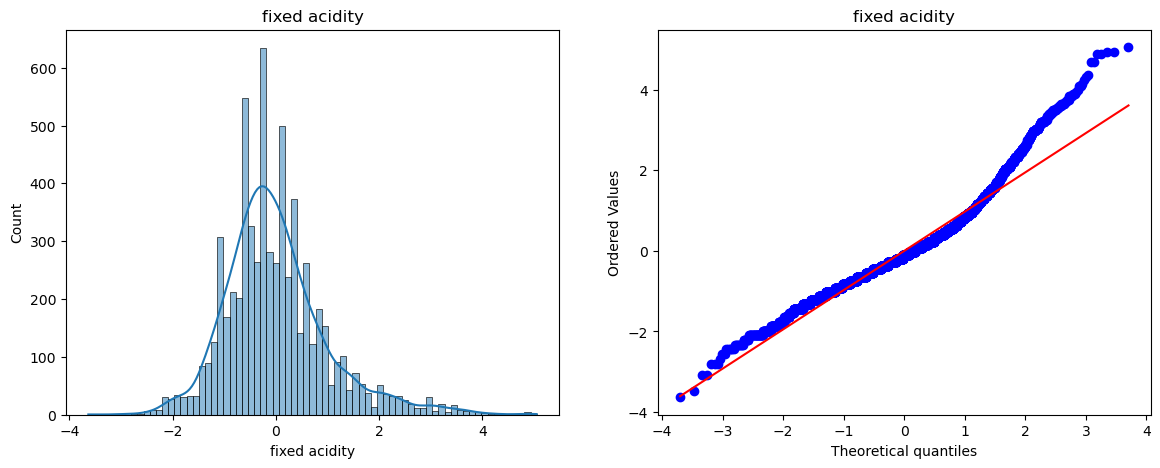

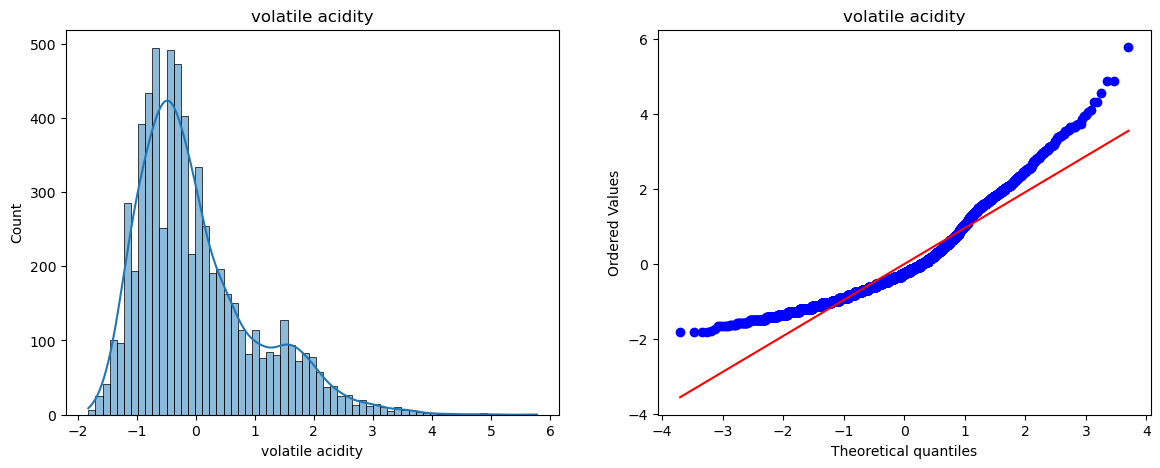

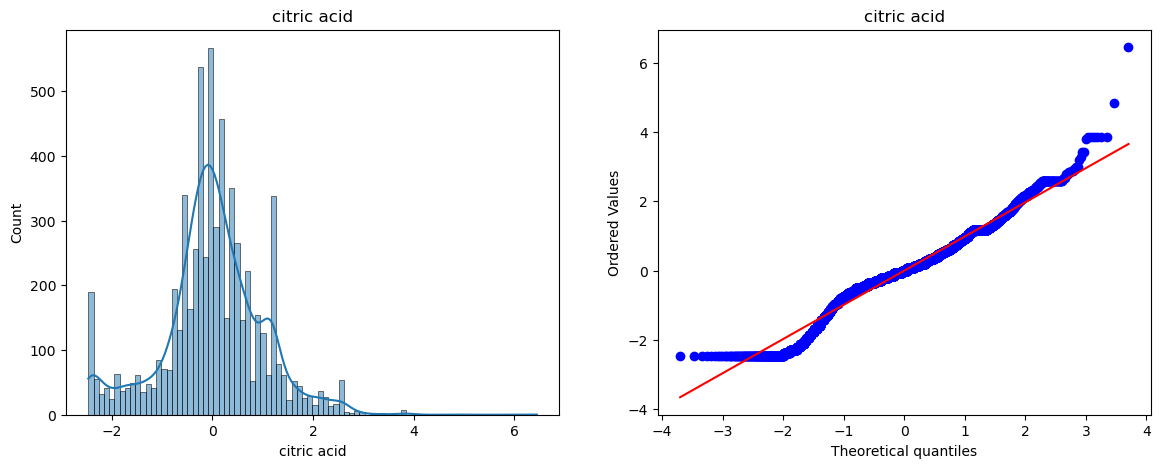

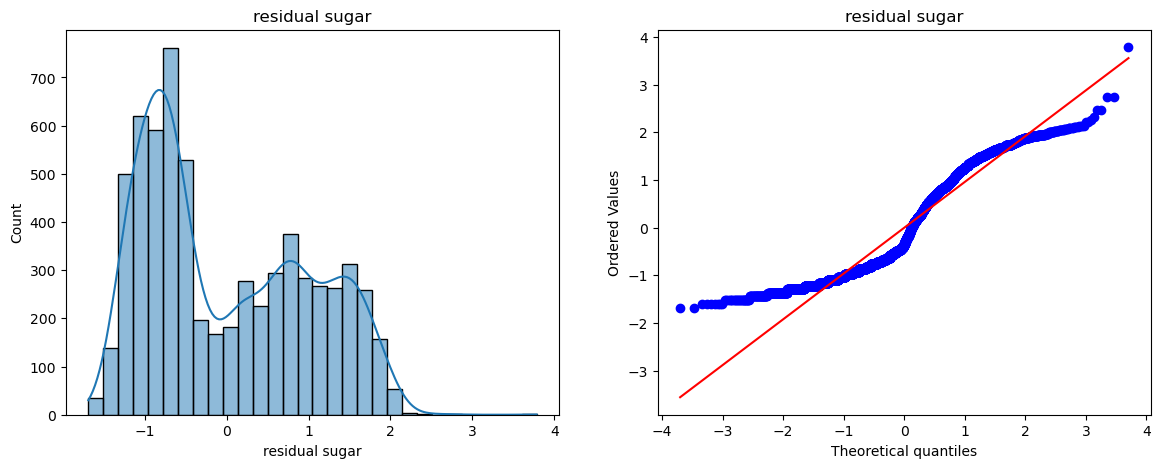

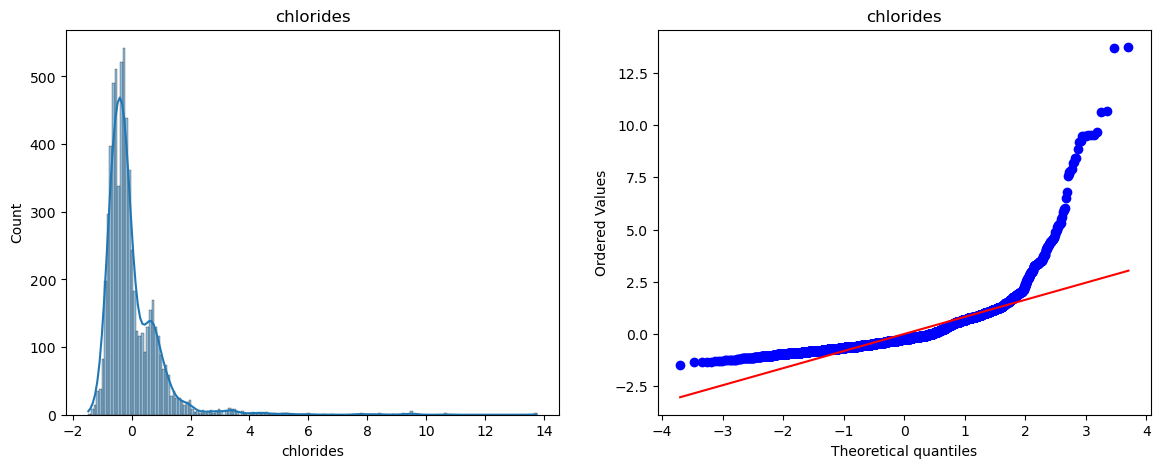

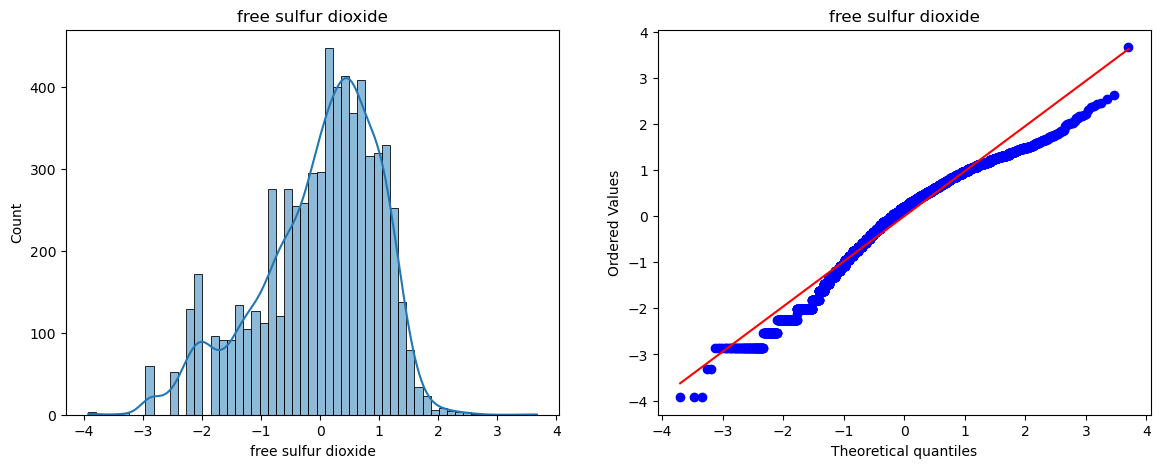

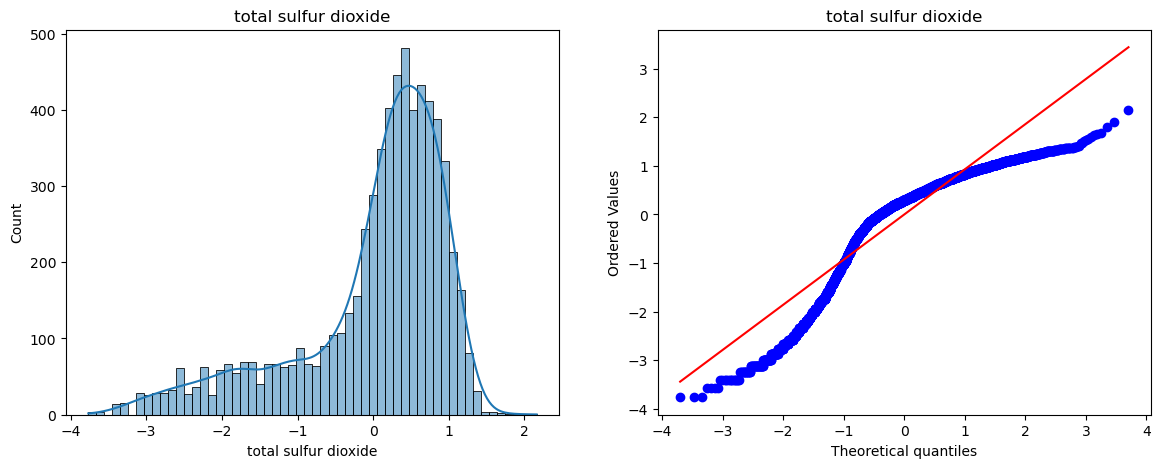

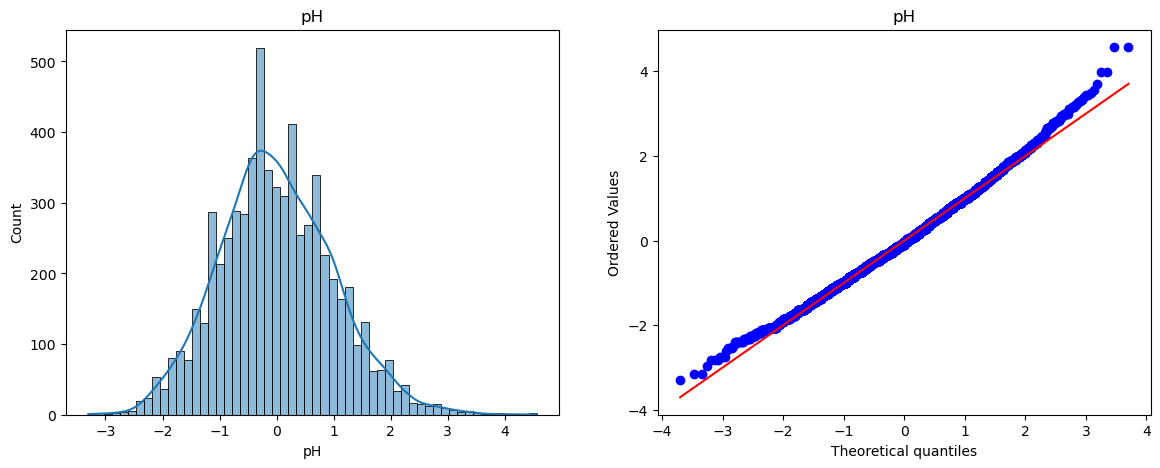

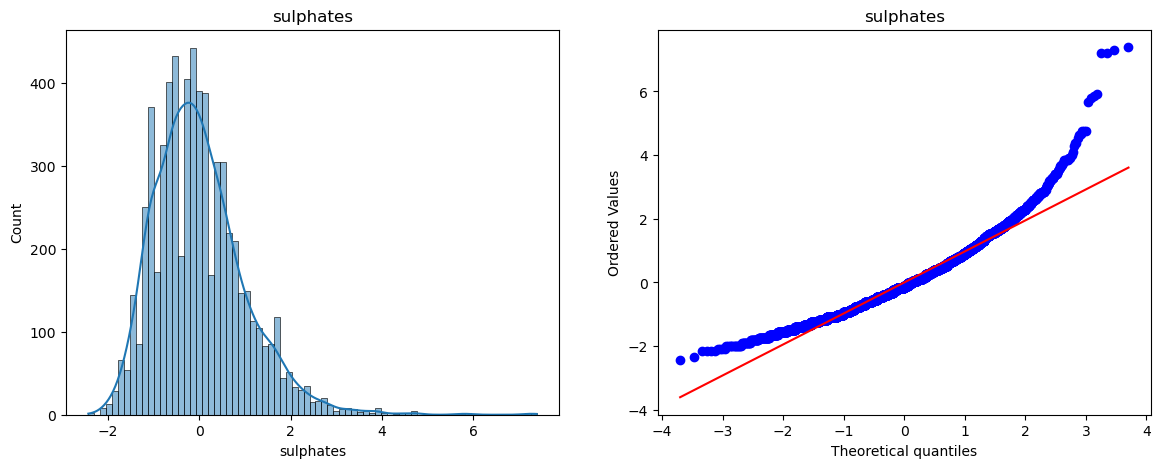

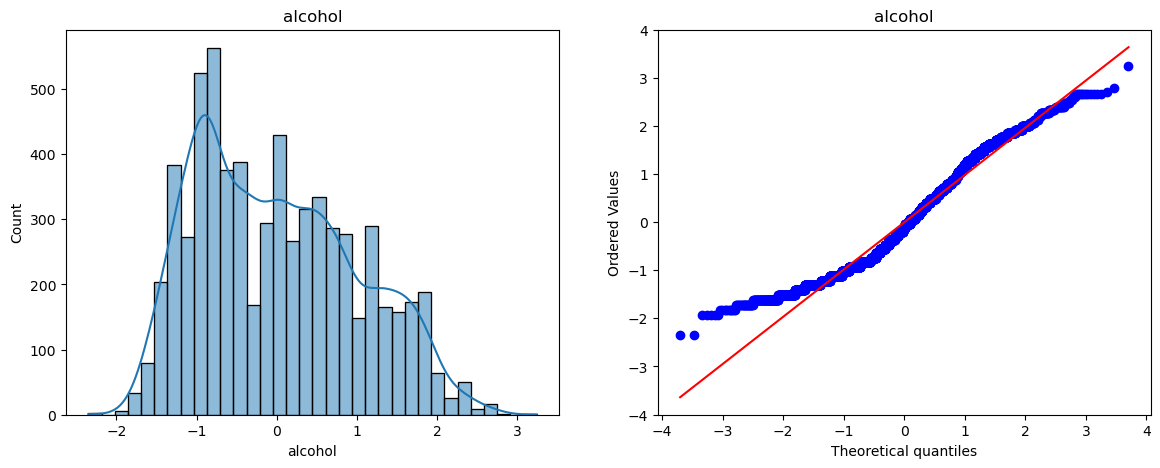

In [76]:
import scipy.stats as stats
for col in df_con.columns:
    plt.figure(figsize=(14,5))
    plt.subplot(121)
    sns.histplot(df_con[col], kde=True)
    plt.title(col)

    plt.subplot(122)
    stats.probplot(df_con[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

### 그래프 확인 결과
 - 정규화 분포 유사: 'fixed acidity', 'pH'
 - 우측 꼬리 분포: 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides','sulphates', 'alcohol'
 - 조측 꼬리 분포: 'free sulfur dioxide', 'total sulfur dioxide'

In [77]:
df.loc[:,['type', 'quality', 'new_quality1', 'new_quality2']]

type  quality  new_quality1  new_quality2
0        0        6             1             2
1        0        6             1             2
2        0        6             1             2
3        0        6             1             2
4        0        6             1             2
...    ...      ...           ...           ...
6492     1        5             0             1
6493     1        6             1             2
6494     1        6             1             2
6495     1        5             0             1
6496     1        6             1             2

[6497 rows x 4 columns]

In [78]:
df_final = pd.concat([df_con, df.loc[:,['type', 'quality', 'new_quality1', 'new_quality2']]], axis=1)
df_final

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.108137         -0.405800     0.335397        2.135303  -0.325312   
1         -0.739892         -0.202230     0.200528       -0.975705  -0.201202   
2          0.780727         -0.337414     0.599284        0.653771  -0.170249   
3          0.062226         -0.684837     0.063631        0.924183   0.076324   
4          0.062226         -0.684837     0.063631        0.924183   0.076324   
...             ...               ...          ...             ...        ...   
6492      -0.835057          1.608213    -1.763171       -0.765889   1.044314   
6493      -1.128692          1.331391    -1.596130       -0.671261   0.198912   
6494      -0.739892          1.103426    -1.351179       -0.626144   0.624363   
6495      -1.128692          1.850055    -1.432099       -0.765889   0.594158   
6496      -1.029418         -0.135416     1.043445       -0.139165   0.351499   

      free sulfur dioxide  total sulfur dioxide        pH  sulphates  \
0                0.856538              0.805895 -1.384714  -0.547504   
1               -0.853151              0.446387  0.524932  -0.250411   
2                0.254413              0.009535  0.278152  -0.623058   
3                0.921472              0.933848 -0.159342  -0.930614   
4                0.921472              0.933848 -0.159342  -0.930614   
...                   ...                   ...       ...        ...   
6492             0.349801             -1.103840  1.430343   0.389886   
6493             0.643303             -0.897015  1.842474   0.056397   
6494             0.204386             -1.237007  1.251727   1.505556   
6495             0.349801             -1.103840  2.132963   1.253117   
6496            -0.492492             -1.168875  1.071895   0.929132   

       alcohol  type  quality  new_quality1  new_quality2  
0    -1.514080     0        6             1             2  
1    -0.835816     0        6             1             2  
2    -0.289512     0        6             1             2  
3    -0.468262     0        6             1             2  
4    -0.468262     0        6             1             2  
...        ...   ...      ...           ...           ...  
6492  0.058521     1        5             0             1  
6493  0.639420     1        6             1             2  
6494  0.476922     1        6             1             2  
6495 -0.201342     1        5             0             1  
6496  0.476922     1        6             1             2  

[6497 rows x 14 columns]

In [106]:
df = df_final.copy()
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH',
       'sulphates', 'alcohol', 'type', 'quality', 'new_quality1',
       'new_quality2'],
      dtype='object')

In [107]:
# type(red = 1, white = 0)
# new_quality1(5이상이면 1, 이하면 0)
# new_quality2(5이하면 0, 5이면 1, 5이상이면 6)

## 로지스틱 회귀
### 로지스틱 회귀
 - 종속 변수(y)가 두가지 범주(이항)을 가질 때 사용
 - 선형 회귀와 유사 
 - 시그모이드함수(S)
 - 회귀(여러 개의 독립변수와 한개의 종속변수 간의 상관관계를 모델링하는 기법)
 
 
### 다항 로지스틱 회귀
 - 종속 변수가 다항일 경우 사용
 -

In [108]:
#train_test split에 필요한 라이브러리 선언
from sklearn.model_selection import train_test_split

## 로지스틱 회귀
 ### 로지스틱 회귀의 type 분류

##### 로지스틱 회귀 파라미터
 - penalty: 규제에 사용된 기준 설정, 기본(l2), l1, l2, elasticnet(l1+l2), None(없음)
   - l1(라쏘): 특성의 값이 낮으면 0으로 수렴 -> bias 증가 -> overfitting 방지(모델의 중요한 특성만 사용, 일부 가중치 0 가능)
   - l2(릿지): 영향을 거의 미치지 않는 특성에 0에 가까운 가중치 부여(모든 가중치를 고르게 축소, 다중공선성 문제 완화에 효과적)
   - elasticnet: l1(희소성) + l2(안전성)
 - dual: 이중 또는 초기 공식, 기본(False)
 - tol: 중지 기준의 허용 오차, 기본(1e-4)
 - C: 정규화(규제) 강도, 기본(1.0), 값이 작을수록 더 강력한 정규화 지정
 - fit_intercept: decision function에 bias/intercept 추가 여부, 기본(True)
 - intercept_scaling: 정규화 효과 정도(solver==liblinear & self.fit_intercept==True일 경우 유용), 기본(1.0)
 - class_wdight: 가중치 설정, 기본(None) dict/balanced
 - random_state: (solver == sag, saga, liblinear일때 사용), 기본(None)
 - solver: 최적화 문제에 사용할 알고리즘, (작은 데이터= liblinear, 큰 데이터: sag, saga), (다중 class: newton-cg, sag, saga, lbfgs),                기본(lbfgs), lbfgs, liblinear, newton-cg, newton-cholesky, sag, saga
   - lbfgs: 중소규모의 데이터에 효과적 {l2, none}
   - newton-cholesky: 소규모 데이터에 효과적(뉴턴-랭초스키 방법 기반) {l2, none}
   - newton-cg: 소규모 데이터에 효과적(뉴턴-랭초스키 방법 기반) {l2, none}
   - liblinear: 이진분류에 효과적(다중 클래스 분류에 제한적) {l1, l2}
   - sag: 대용량 데이터에 효과적, 확률적 경사하강법의 변형 {l2, none}
   - saga: 대용량 데이터에 효과적, 확률적 경사하강법의 변형 {l1, l2, elasticnet, none}
 - max_iter: 수렴하는데 최대 반복 횟수, 기본(100)
 - multi_class: (ovr = 이진 분류), (solver=liblinear인 경우 multi 불가), (auto-ovr|sover=liblinear(이진), 그외 multi),                                   기본(auto), auto, ovr, multinomial
 - verbose: solver=liblinear/lbfgs 경우 정보 표시 위해 양수로 설정, 기본(0)
 - warm_start: true 시 이전 값을 재사용하여 초기화에 적용, false시 이전 값 제거, 기본(False)
 - n_jobs: solver=ovr일 경우 병렬화에 사용되는 CPU 코어 수, (solver=liblinear인 경우 무시), 기본(None=1)
 - l1_ratio: penalty = elastinet에서만 사용(l1_ratio=0 -> l2 penalty 이용과 같음, l1_ratio=1 -> l1 penalty 이용과 같음), (l1 규제 비율),              기본(None)

In [109]:
#각각의 type에 대한 합계 구하기
df_val = df['type'].value_counts()
df_val

0    4898
1    1599
Name: type, dtype: int64

In [110]:
df.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [111]:
df['type_quality'] = df['type'].astype(str) + ' ' + df['quality'].astype(str)
df['type_quality']

0       0 6
1       0 6
2       0 6
3       0 6
4       0 6
       ... 
6492    1 5
6493    1 6
6494    1 6
6495    1 5
6496    1 6
Name: type_quality, Length: 6497, dtype: object

In [112]:
df.type_quality.value_counts()

0 6    2198
0 5    1457
0 7     880
1 5     681
1 6     638
1 7     199
0 8     175
0 4     163
1 4      53
0 3      20
1 8      18
1 3      10
0 9       5
Name: type_quality, dtype: int64

In [113]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH',
       'sulphates', 'alcohol', 'type', 'quality', 'new_quality1',
       'new_quality2', 'type_quality'],
      dtype='object')

In [114]:
X = df.drop(columns=['type', 'new_quality1', 'new_quality2', 'type_quality'])
y = df['type']

In [115]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=df.type_quality, random_state=5)

In [116]:
display(x_train)
display(x_test)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4764      -1.128692         -0.474726    -0.145654        0.345039  -0.294240   
3707      -0.371839          0.062007     0.792298       -0.975705  -0.449898   
2788      -0.194923          0.443930     0.728414        0.517733   0.321039   
131       -0.553412         -0.614236     0.063631        0.778252  -0.543652   
2083       1.702009         -0.202230     0.063631        1.229590  -0.826549   
...             ...               ...          ...             ...        ...   
3509      -0.646022         -0.474726    -0.432401        1.229590  -0.294240   
40        -0.371839         -0.684837     0.534026       -0.539871   3.400636   
4166      -1.229414         -0.684837    -0.005598       -0.171391  -0.356414   
563        0.228484         -0.202230    -0.653550       -1.093064  -0.294240   
6482      -0.371839         -0.069110     0.855737       -0.582373   0.168308   

      free sulfur dioxide  total sulfur dioxide        pH  sulphates  \
4764             0.439574              0.263031  0.153891  -0.852909   
3707             0.204386              0.238366  0.091541  -0.623058   
2788             0.717742              0.855228 -0.604206   0.109935   
131              0.952930              1.058319  1.430343   0.109935   
2083            -0.853151              0.200553 -2.393955  -0.775753   
...                   ...                   ...       ...        ...   
3509             1.430281              0.879271 -0.285683   0.180599   
40               1.360389              0.701812 -0.668374  -1.247085   
4166             0.482554              0.701812 -0.159342  -1.167103   
563             -0.662189              0.478296 -0.861820   1.629620   
6482            -0.073783             -1.463348  0.463452   1.813112   

       alcohol  quality  
4764  0.799276        6  
3707  1.707392        6  
2788 -0.929892        5  
131  -0.650321        7  
2083  0.143638        5  
...        ...      ...  
3509 -0.468262        6  
40   -0.929892        6  
4166  1.339149        7  
563  -0.027339        7  
6482  0.956575        7  

[5197 rows x 11 columns]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
810       -1.029418         -0.337414     1.166466        0.635093  -0.232185   
5323      -0.462028          2.826822    -2.194697       -0.626144   0.107014   
1583      -0.646022         -1.046680     2.578498        1.372749  -0.294240   
341        0.704491         -0.614236     0.335397       -1.033210  -0.263198   
4991       0.470592          0.987168    -0.359863       -0.815595   0.198912   
...             ...               ...          ...             ...        ...   
792       -0.646022          0.809823    -1.763171        0.225769  -0.294240   
5904       1.500062         -0.269560     0.132337       -0.741653   0.229487   
2844       0.704491         -0.756014    -0.005598        0.390156  -0.201202   
5380       2.455414          0.191183     1.757810       -0.671261   2.841487   
6068       1.568036          0.191183     0.200528       -0.975705   0.198912   

      free sulfur dioxide  total sulfur dioxide        pH  sulphates  \
810              1.311950              1.185708 -0.159342  -0.397947   
5323             0.349801             -0.982021  1.842474   0.250808   
1583             1.129169              0.789066  2.190680   1.059882   
341             -0.574982              0.413750 -0.096397   0.109935   
4991            -1.471770             -1.591540  1.071895   0.796797   
...                   ...                   ...       ...        ...   
792              0.439574              0.569961 -0.732699   0.250808   
5904            -0.958413             -1.782558  0.278152   2.053067   
2844            -0.073783              0.009535 -0.732699  -0.775753   
5380            -2.015950             -2.337261 -1.121973   3.232967   
6068            -2.251138             -2.880126 -0.096397   0.994703   

       alcohol  quality  
810  -1.024878        5  
5323  1.488106        7  
1583 -0.289512        5  
341  -0.378481        6  
4991 -0.742631        5  
...        ...      ...  
792  -0.378481        5  
5904  1.034290        7  
2844  0.394654        5  
5380 -0.929892        5  
6068  0.058521        6  

[1300 rows x 11 columns]

In [117]:
print(x_train.quality.value_counts(1))
print(x_test.quality.value_counts(1))

6    0.436406
5    0.329228
7    0.166057
4    0.033096
8    0.029825
3    0.004618
9    0.000770
Name: quality, dtype: float64
6    0.436923
5    0.328462
7    0.166154
4    0.033846
8    0.029231
3    0.004615
9    0.000769
Name: quality, dtype: float64


In [118]:
print(y_train.value_counts(1))
print(y_test.value_counts(1))

0    0.753896
1    0.246104
Name: type, dtype: float64
0    0.753846
1    0.246154
Name: type, dtype: float64


In [119]:
#로지스틱 회귀에 필요한 라이브러리 선언
from sklearn.linear_model import LogisticRegression

In [120]:
model = LogisticRegression()

model.fit(x_train, y_train)

LogisticRegression()

In [121]:
y_pred = model.predict(x_test)

In [122]:
accuracy = np.mean(y_pred == y_test)
print(f'정확도: {accuracy:.2f}')

정확도: 0.98


In [123]:
#혼동행렬 지표 및 분류 보고서에 필용한 라이브러리 선언
from sklearn.metrics import confusion_matrix, classification_report

In [124]:
#혼동행렬 지표 확인
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[969  11]
 [  9 311]]


In [125]:
# 분류 보고서 확인
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.97      0.97      0.97       320

    accuracy                           0.98      1300
   macro avg       0.98      0.98      0.98      1300
weighted avg       0.98      0.98      0.98      1300



In [126]:
X.shape[1]

11

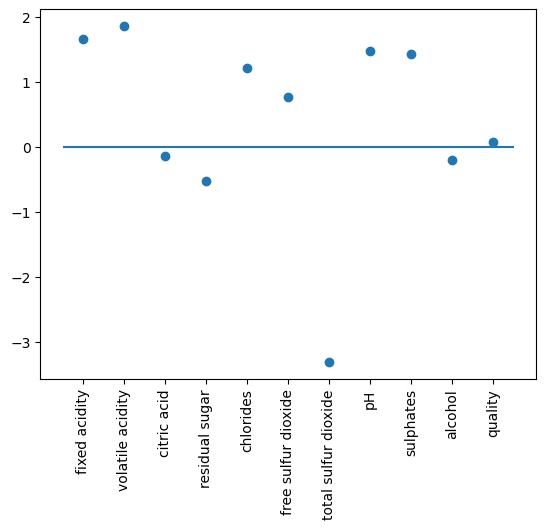

In [127]:
# 각 특징정보에 대한 가중치 그래프 확인
plt.plot(model.coef_.T,'o')
plt.xticks(range(X.shape[1]), X.columns, rotation=90)
xlim = plt.xlim()
plt.hlines(0, xlim[0], xlim[1])
plt.show()

 ### 로지스틱 회귀의 new_quality1 분류

In [128]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH',
       'sulphates', 'alcohol', 'type', 'quality', 'new_quality1',
       'new_quality2', 'type_quality'],
      dtype='object')

In [129]:
df.drop(columns=['type_quality'], inplace=True)
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH',
       'sulphates', 'alcohol', 'type', 'quality', 'new_quality1',
       'new_quality2'],
      dtype='object')

In [130]:
df.new_quality1.value_counts()

1    4113
0    2384
Name: new_quality1, dtype: int64

In [131]:
df['quality1_type'] = df.new_quality1.astype(str) + ' ' + df.type.astype(str)
df.quality1_type.value_counts()

1 0    3258
0 0    1640
1 1     855
0 1     744
Name: quality1_type, dtype: int64

In [132]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH',
       'sulphates', 'alcohol', 'type', 'quality', 'new_quality1',
       'new_quality2', 'quality1_type'],
      dtype='object')

In [133]:
x = df.drop(columns=['quality','new_quality1', 'new_quality1', 'new_quality2', 'quality1_type'])
y = df['new_quality1']
x

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.108137         -0.405800     0.335397        2.135303  -0.325312   
1         -0.739892         -0.202230     0.200528       -0.975705  -0.201202   
2          0.780727         -0.337414     0.599284        0.653771  -0.170249   
3          0.062226         -0.684837     0.063631        0.924183   0.076324   
4          0.062226         -0.684837     0.063631        0.924183   0.076324   
...             ...               ...          ...             ...        ...   
6492      -0.835057          1.608213    -1.763171       -0.765889   1.044314   
6493      -1.128692          1.331391    -1.596130       -0.671261   0.198912   
6494      -0.739892          1.103426    -1.351179       -0.626144   0.624363   
6495      -1.128692          1.850055    -1.432099       -0.765889   0.594158   
6496      -1.029418         -0.135416     1.043445       -0.139165   0.351499   

      free sulfur dioxide  total sulfur dioxide        pH  sulphates  \
0                0.856538              0.805895 -1.384714  -0.547504   
1               -0.853151              0.446387  0.524932  -0.250411   
2                0.254413              0.009535  0.278152  -0.623058   
3                0.921472              0.933848 -0.159342  -0.930614   
4                0.921472              0.933848 -0.159342  -0.930614   
...                   ...                   ...       ...        ...   
6492             0.349801             -1.103840  1.430343   0.389886   
6493             0.643303             -0.897015  1.842474   0.056397   
6494             0.204386             -1.237007  1.251727   1.505556   
6495             0.349801             -1.103840  2.132963   1.253117   
6496            -0.492492             -1.168875  1.071895   0.929132   

       alcohol  type  
0    -1.514080     0  
1    -0.835816     0  
2    -0.289512     0  
3    -0.468262     0  
4    -0.468262     0  
...        ...   ...  
6492  0.058521     1  
6493  0.639420     1  
6494  0.476922     1  
6495 -0.201342     1  
6496  0.476922     1  

[6497 rows x 11 columns]

In [134]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=df.quality1_type, random_state=5)
display(x_train)
display(x_test)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
5490       1.431411          0.749897     1.166466       -0.498567   0.864999   
5327       3.653581          2.826822     1.983995       -0.582373   0.984652   
2288       0.228484         -0.003305    -0.359863        1.742491  -0.201202   
1459       0.627402         -1.579896     1.166466        0.122834  -0.232185   
1448       0.228484         -1.195730     1.166466       -1.220641  -0.015922   
...             ...               ...          ...             ...        ...   
3206      -0.462028         -0.269560     0.534026        0.625664  -0.763470   
1023       0.390829         -0.973101     0.468297        1.217005   0.137676   
6160       1.962393          0.749897     0.468297       -0.539871   0.774969   
3197       0.627402          0.062007     0.855737        0.577587  -0.889751   
921        0.470592         -0.069110     1.927973        1.217005  -0.606306   

      free sulfur dioxide  total sulfur dioxide        pH  sulphates  \
5490            -0.268818             -0.354150  0.830198   0.320569   
5327            -0.958413             -1.423050 -0.732699   0.527215   
2288             1.452884              1.106581 -0.991576   1.059882   
1459             0.099123              0.457103  0.153891  -0.775753   
1448            -0.492492              0.627963  0.091541  -0.397947   
...                   ...                   ...       ...        ...   
3206            -0.200998              0.024058 -0.412632   1.813112   
1023             0.952930              0.838972 -0.540193  -1.087703   
6160             0.439574             -0.534453 -0.412632   0.389886   
3197             0.921472              0.380352 -1.650095  -1.167103   
921              1.183664              0.656105 -0.540193  -0.623058   

       alcohol  type  
5490 -0.650321     1  
5327 -0.027339     1  
2288 -0.835816     0  
1459  0.143638     0  
1448  0.639420     0  
...        ...   ...  
3206  1.921894     0  
1023  0.058521     0  
6160 -0.558870     1  
3197  1.634839     0  
921  -1.414273     0  

[5197 rows x 11 columns]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
729       -1.029418         -0.003305    -0.287899       -1.514867   3.758990   
5732       1.292025          2.059535    -0.359863       -0.975705   0.984652   
1558      -0.835057          0.628796     1.166466        0.557906  -0.325312   
6452      -0.462028          2.897614    -2.283512       -0.582373   0.198912   
4607      -0.462028         -0.337414    -0.075356        1.482218  -0.700513   
...             ...               ...          ...             ...        ...   
3024      -0.108137         -1.424193     0.402089        1.476935  -0.418707   
4792      -2.446851          2.562220    -2.463785       -0.204341  -0.606306   
2182      -0.462028         -0.069110    -0.287899        1.254442  -0.449898   
5605       0.228484          0.987168    -0.880204       -0.344086   0.654540   
5200       0.930719          2.162417    -1.432099       -0.498567   1.103866   

      free sulfur dioxide  total sulfur dioxide        pH  sulphates  \
729             -1.071480              0.949066 -0.604206   0.662838   
5732            -0.662189             -2.003073  0.647462  -0.397947   
1558            -1.071480              0.250752  0.340063   0.320569   
6452            -0.754684             -2.003073  1.959053   0.527215   
4607             0.302852              0.863288 -0.604206  -1.008876   
...                   ...                   ...       ...        ...   
3024             0.524357              0.121789 -1.056694   0.180599   
4792            -0.136065              0.467738  1.900828   2.517711   
2182             0.565045              0.589558  0.153891  -0.397947   
5605            -0.662189             -1.345706  0.951323  -0.104842   
5200            -1.071480             -1.732360  1.783990   1.316776   

       alcohol  type  
729  -0.929892     0  
5732 -0.929892     1  
1558 -1.315468     0  
6452  0.476922     1  
4607  0.639420     0  
...        ...   ...  
3024  0.228024     0  
4792  2.538670     0  
2182 -0.378481     0  
5605  0.058521     1  
5200 -0.378481     1  

[1300 rows x 11 columns]

In [135]:
print(x_test.type.value_counts())
print(x_train.type.value_counts())

0    980
1    320
Name: type, dtype: int64
0    3918
1    1279
Name: type, dtype: int64


In [136]:
print(y_test.value_counts())
print(y_train.value_counts())

1    823
0    477
Name: new_quality1, dtype: int64
1    3290
0    1907
Name: new_quality1, dtype: int64


In [137]:
model = LogisticRegression(penalty='l2')

model.fit(x_train, y_train)

LogisticRegression()

In [138]:
y_pred = model.predict(x_test)

In [139]:
accuracy = np.mean(y_pred == y_test)
print(f'정확도: {accuracy:.2f}')

정확도: 0.73


In [140]:
#혼동행렬 지표 확인
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[275 202]
 [143 680]]


In [141]:
# 분류 보고서 확인
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.58      0.61       477
           1       0.77      0.83      0.80       823

    accuracy                           0.73      1300
   macro avg       0.71      0.70      0.71      1300
weighted avg       0.73      0.73      0.73      1300



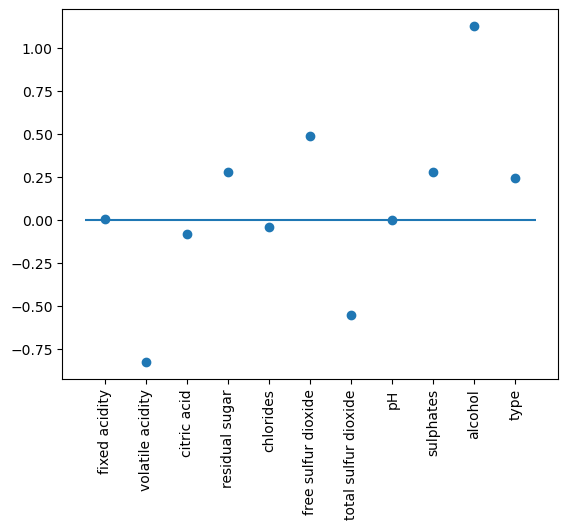

In [142]:
# 각 특징정보에 대한 가중치 그래프 확인
plt.plot(model.coef_.T,'o')
plt.xticks(range(x.shape[1]), x.columns, rotation=90)
xlim = plt.xlim()
plt.hlines(0, xlim[0], xlim[1])
plt.show()

In [143]:
model = LogisticRegression()

In [144]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.01, 0.1, 1, 10, 100, 200 ],
    'solver': ['lbfgs', 'liblinear', 'saga']
    #'max_iter': [100, 200]
}

In [146]:
from sklearn.model_selection import GridSearchCV

In [147]:
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_train, y_train)

# 그리드 탐색 결과 저장
results = grid_search.cv_results_
#param_combinations = list(zip(results['param_penalty'], results['param_C'], results['param_solver'], results['param_max_iter']))
param_combinations = list(zip(results['param_penalty'], results['param_C'], results['param_solver']))
accuracy_l = results['mean_test_score']

C:\Users\Jyun\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
120 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Jyun\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Jyun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Jyun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueEr

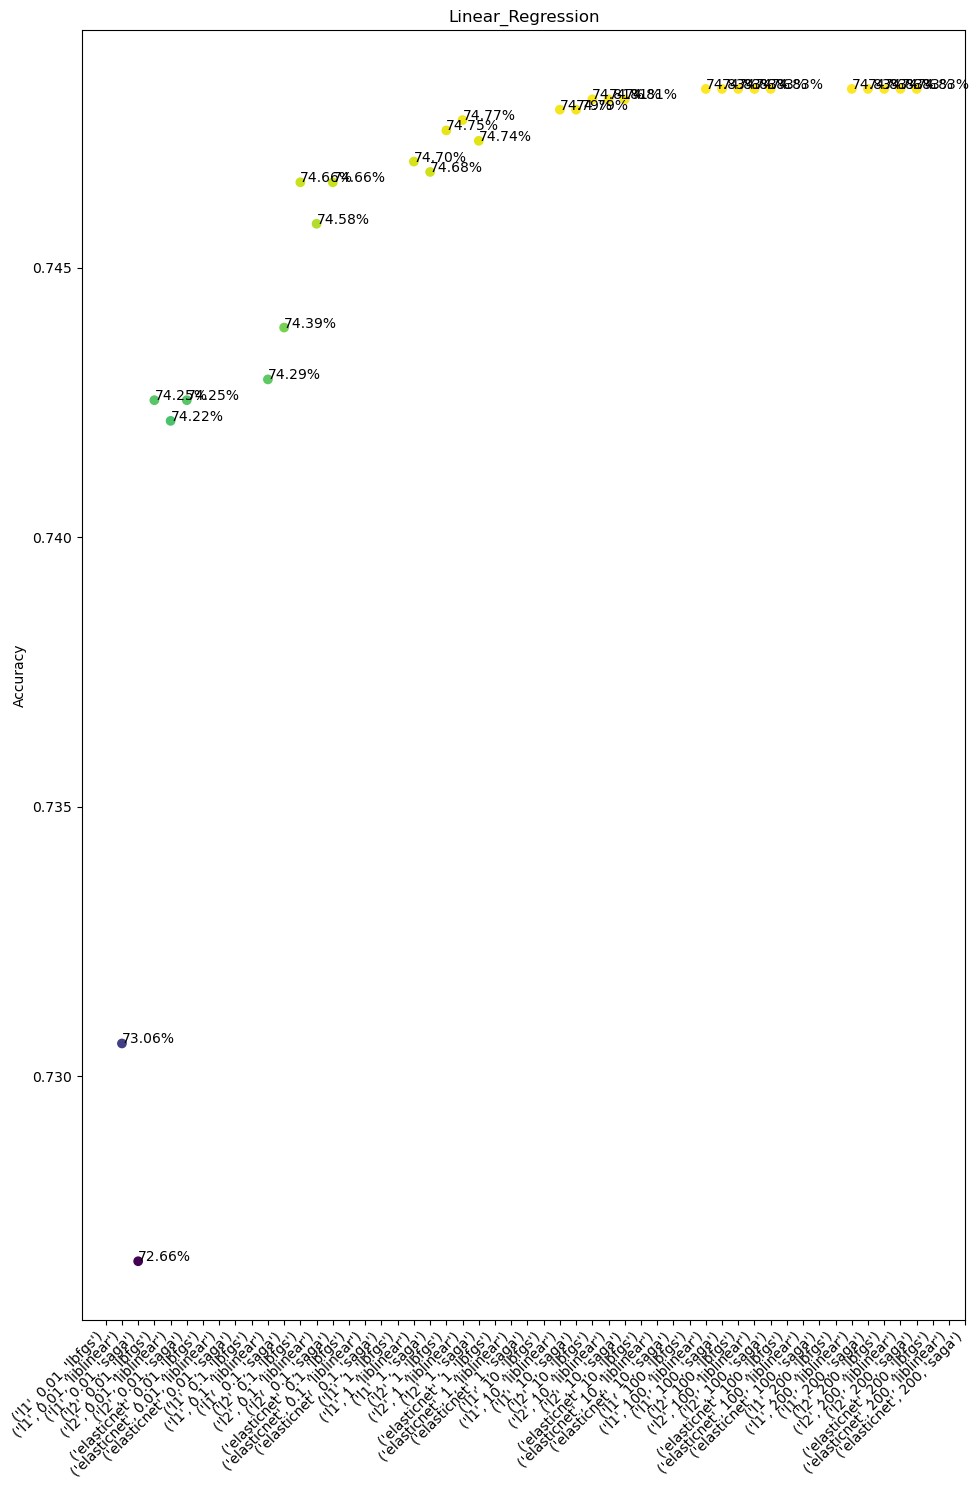

[       nan 0.73060728 0.72656789 0.74253961 0.74215592 0.74253961
        nan        nan        nan        nan 0.74292534 0.74388669
 0.74658159 0.7458118  0.74658159        nan        nan        nan
        nan 0.74696565 0.74677315 0.74754313 0.74773562 0.74735063
        nan        nan        nan        nan 0.74792811 0.74792811
 0.74812042 0.74812042 0.74812042        nan        nan        nan
        nan 0.74831291 0.74831291 0.74831291 0.74831291 0.74831291
        nan        nan        nan        nan 0.74831291 0.74831291
 0.74831291 0.74831291 0.74831291        nan        nan        nan]
Best Hyperparameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best accuracy: 0.748312911823499


In [148]:
fig, ax = plt.subplots(figsize=(10, 15))
scatter = ax.scatter(range(len(param_combinations)), accuracy_l, c=accuracy_l)
for i in range(len(param_combinations)):
    a = accuracy_l[i] * 100
    plt.annotate(f'{a:.2f}%', (i, accuracy_l[i]),  ha='left')

ax.set_ylabel('Accuracy')
ax.set_title('Linear_Regression')
ax.set_xticks(range(len(param_combinations)))
ax.set_xticklabels(param_combinations, rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 최적의 하이퍼파라미터와 MSE 출력
print(accuracy_l)
best_params = grid_search.best_params_
best_mse = grid_search.best_score_
print(f"Best Hyperparameters: {best_params}")
print(f"Best accuracy: {best_mse}")

In [149]:
# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", grid_search.best_params_)

최적의 하이퍼파라미터: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [150]:
# 최적의 모델 추출
best_model = grid_search.best_estimator_

In [151]:
# 테스트 데이터로 예측
y_pred = best_model.predict(x_test)

In [152]:
# 정확도 출력
accuracy = (y_pred == y_test).mean()
print(f'테스트 정확도: {accuracy:.2f}')

테스트 정확도: 0.73


In [153]:
#혼동행렬 지표 확인
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[275 202]
 [143 680]]


In [154]:
# 분류 보고서 확인
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.58      0.61       477
           1       0.77      0.83      0.80       823

    accuracy                           0.73      1300
   macro avg       0.71      0.70      0.71      1300
weighted avg       0.73      0.73      0.73      1300



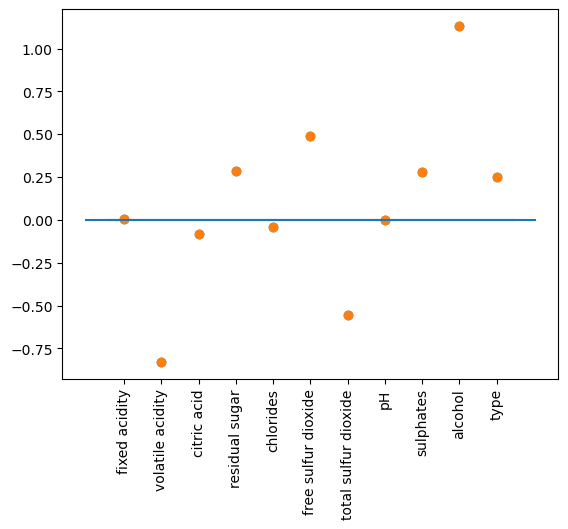

In [157]:
# 각 특징정보에 대한 가중치 그래프 확인
plt.plot(best_model.coef_.T,'o')
plt.xticks(range(x.shape[1]), x.columns, rotation=90)
xlim = plt.xlim()
plt.hlines(0, xlim[0], xlim[1])
plt.show()

In [158]:
# 
# 
# 

### 다중 로지스틱 회귀 분석 - quality2

In [159]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH',
       'sulphates', 'alcohol', 'type', 'quality', 'new_quality1',
       'new_quality2', 'quality1_type'],
      dtype='object')

In [160]:
df.drop(columns=['quality1_type'], inplace=True)
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH',
       'sulphates', 'alcohol', 'type', 'quality', 'new_quality1',
       'new_quality2'],
      dtype='object')

In [161]:
df['quality2_type'] = df['new_quality2'].astype(str) + ' ' + df.type.astype(str)
df.quality2_type.value_counts()

2 0    3258
1 0    1457
2 1     855
1 1     681
0 0     183
0 1      63
Name: quality2_type, dtype: int64

In [162]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH',
       'sulphates', 'alcohol', 'type', 'quality', 'new_quality1',
       'new_quality2', 'quality2_type'],
      dtype='object')

In [163]:
x = df.drop(columns=['quality','new_quality1', 'new_quality2', 'quality2_type'])
y = df['new_quality2']
x

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.108137         -0.405800     0.335397        2.135303  -0.325312   
1         -0.739892         -0.202230     0.200528       -0.975705  -0.201202   
2          0.780727         -0.337414     0.599284        0.653771  -0.170249   
3          0.062226         -0.684837     0.063631        0.924183   0.076324   
4          0.062226         -0.684837     0.063631        0.924183   0.076324   
...             ...               ...          ...             ...        ...   
6492      -0.835057          1.608213    -1.763171       -0.765889   1.044314   
6493      -1.128692          1.331391    -1.596130       -0.671261   0.198912   
6494      -0.739892          1.103426    -1.351179       -0.626144   0.624363   
6495      -1.128692          1.850055    -1.432099       -0.765889   0.594158   
6496      -1.029418         -0.135416     1.043445       -0.139165   0.351499   

      free sulfur dioxide  total sulfur dioxide        pH  sulphates  \
0                0.856538              0.805895 -1.384714  -0.547504   
1               -0.853151              0.446387  0.524932  -0.250411   
2                0.254413              0.009535  0.278152  -0.623058   
3                0.921472              0.933848 -0.159342  -0.930614   
4                0.921472              0.933848 -0.159342  -0.930614   
...                   ...                   ...       ...        ...   
6492             0.349801             -1.103840  1.430343   0.389886   
6493             0.643303             -0.897015  1.842474   0.056397   
6494             0.204386             -1.237007  1.251727   1.505556   
6495             0.349801             -1.103840  2.132963   1.253117   
6496            -0.492492             -1.168875  1.071895   0.929132   

       alcohol  type  
0    -1.514080     0  
1    -0.835816     0  
2    -0.289512     0  
3    -0.468262     0  
4    -0.468262     0  
...        ...   ...  
6492  0.058521     1  
6493  0.639420     1  
6494  0.476922     1  
6495 -0.201342     1  
6496  0.476922     1  

[6497 rows x 11 columns]

In [164]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=df.quality2_type, random_state=5)
display(x_train)
display(x_test)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
5930       0.780727          2.731530    -2.463785        0.012124   1.192991   
1739       1.004510         -0.269560    -0.145654       -1.324181  -0.731976   
3609      -0.108137         -1.195730    -0.432401        1.622922  -0.356414   
1562      -0.022430          0.062007     1.166466       -1.033210  -0.889751   
2327      -0.108137          0.126834    -1.034504       -1.288849  -0.201202   
...             ...               ...          ...             ...        ...   
1918      -0.462028          0.126834    -0.145654        1.632474  -0.356414   
2393      -0.646022         -1.120887     0.200528       -1.033210   1.133602   
2845      -0.553412         -0.756014    -0.145654        0.743751  -0.858135   
684        0.780727          0.809823    -0.005598       -0.920369  -0.108430   
833       -0.194923         -0.544202     0.200528       -1.155465  -0.637678   

      free sulfur dioxide  total sulfur dioxide        pH  sulphates  \
5930            -2.251138             -2.675419  0.890830   0.038811   
1739            -2.529306             -0.791002 -1.985618  -1.573005   
3609             0.099123              0.618458 -1.985618  -0.472470   
1562             0.043637              0.380352  0.524932  -1.490609   
2327            -1.812220              0.299248 -0.540193  -1.247085   
...                   ...                   ...       ...        ...   
1918             1.129169              0.863288 -0.285683   0.389886   
2393             0.788718              0.488776  0.216095  -0.250411   
2845            -0.662189             -0.144432 -0.412632   0.250808   
684              1.013967              0.910712 -1.187413  -0.775753   
833              0.099123             -0.228112 -0.222437  -0.623058   

       alcohol  type  
5930 -0.742631     1  
1739  0.799276     0  
3609 -1.120790     0  
1562  1.413910     0  
2327 -0.650321     0  
...        ...   ...  
1918 -1.414273     0  
2393 -0.742631     0  
2845  0.394654     0  
684   0.639420     0  
833   1.413910     0  

[5197 rows x 11 columns]

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
3735      -0.931554         -0.756014     0.981305       -0.867047   3.066303   
2308       1.702009         -0.337414    -0.075356       -0.975705  -0.325312   
683       -0.646022         -0.405800     0.063631        0.122834   5.232824   
2957      -0.646022         -1.501697    -0.075356       -1.288849  -0.763470   
3742      -0.108137         -1.271221    -0.216498        1.660762  -0.139325   
...             ...               ...          ...             ...        ...   
656        1.431411         -0.405800     0.268212        0.225769  -0.858135   
4414      -0.022430         -0.405800    -0.287899        1.191505  -0.449898   
6485      -1.229414          1.662539    -1.513745       -0.867047   0.321039   
4704      -0.739892          0.191183     1.227360        0.892986  -0.077564   
252       -0.194923          0.443930     1.584405        1.290947  -0.387546   

      free sulfur dioxide  total sulfur dioxide        pH  sulphates  \
3735             0.439574             -0.373098 -0.159342  -1.490609   
2308             0.524357              0.519763 -0.668374  -0.250411   
683              1.311950              0.838972 -0.604206  -0.323930   
2957             0.565045             -0.034941 -1.318783   0.250808   
3742             0.204386              0.618458 -1.650095  -1.008876   
...                   ...                   ...       ...        ...   
656              0.099123             -0.019961 -1.121973  -0.930614   
4414             0.043637              0.238366 -1.121973  -0.032779   
6485            -0.492492             -1.732360  2.017151   0.929132   
4704             1.043593              1.051289 -0.096397  -0.104842   
252              0.680977              0.550093 -0.476335  -0.472470   

       alcohol  type  
3735  2.269312     0  
2308 -1.024878     0  
683  -0.929892     0  
2957  1.034290     0  
3742 -1.315468     0  
...        ...   ...  
656   0.719673     0  
4414  0.878240     0  
6485  0.394654     1  
4704 -0.742631     0  
252  -1.614911     0  

[1300 rows x 11 columns]

In [165]:
print(x_train.type.value_counts())
print(x_test.type.value_counts())

0    3918
1    1279
Name: type, dtype: int64
0    980
1    320
Name: type, dtype: int64


In [166]:
print(y_train.value_counts())
print(y_test.value_counts())

2    3290
1    1711
0     196
Name: new_quality2, dtype: int64
2    823
1    427
0     50
Name: new_quality2, dtype: int64


In [167]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [168]:
accuracy = np.mean(y_pred == y_test)
print(f'정확도: {accuracy:.2f}')

정확도: 0.23


In [169]:
#혼동행렬 지표 확인
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 18  32   0]
 [148 279   0]
 [252 571   0]]


In [170]:
# 분류 보고서 확인
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.04      0.36      0.08        50
           1       0.32      0.65      0.43       427
           2       0.00      0.00      0.00       823

    accuracy                           0.23      1300
   macro avg       0.12      0.34      0.17      1300
weighted avg       0.11      0.23      0.14      1300



C:\Users\Jyun\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jyun\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Jyun\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


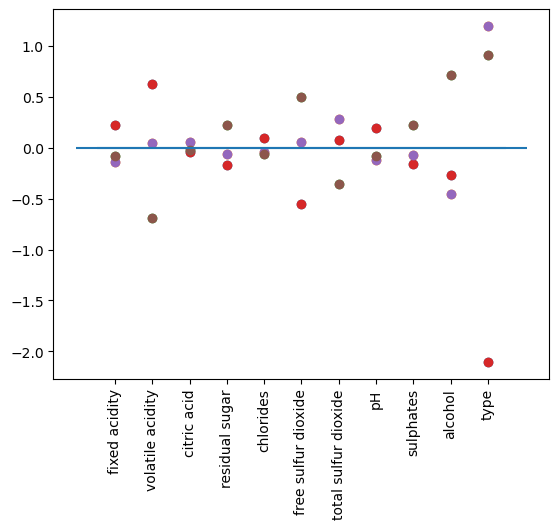

In [172]:
# 각 특징정보에 대한 가중치 그래프 확인
plt.plot(model.coef_.T,'o')
plt.xticks(range(x.shape[1]), x.columns, rotation=90)
xlim = plt.xlim()
plt.hlines(0, xlim[0], xlim[1])
plt.show()

In [173]:
model = LogisticRegression()

In [174]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.01, 0.1, 1, 10 ],
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}

In [175]:
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_train, y_train)

# 그리드 탐색 결과 저장
results = grid_search.cv_results_
param_combinations = list(zip(results['param_penalty'], results['param_C'], results['param_solver'], results['param_max_iter']))
#param_combinations = list(zip(results['param_penalty'], results['param_C'], results['param_solver']))
accuracy_l = results['mean_test_score']

C:\Users\Jyun\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Jyun\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Jyun\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Jyun\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Jyun\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Jyun\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

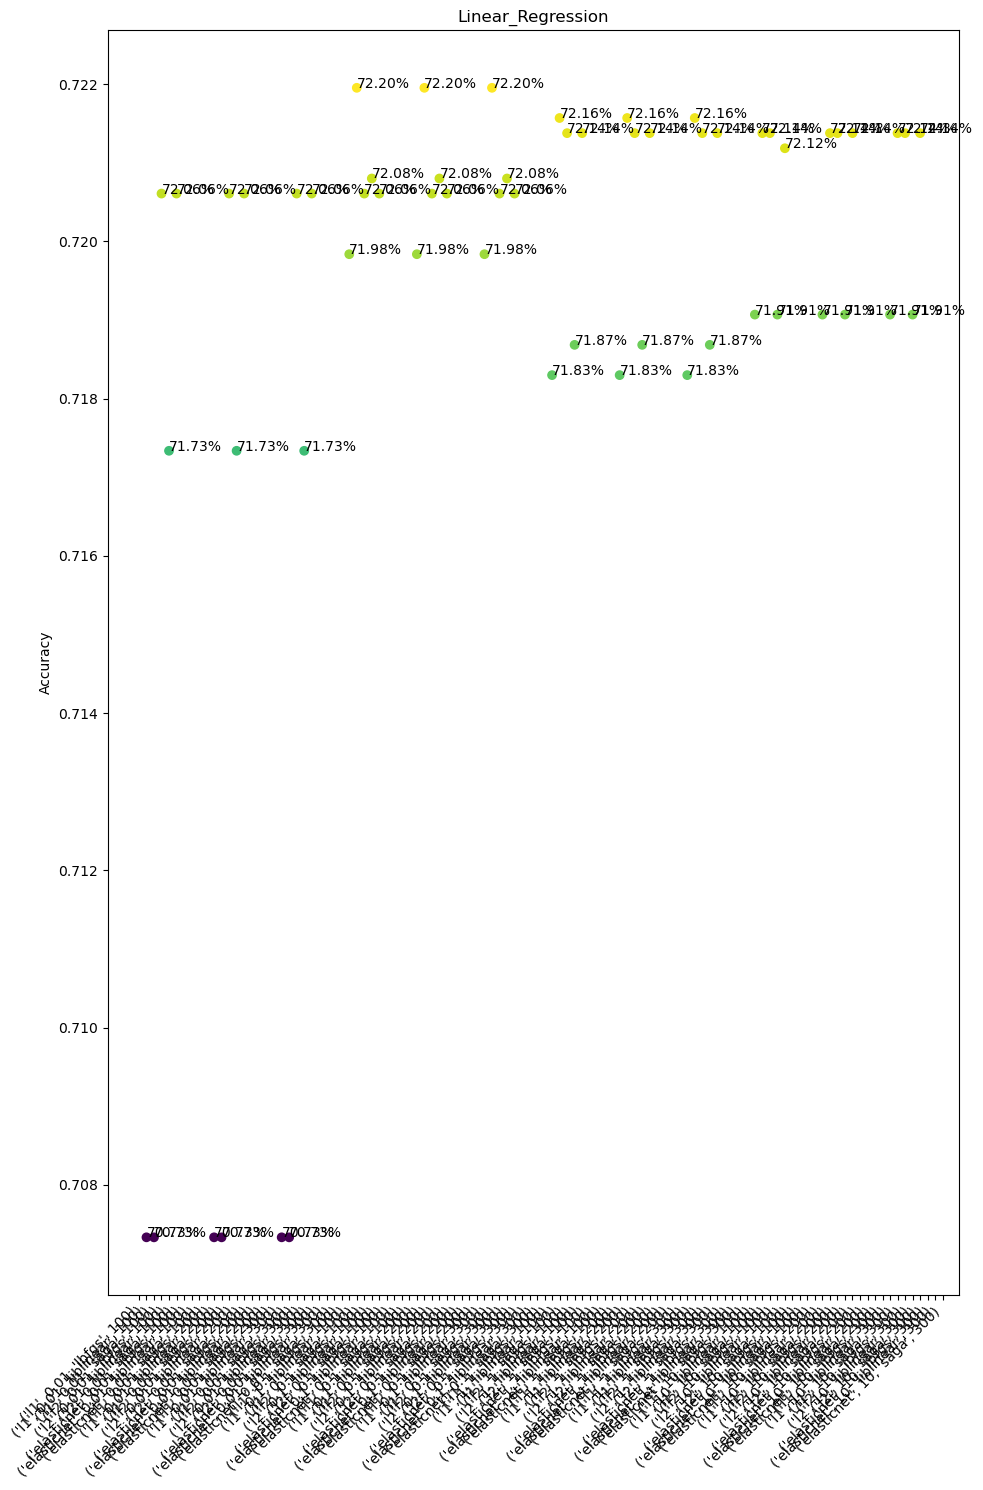

[       nan 0.70733286 0.70733249 0.72060931 0.71733749 0.72060931
        nan        nan        nan        nan 0.70733286 0.70733249
 0.72060931 0.71733749 0.72060931        nan        nan        nan
        nan 0.70733286 0.70733249 0.72060931 0.71733749 0.72060931
        nan        nan        nan        nan 0.71983805 0.72195454
 0.72060894 0.72080125 0.72060894        nan        nan        nan
        nan 0.71983805 0.72195454 0.72060894 0.72080125 0.72060894
        nan        nan        nan        nan 0.71983805 0.72195454
 0.72060894 0.72080125 0.72060894        nan        nan        nan
        nan 0.71829996 0.72157048 0.72137799 0.71868494 0.72137799
        nan        nan        nan        nan 0.71829996 0.72157048
 0.72137799 0.71868494 0.72137799        nan        nan        nan
        nan 0.71829996 0.72157048 0.72137799 0.71868494 0.72137799
        nan        nan        nan        nan 0.71906993 0.72137799
 0.72137799 0.71906993 0.72118568        nan        nan       

In [176]:
fig, ax = plt.subplots(figsize=(10, 15))
scatter = ax.scatter(range(len(param_combinations)), accuracy_l, c=accuracy_l)
for i in range(len(param_combinations)):
    a = accuracy_l[i] * 100
    plt.annotate(f'{a:.2f}%', (i, accuracy_l[i]),  ha='left')

ax.set_ylabel('Accuracy')
ax.set_title('Linear_Regression')
ax.set_xticks(range(len(param_combinations)))
ax.set_xticklabels(param_combinations, rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 최적의 하이퍼파라미터와 MSE 출력
print(accuracy_l)
best_params = grid_search.best_params_
best_mse = grid_search.best_score_
print(f"Best Hyperparameters: {best_params}")
print(f"Best accuracy: {best_mse}")

In [177]:
# 최적의 하이퍼파라미터 출력
print("최적의 하이퍼파라미터:", grid_search.best_params_)

최적의 하이퍼파라미터: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}


In [178]:
# 최적의 모델 추출
best_model = grid_search.best_estimator_

In [179]:
# 테스트 데이터로 예측
y_pred = best_model.predict(x_test)

In [180]:
# 정확도 출력
accuracy = (y_pred == y_test).mean()
print(f'테스트 정확도: {accuracy:.2f}')

테스트 정확도: 0.71


In [181]:
#혼동행렬 지표 확인
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[  0  27  23]
 [  1 224 202]
 [  0 128 695]]


In [182]:
# 분류 보고서 확인
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.59      0.52      0.56       427
           2       0.76      0.84      0.80       823

    accuracy                           0.71      1300
   macro avg       0.45      0.46      0.45      1300
weighted avg       0.67      0.71      0.69      1300



In [183]:
# 각 특징정보에 대한 가중치 그래프 확인
#주황-0, 파란-1, 초록-2
plt.plot(best_model.coef_.T,'o')
plt.xticks(range(x.shape[1]), x.columns, rotation=90)
xlim = plt.xlim()
plt.hlines(0, xlim[0], xlim[1])

In [184]:
# 데이터 로그를 및 표준화를 통해 정규화를 진행해도, 정규화 부족으로 C 값을 낮추는 것(0.1)이 좋은 결과
# penalty =l1 다중공선성 문제로 특징을 가중치를 0으로 변경해야할 것이 있어 l2(모든 특징정보의 가중치를 고르게 축소)보다 l1이 더 좋은 결과
# solver = saga penalty l1을 사용할 수 있는 solver 중(liblinear, saga) liblinear은 multi-class를 분류할 수 없어 saga를 사용하는 것이 가장 좋은 결과

In [185]:
df.drop(columns=['quality2_type'], inplace=True)
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH',
       'sulphates', 'alcohol', 'type', 'quality', 'new_quality1',
       'new_quality2'],
      dtype='object')